In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

data = pd.read_csv("StudentPerformanceFactors.csv")

ENUMDATA = ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income","Extracurricular_Activities","Internet_Access","Learning_Disabilities","Peer_Influence","Parental_Education_Level","Gender","Distance_from_Home","School_Type"]

LOWMEDHIGH = {"Low":1,"Medium":2,"High":3}
for i in ["Access_to_Resources","Parental_Involvement","Motivation_Level","Teacher_Quality","Family_Income"]:
    data[i] = data[i].map(LOWMEDHIGH)

NOYES = {"No":0,"Yes":1}
for i in ["Extracurricular_Activities","Internet_Access","Learning_Disabilities"]:
    data[i] = data[i].map(NOYES)

PEERMAP = {"Positive":1,"Negative":-1,"Neutral":0}
data["Peer_Influence"] = data["Peer_Influence"].map(PEERMAP)

EDULVLMAP = {"College":2,"Postgraduate":3,"High School":1, float('nan'):0}
data["Parental_Education_Level"] = data["Parental_Education_Level"].map(EDULVLMAP)

GENDERMAP = {"Male":0,"Female":1}
data["Gender"] = data["Gender"].map(GENDERMAP)

NEARMODFAR = {"Near":3,"Moderate":2,"Far":1}
data["Distance_from_Home"] = data["Distance_from_Home"].map(NEARMODFAR)

SCHOOLTYPEMAP = {"Public":0,"Private":1}
data["School_Type"] = data["School_Type"].map(SCHOOLTYPEMAP)

In [121]:
# First 5 rows of data
data.head(20)
men_data = data[data["Gender"] == "Male"].copy()
men_data.head()

Empty DataFrame
Columns: [Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, Exam_Score]
Index: []

In [122]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   int64  
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6529 non-null   float64
 12  School_Type                 6607 non-null   int64  
 13  Peer_Influence              6607 

In [123]:
# Statistical Summary
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448              2.086423             2.100197   
std         5.990594    11.547475              0.695521             0.698347   
min         1.000000    60.000000              1.000000             1.000000   
25%        16.000000    70.000000              2.000000             2.000000   
50%        20.000000    80.000000              2.000000             2.000000   
75%        24.000000    90.000000              3.000000             3.000000   
max        44.000000   100.000000              3.000000             3.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6607.000000   6607.00000      6607.000000   
mean                     0.596035      7.02906        75.070531   
std                      0.490728      1.46812        14.399784   
min                      0.000000      4.00000        50.000000   
25%                      0.000000      6.00000        63.000000   
50%                      1.000000      7.00000        75.000000   
75%                      1.000000      8.00000        88.000000   
max                      1.000000     10.00000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6607.000000      6607.000000        6607.000000    6607.000000   
mean           1.906463         0.924474           1.493719       1.787649   
std            0.695798         0.264258           1.230570       0.742617   
min            1.000000         0.000000           0.000000       1.000000   
25%            1.000000         1.000000           1.000000       1.000000   
50%            2.000000         1.000000           1.000000       2.000000   
75%            2.000000         1.000000           2.000000       2.000000   
max            3.000000         1.000000           8.000000       3.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6529.000000  6607.000000     6607.000000        6607.000000   
mean          2.197580     0.304071        0.190858           2.967610   
std           0.599878     0.460048        0.755876           1.031231   
min           1.000000     0.000000       -1.000000           0.000000   
25%           2.000000     0.000000        0.000000           2.000000   
50%           2.000000     0.000000        0.000000           3.000000   
75%           3.000000     1.000000        1.000000           4.000000   
max           3.000000     1.000000        1.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6607.000000               6607.000000         6540.000000   
mean                0.105191                  1.682458            2.493272   
std                 0.306823                  0.799428            0.671749   
min                 0.000000                  0.000000            1.000000   
25%                 0.000000                  1.000000            2.000000   
50%                 0.000000                  1.000000            3.000000   
75%                 0.000000                  2.000000            3.000000   
max                 1.000000                  3.000000            3.000000   

            Gender   Exam_Score  
count  6607.000000  6607.000000  
mean      0.422733    67.235659  
std       0.494031     3.890456  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   101.000000

In [124]:
# Find the index of the maximum hours studied
max_hours_index = data['Exam_Score'].idxmax()

# Retrieve and print the row with the maximum hours studied
max_hours_data = data.loc[max_hours_index]
print(max_hours_data)

Hours_Studied                  27.0
Attendance                     98.0
Parental_Involvement            1.0
Access_to_Resources             2.0
Extracurricular_Activities      1.0
Sleep_Hours                     6.0
Previous_Scores                93.0
Motivation_Level                1.0
Internet_Access                 0.0
Tutoring_Sessions               5.0
Family_Income                   3.0
Teacher_Quality                 3.0
School_Type                     0.0
Peer_Influence                  1.0
Physical_Activity               3.0
Learning_Disabilities           0.0
Parental_Education_Level        1.0
Distance_from_Home              2.0
Gender                          1.0
Exam_Score                    101.0
Name: 1525, dtype: float64


In [125]:
# Missing values
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level       0
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

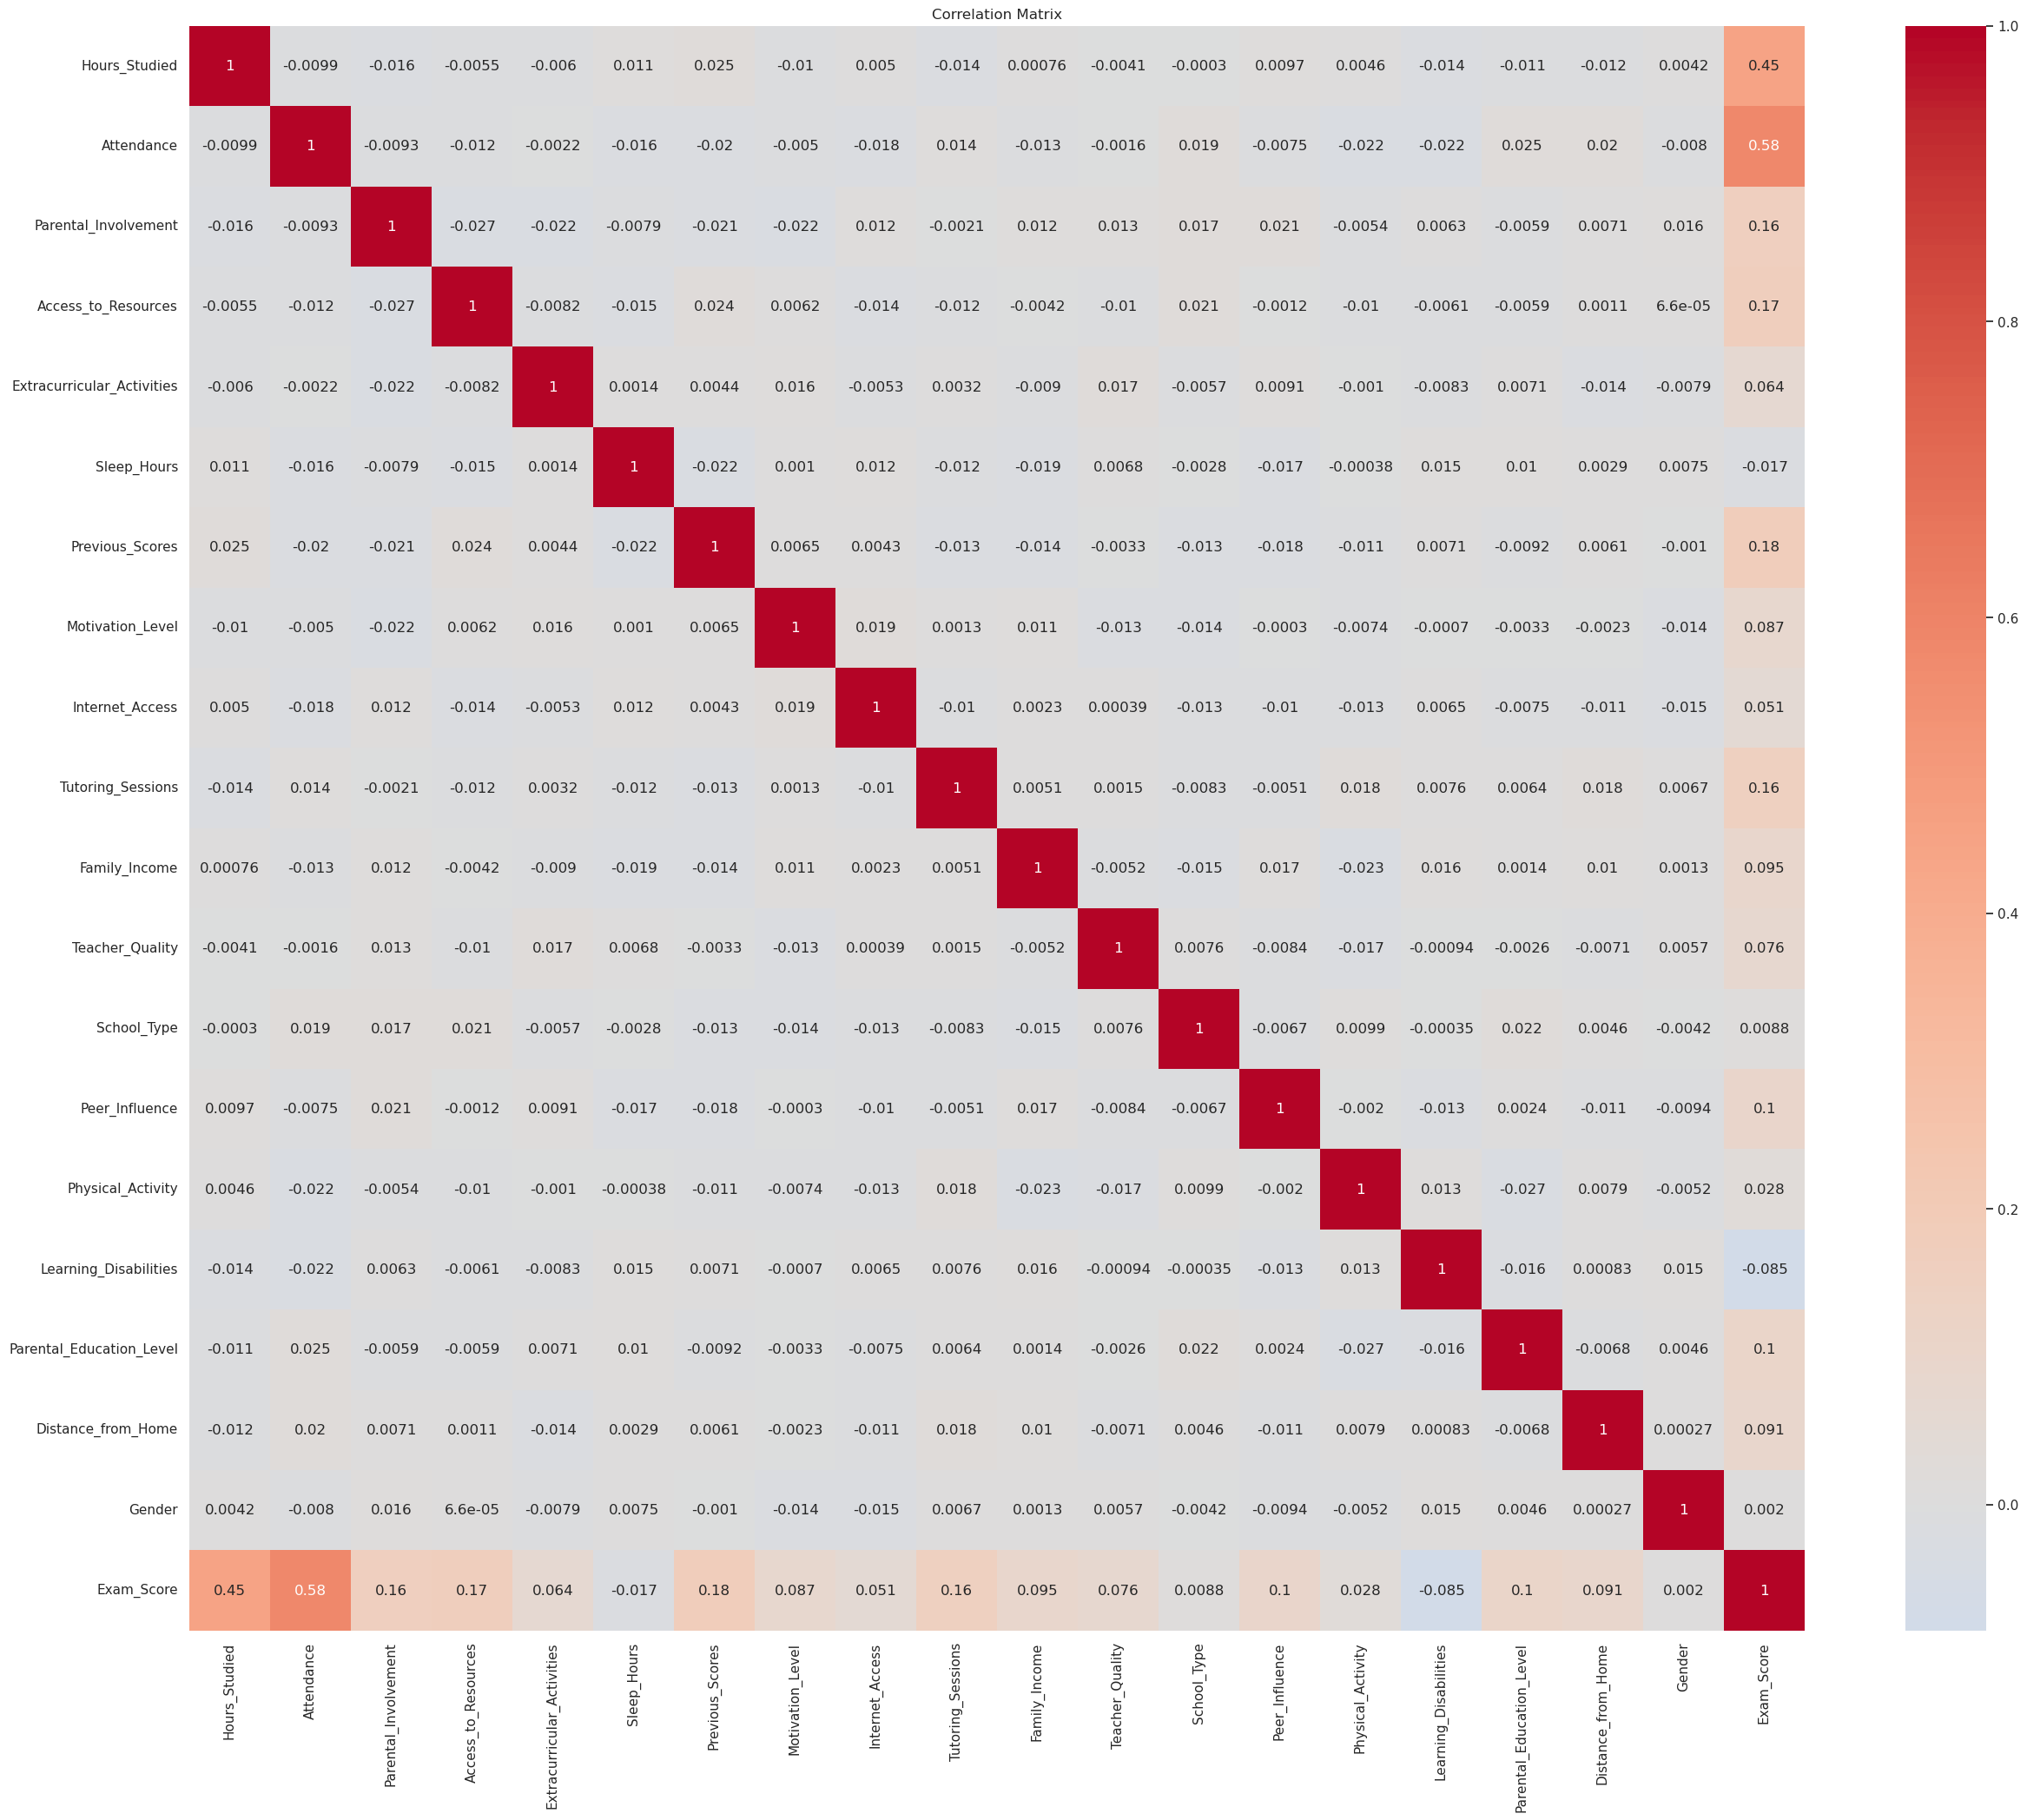

In [152]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [127]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).head(10))

Attendance                Exam_Score    0.581072
Hours_Studied             Exam_Score    0.445455
Previous_Scores           Exam_Score    0.175079
Access_to_Resources       Exam_Score    0.169770
Parental_Involvement      Exam_Score    0.157114
Tutoring_Sessions         Exam_Score    0.156525
Parental_Education_Level  Exam_Score    0.101940
Peer_Influence            Exam_Score    0.100217
Family_Income             Exam_Score    0.094555
Distance_from_Home        Exam_Score    0.091110
dtype: float64

In [128]:
(corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False).tail(10))

Parental_Involvement   Previous_Scores              -0.021074
Sleep_Hours            Previous_Scores              -0.021750
Parental_Involvement   Extracurricular_Activities   -0.021881
Attendance             Learning_Disabilities        -0.022231
Parental_Involvement   Motivation_Level             -0.022393
Attendance             Physical_Activity            -0.022435
Family_Income          Physical_Activity            -0.022820
Parental_Involvement   Access_to_Resources          -0.026557
Physical_Activity      Parental_Education_Level     -0.026800
Learning_Disabilities  Exam_Score                   -0.085066
dtype: float64

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming data is your DataFrame

# Calculate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 3)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Generate scatter plots for each pair of numeric columns
numeric_cols = corr_matrix.columns

for i in range(len(numeric_cols)):
    for j in range(i + 1, len(numeric_cols)):
        col1 = numeric_cols[i]
        col2 = numeric_cols[j]
        
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

In [129]:
# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Extract the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the matrix to convert it into a series and drop NaN values
sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).head(15)
inv_sorted_pairs = upper_triangle.unstack().dropna().sort_values(ascending=False).tail(15)

# Adjust display options to avoid truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the sorted pairs
print(sorted_pairs)

Exam_Score  Attendance                    0.581072
            Hours_Studied                 0.445455
            Previous_Scores               0.175079
            Access_to_Resources           0.169770
            Parental_Involvement          0.157114
            Tutoring_Sessions             0.156525
            Parental_Education_Level      0.101940
            Peer_Influence                0.100217
            Family_Income                 0.094555
            Distance_from_Home            0.091110
            Motivation_Level              0.086937
            Teacher_Quality               0.076387
            Extracurricular_Activities    0.064382
            Internet_Access               0.051475
            Physical_Activity             0.027824
dtype: float64


In [130]:
# top_pairs = [pair for pair in sorted_pairs.index]
# variables = set([var for pair in top_pairs for var in pair])
# sns.pairplot(data, vars=list(variables), kind='reg', diag_kind='kde')
# plt.suptitle('Pairplot for Top Correlated Pairs', y=1.02)
# plt.show()

top_pairs = [pair for pair in sorted_pairs.index]
inv_top_pairs = [pair for pair in inv_sorted_pairs.index]
variables = set([var for pair in top_pairs for var in pair])

In [131]:
# x_key -> data for x axis, y_key -> data for y axis, c_key data for color
# Set color stuff i change change lng and map values kay ugly

def color_data(c_key):
    color_map = {3:'green',2:'yellow',1:'blue',0:'red',float('nan'):'black'}
    colors = None   # No color mapping in case invalid ang c_key
    if c_key in data.keys():
        if c_key in ENUMDATA:
            colors = data[c_key].map(color_map) # if data is enum get colors from map
        else:
            colors = c_key                      # if data already numerical get colors from gradient
    return colors

Slope: 0.28929062860968324       Intercept: 61.45698360950434


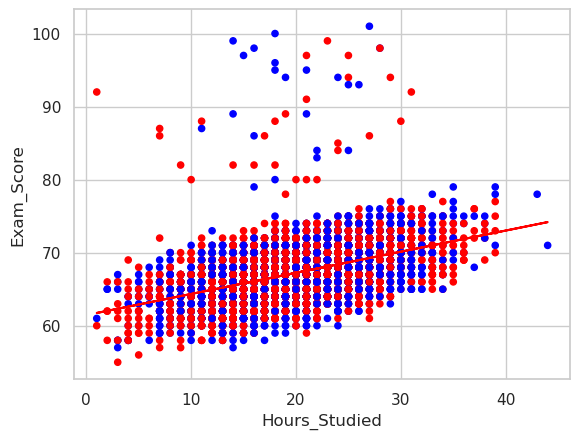

In [132]:
# Visualization Scatter Plot with Regresion
y_key = "Exam_Score"
c_key = "Gender"
x_key = "Hours_Studied"

#Draw Scatter Plot
data.plot(kind="scatter",x=x_key,y=y_key,c=color_data(c_key))

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

Slope: 0.0007960504026209089       Intercept: 2.9517087416397962


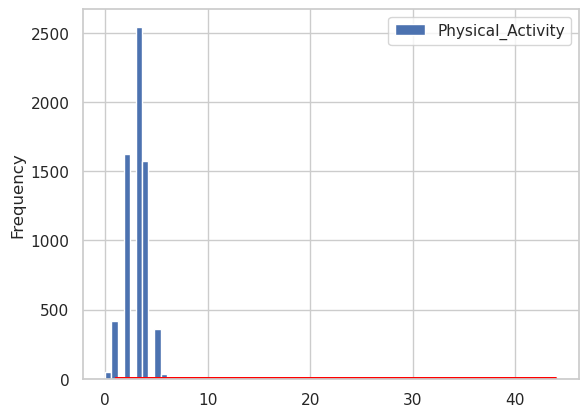

In [133]:
# Visualization Scatter Plot with Regresion
y_key = "Physical_Activity"
c_key = "Attendance"
x_key = "Hours_Studied"


#Draw Scatter Plot
data.plot(kind="hist",x=x_key,y=y_key)

#Get Slope and Intercept
slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
print(f"Slope: {slope}       Intercept: {intercept}")

#Draw Regression
plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

In [134]:
# # Visualization Scatter Plot with Regresion
# y_key = "Parental_Involvement"
# c_key = "Attendance"
# x_key = "Hours_Studied"


# #Draw Scatter Plot
# data.plot(kind="hist",x=x_key,y=y_key)

# #Get Slope and Intercept
# slope, intercept = np.polyfit(data[x_key], data[y_key], 1) 
# print(f"Slope: {slope}       Intercept: {intercept}")

# #Draw Regression
# plt.plot(data[x_key], slope * data[x_key] + intercept, color = 'red')

<Figure size 800x600 with 0 Axes>

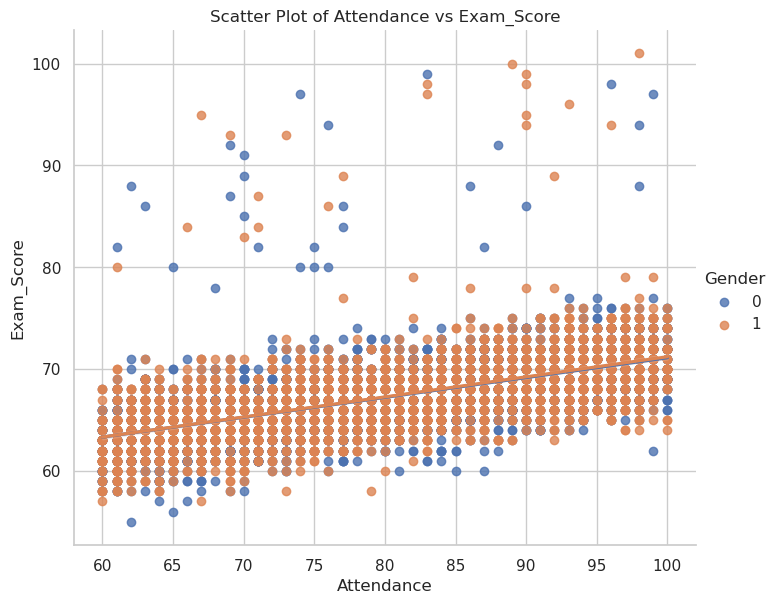

<Figure size 800x600 with 0 Axes>

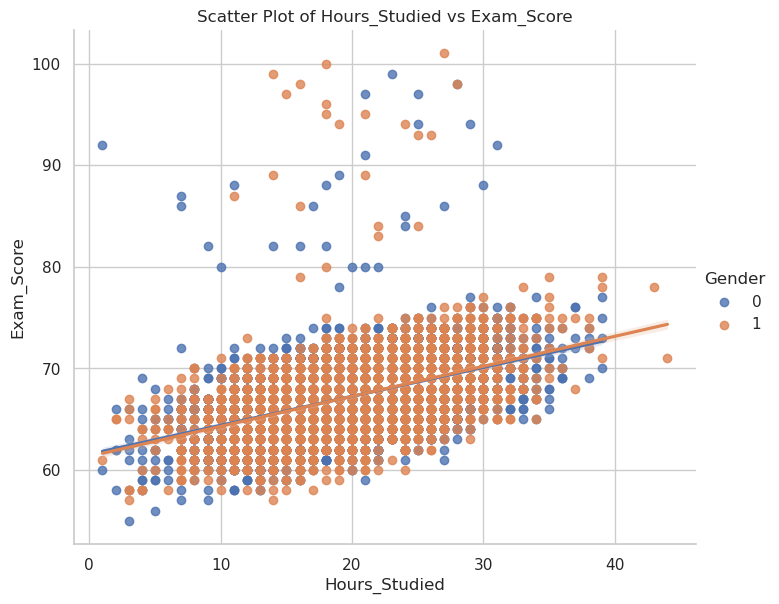

<Figure size 800x600 with 0 Axes>

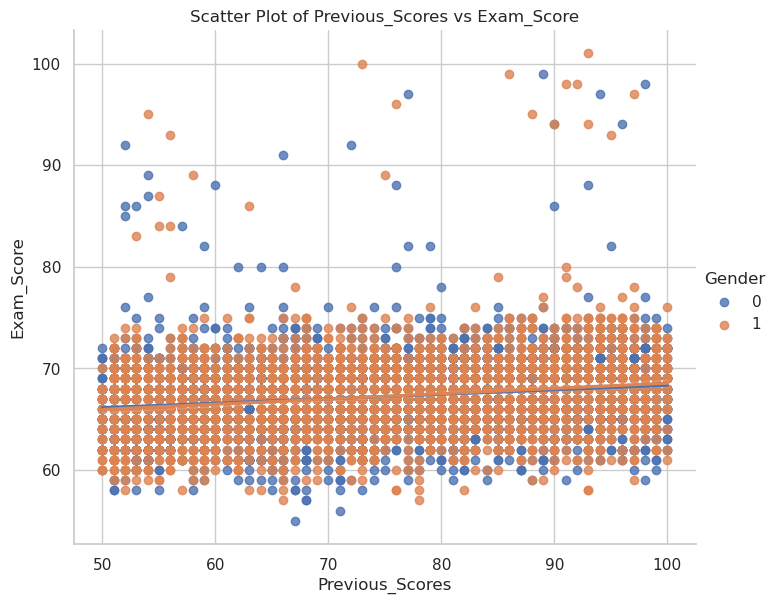

<Figure size 800x600 with 0 Axes>

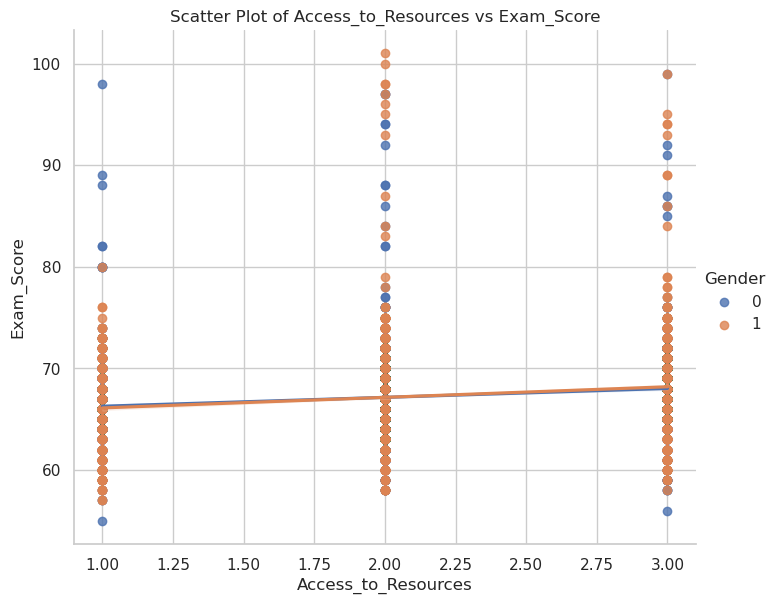

<Figure size 800x600 with 0 Axes>

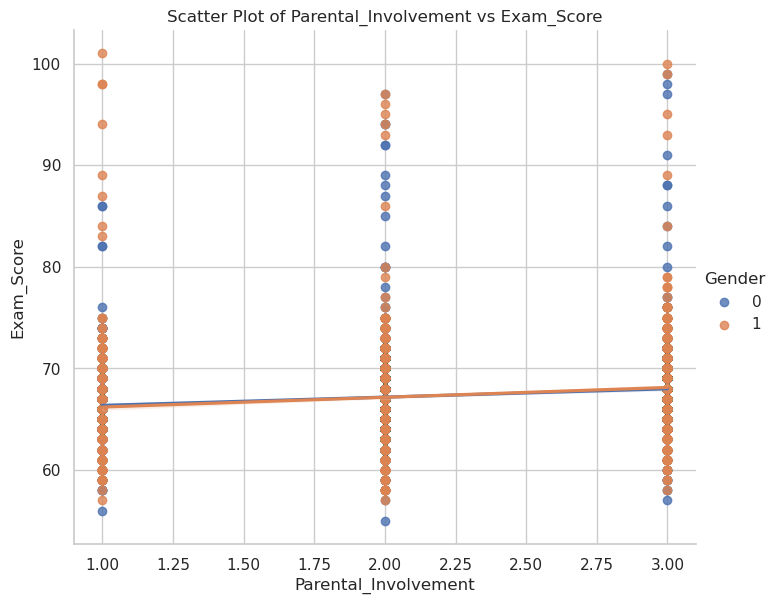

<Figure size 800x600 with 0 Axes>

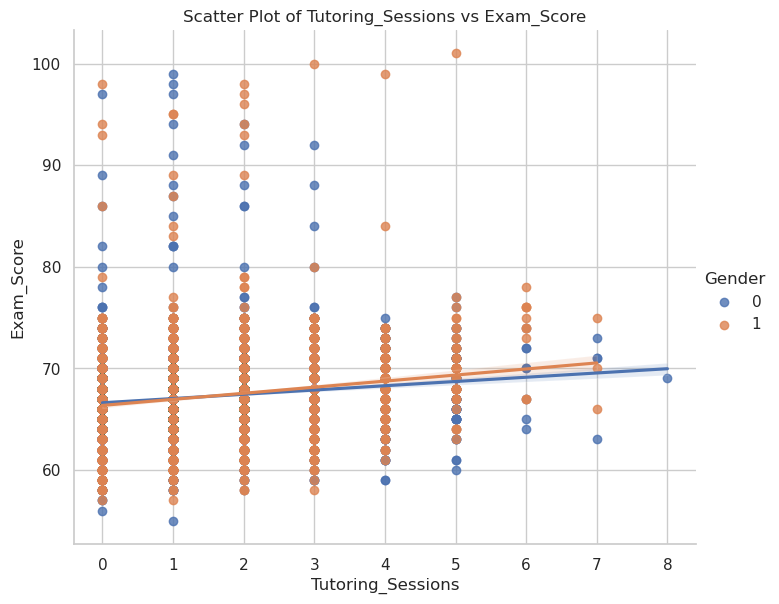

<Figure size 800x600 with 0 Axes>

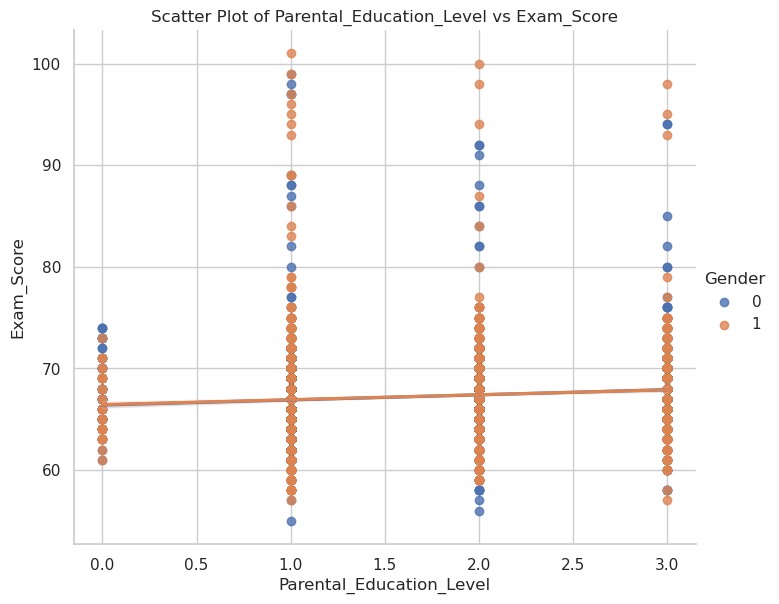

<Figure size 800x600 with 0 Axes>

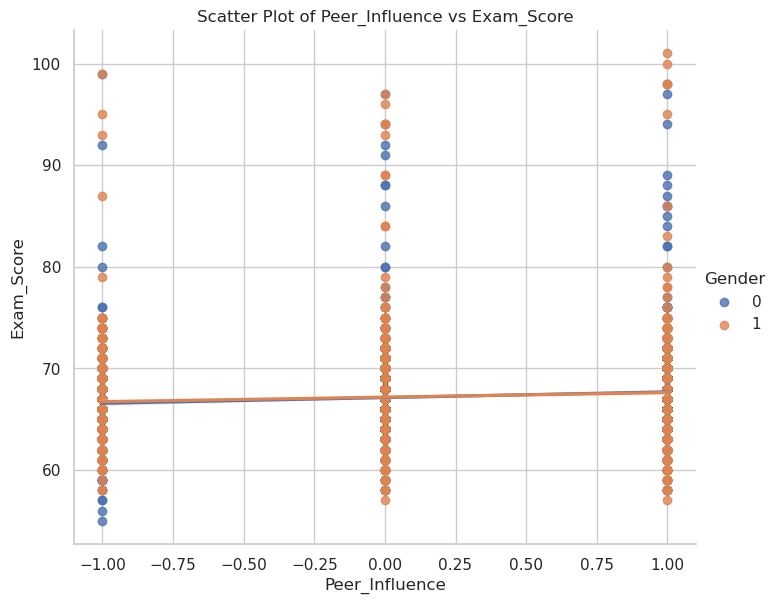

<Figure size 800x600 with 0 Axes>

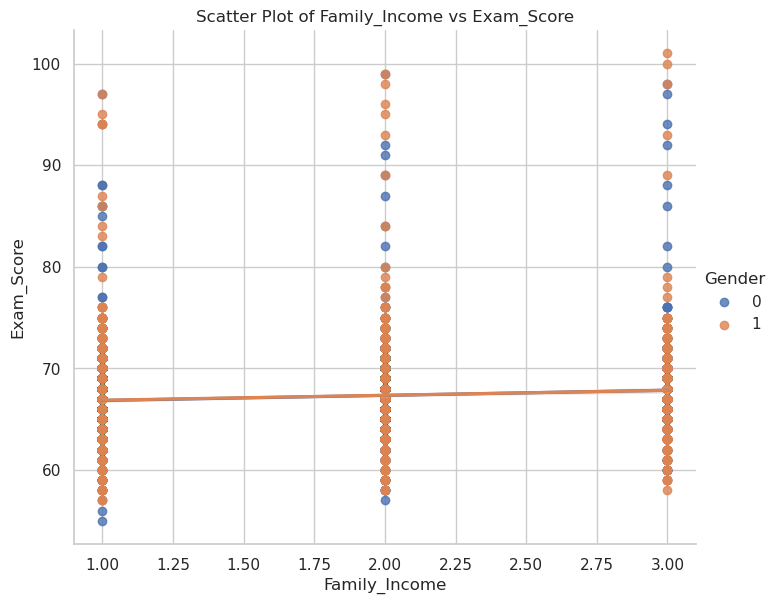

<Figure size 800x600 with 0 Axes>

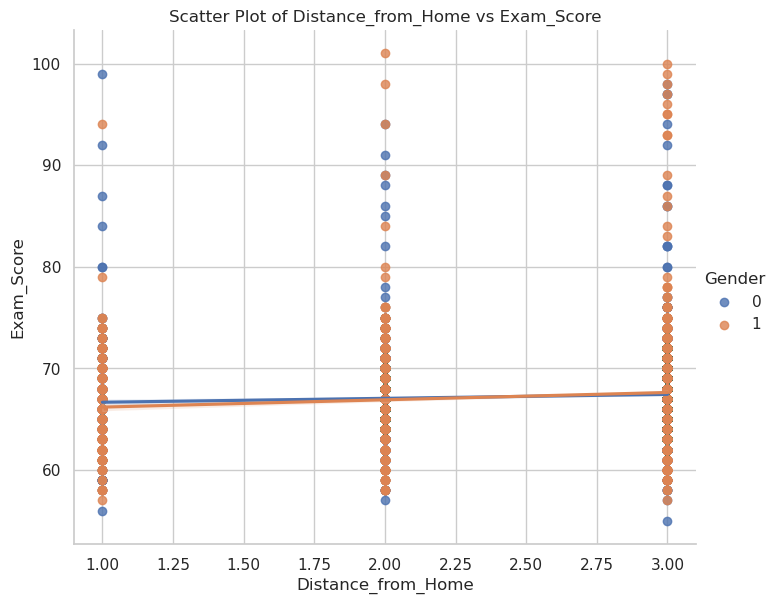

<Figure size 800x600 with 0 Axes>

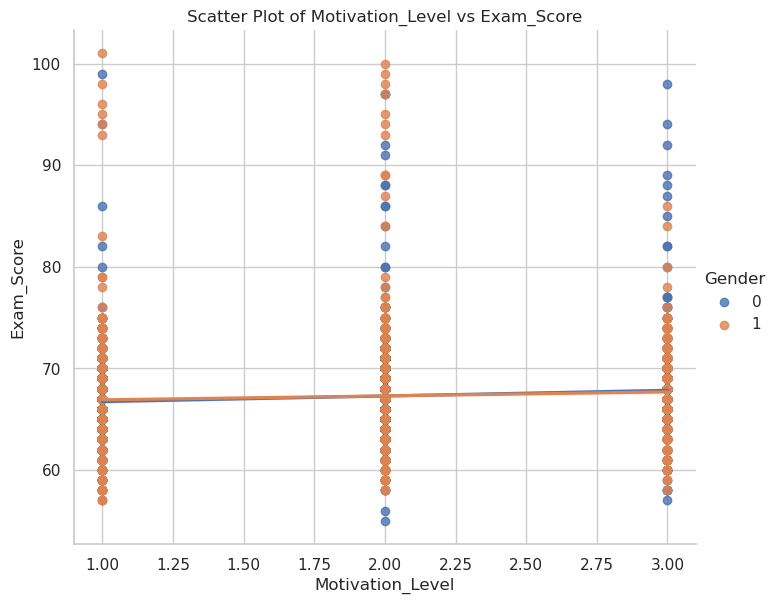

<Figure size 800x600 with 0 Axes>

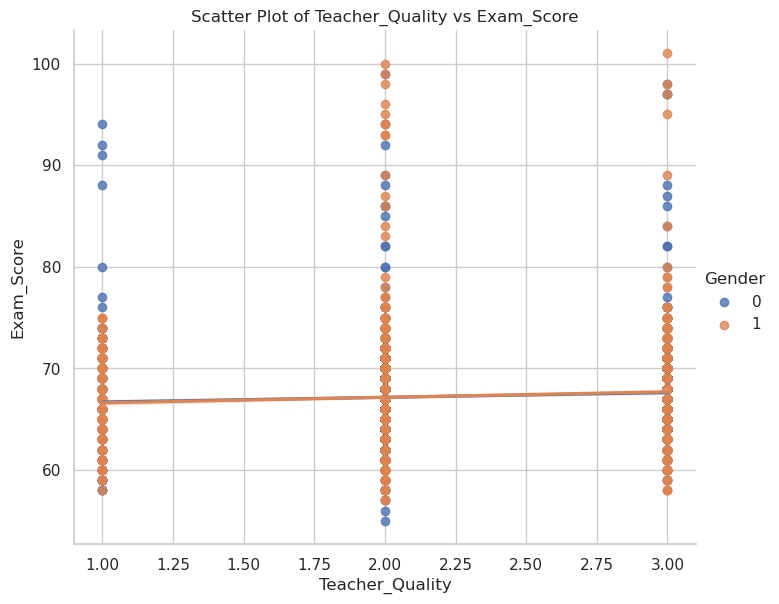

<Figure size 800x600 with 0 Axes>

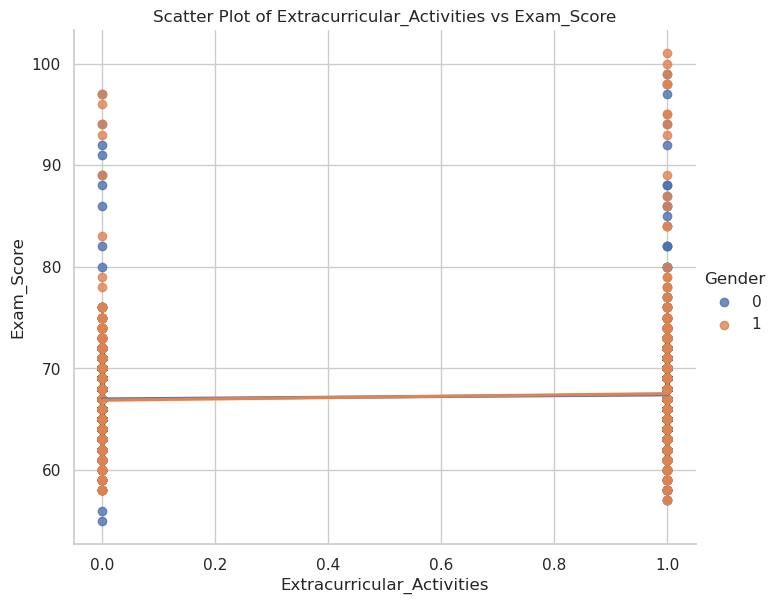

<Figure size 800x600 with 0 Axes>

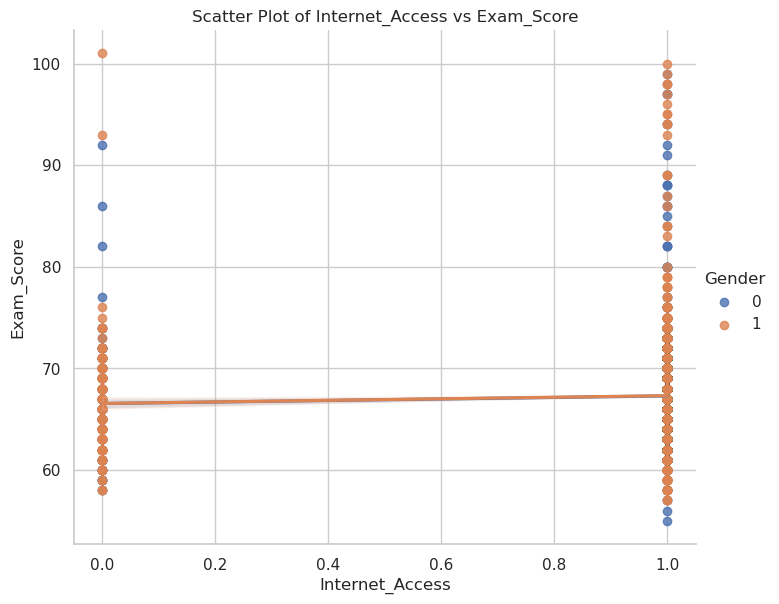

<Figure size 800x600 with 0 Axes>

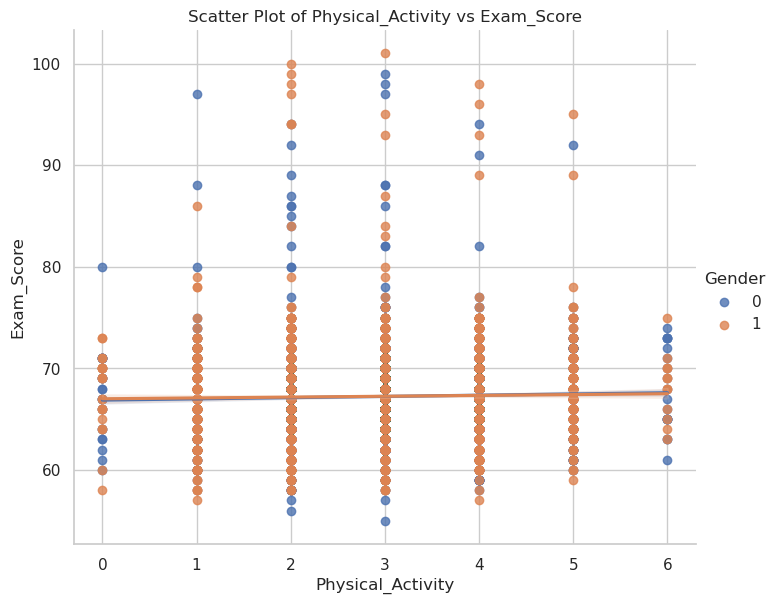

In [135]:

# column to use for coloring the scatter plots
hue_column = 'Gender'

# create scatter plots with regression lines for each pair
for (var2, var1) in top_pairs:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

<Figure size 800x600 with 0 Axes>

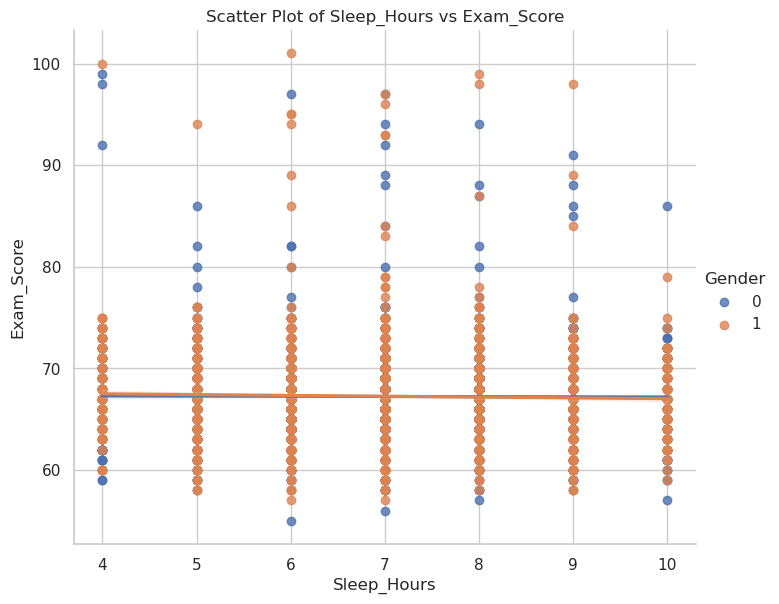

<Figure size 800x600 with 0 Axes>

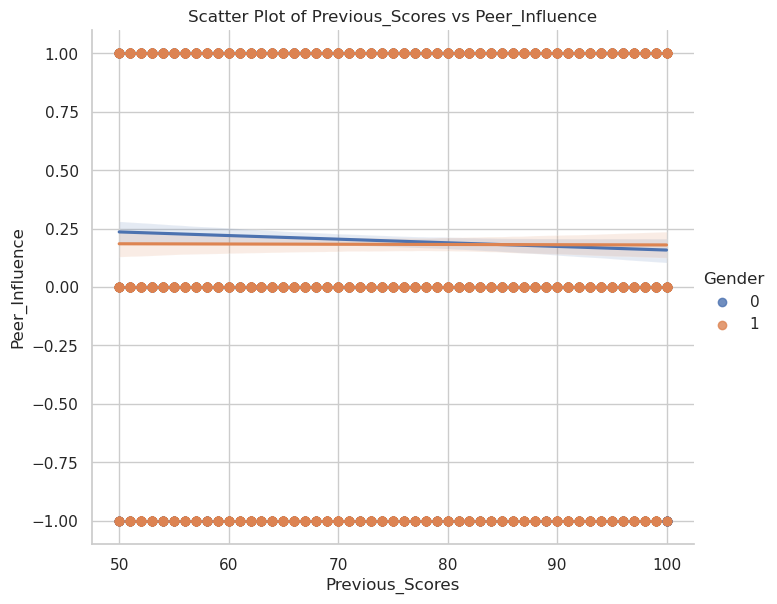

<Figure size 800x600 with 0 Axes>

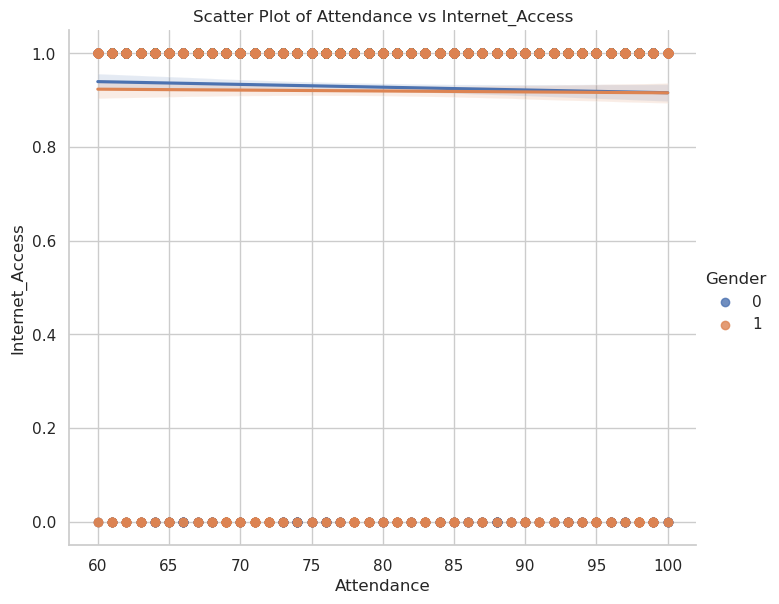

<Figure size 800x600 with 0 Axes>

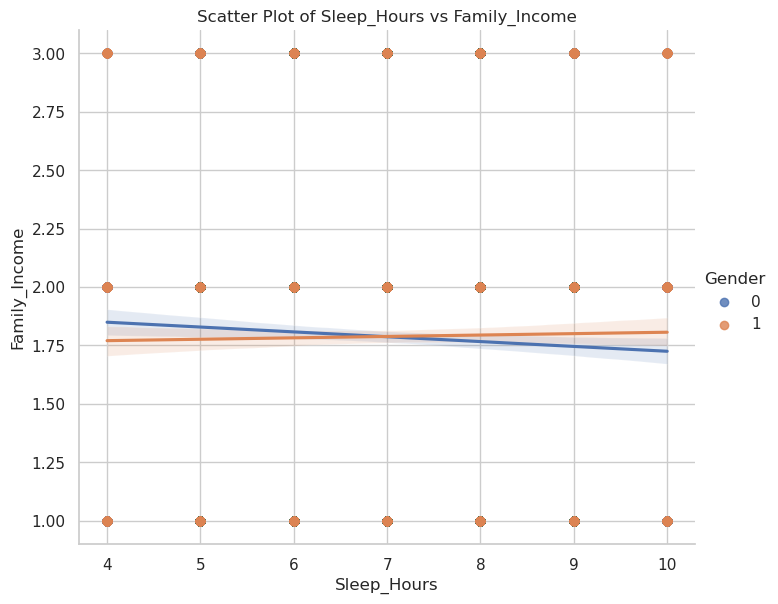

<Figure size 800x600 with 0 Axes>

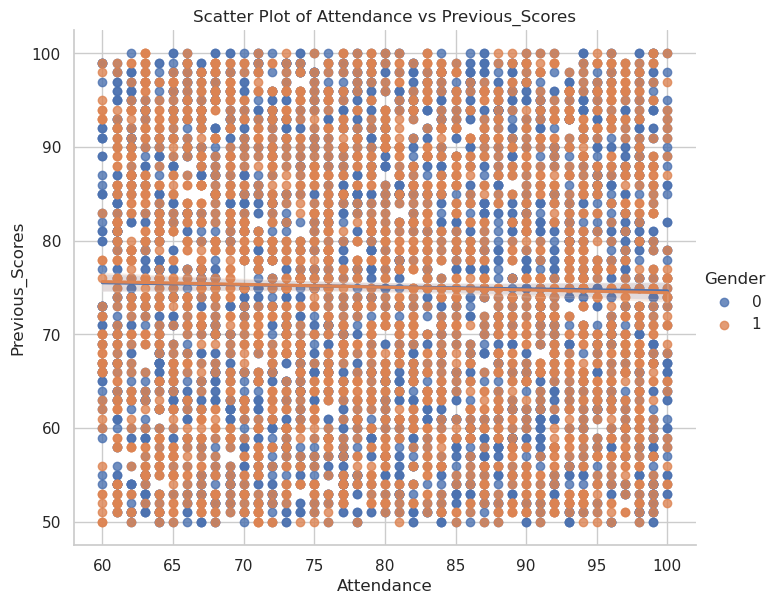

<Figure size 800x600 with 0 Axes>

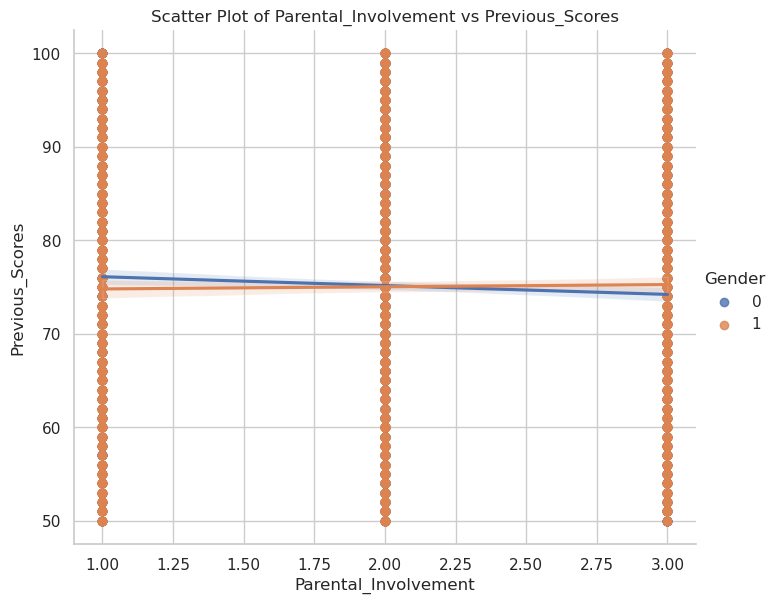

<Figure size 800x600 with 0 Axes>

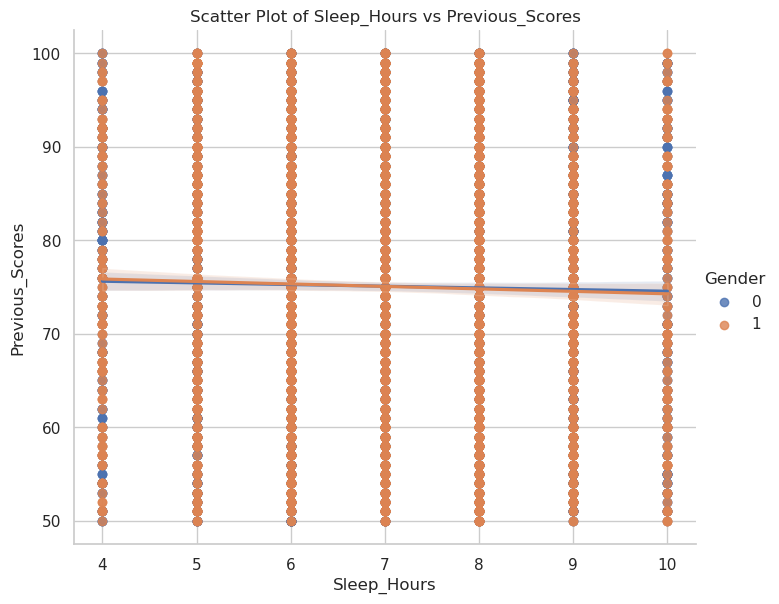

<Figure size 800x600 with 0 Axes>

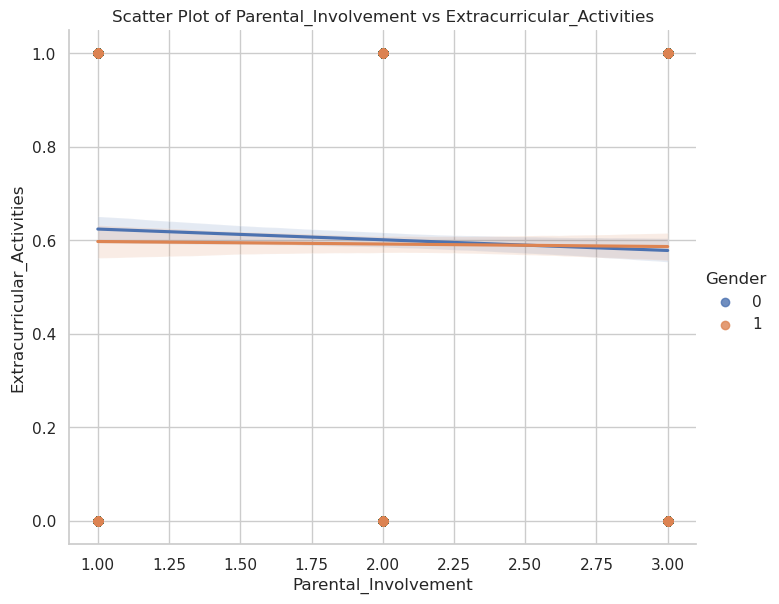

<Figure size 800x600 with 0 Axes>

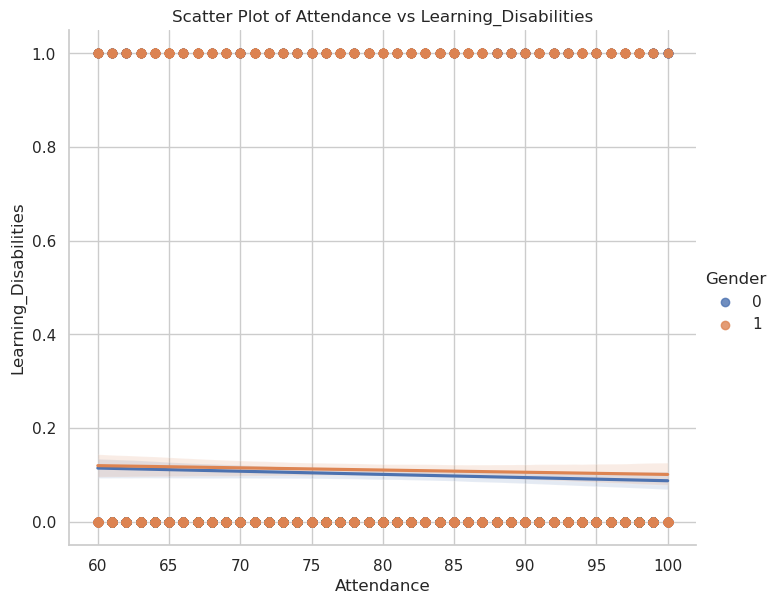

<Figure size 800x600 with 0 Axes>

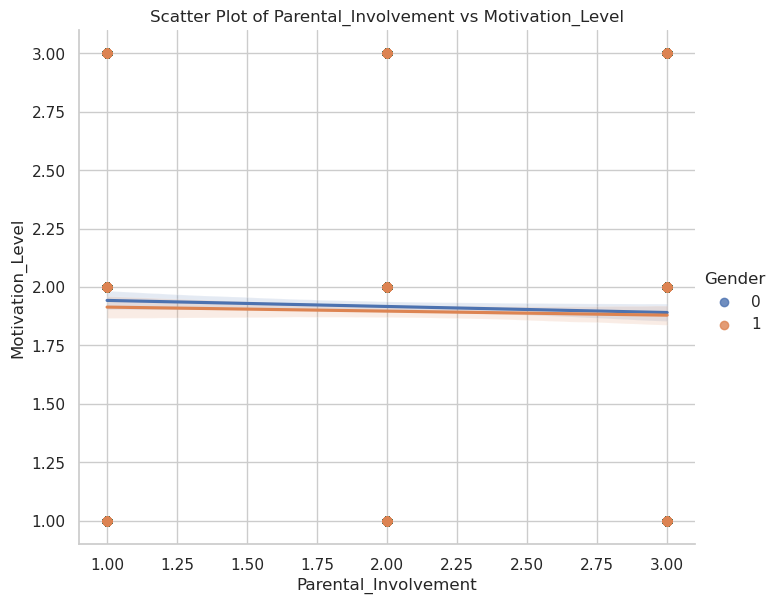

<Figure size 800x600 with 0 Axes>

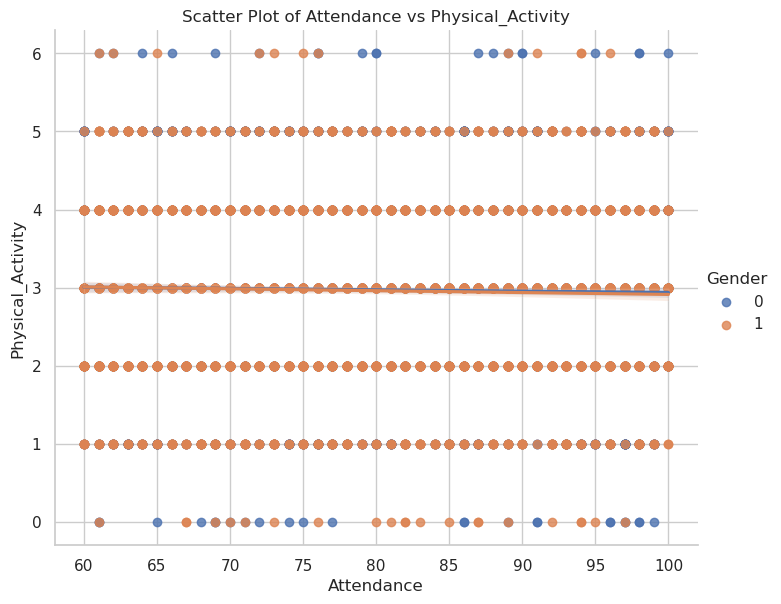

<Figure size 800x600 with 0 Axes>

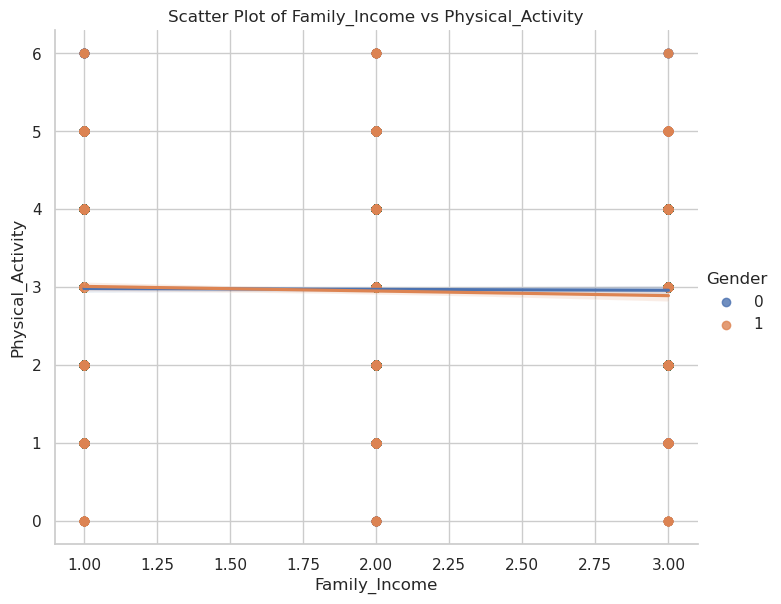

<Figure size 800x600 with 0 Axes>

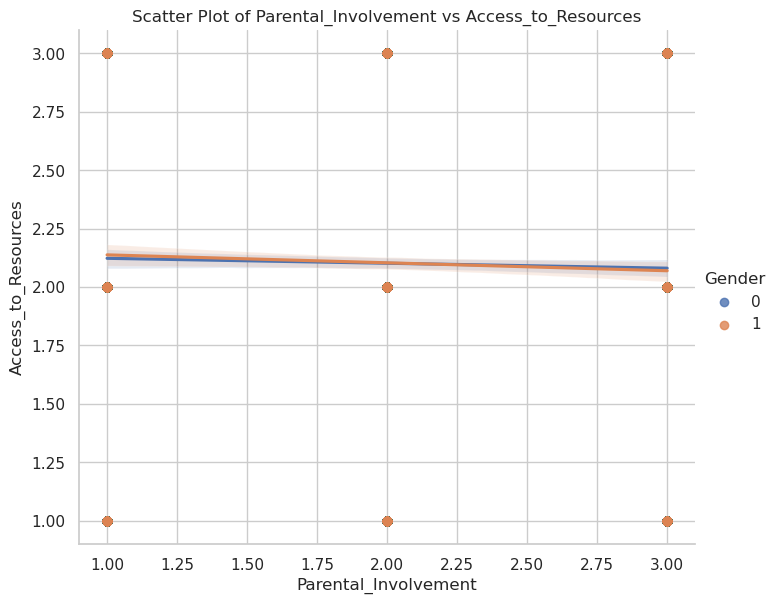

<Figure size 800x600 with 0 Axes>

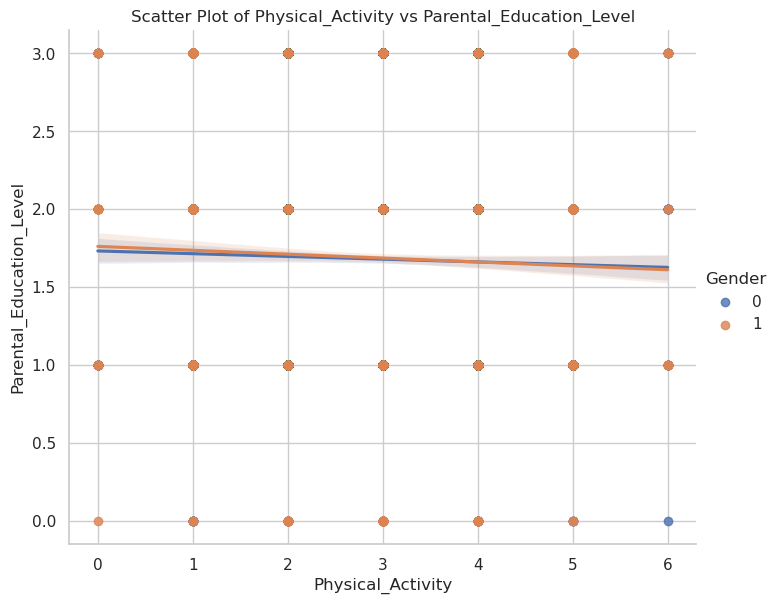

<Figure size 800x600 with 0 Axes>

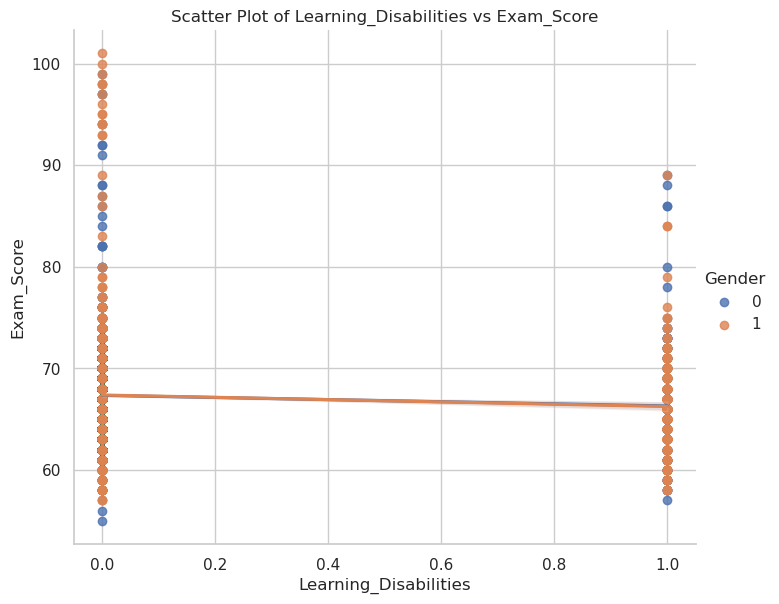

In [136]:
# column to use for coloring the scatter plots
hue_column = 'Gender'

# create scatter plots with regression lines for each pair
for (var2, var1) in inv_top_pairs:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

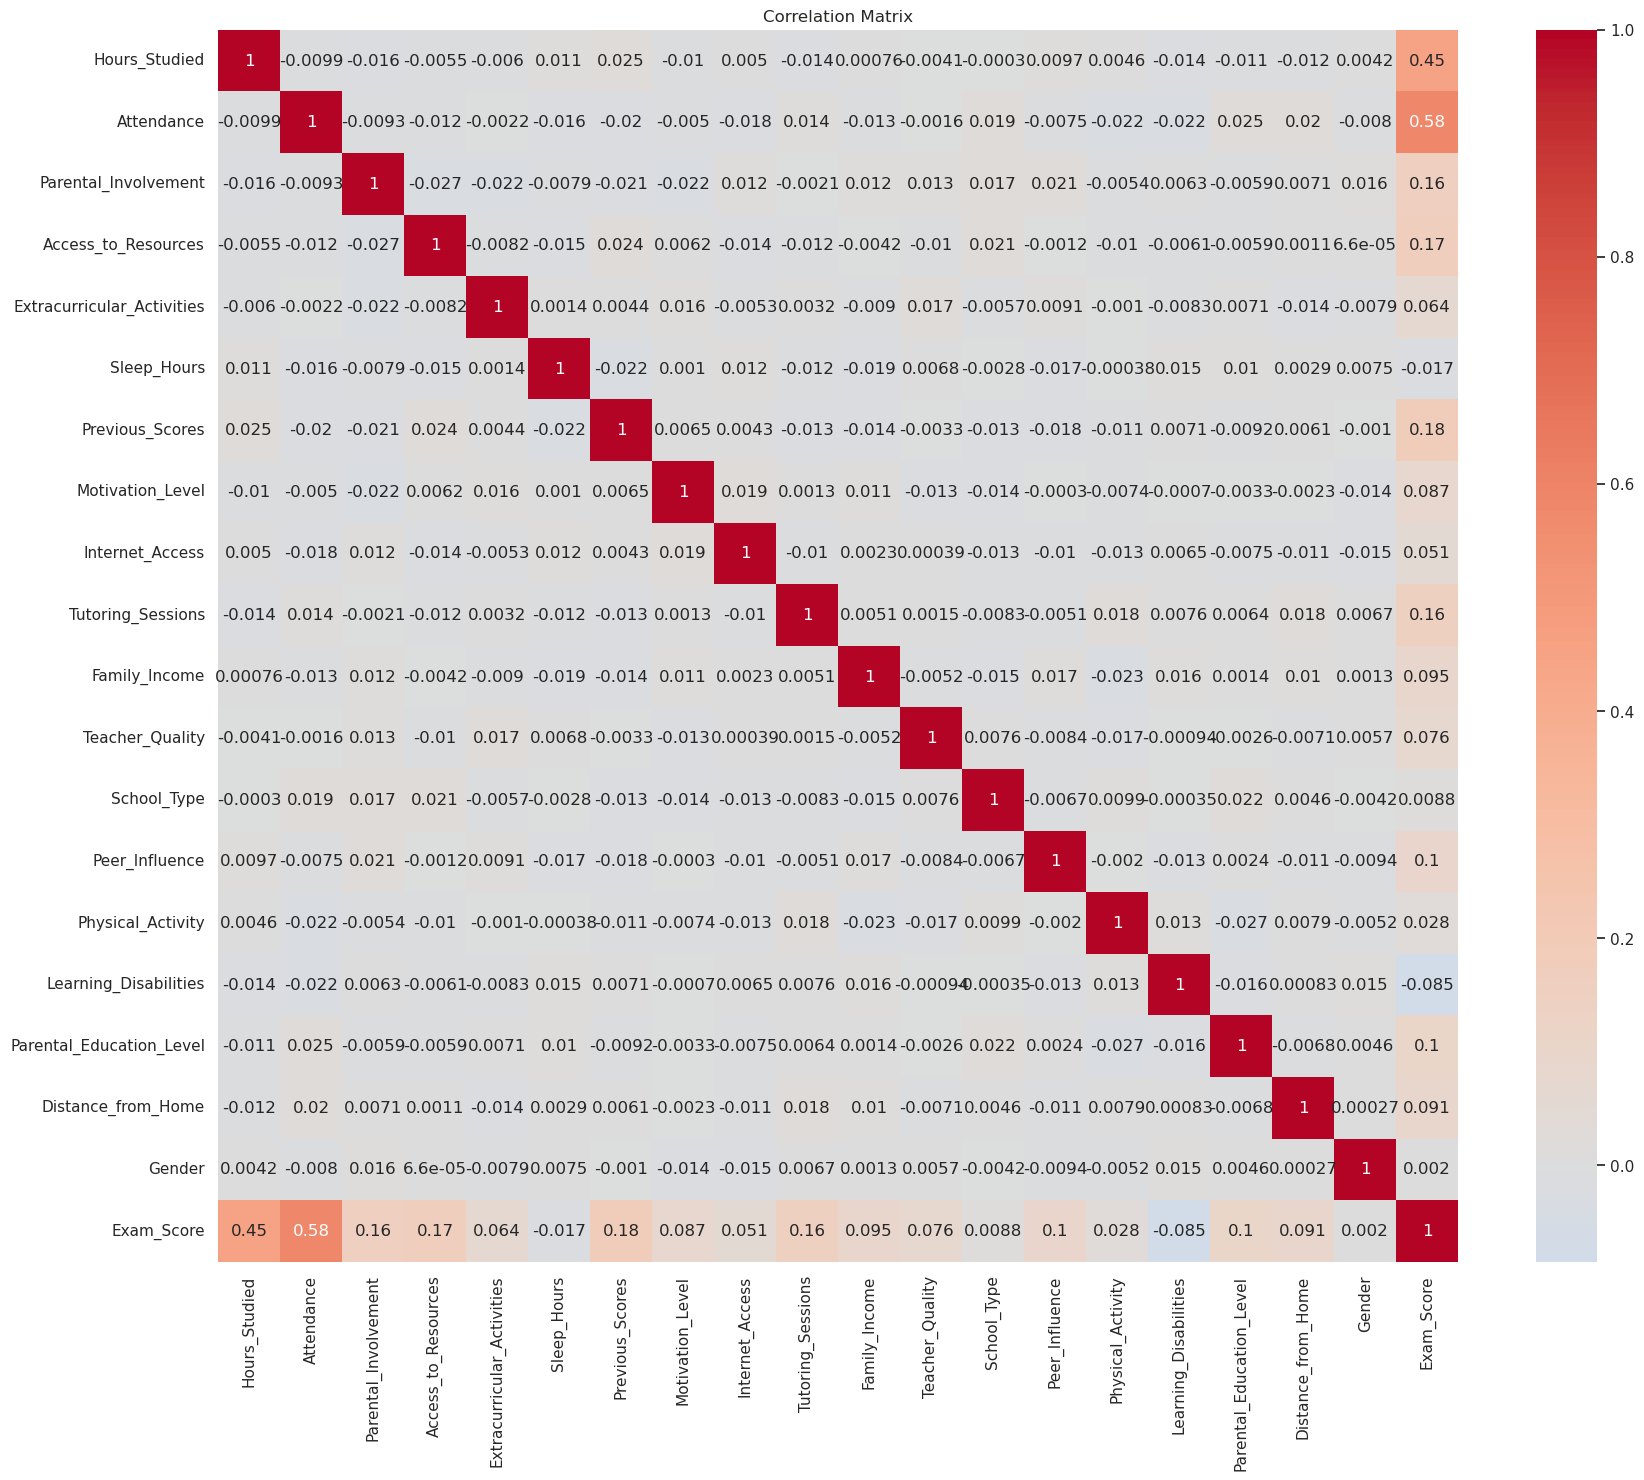

In [137]:
# Correlation Matrix ( Numeric Only )
corr_matrix = data.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=np.array((10, 8)) * 2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [138]:
# # Correlation Matrix ( Numeric Only )
# corr_matrix = data.corr(numeric_only=False)

# # Create a heatmap
# plt.figure(figsize=np.array((10, 8)) * 2)
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()


<Figure size 800x600 with 0 Axes>

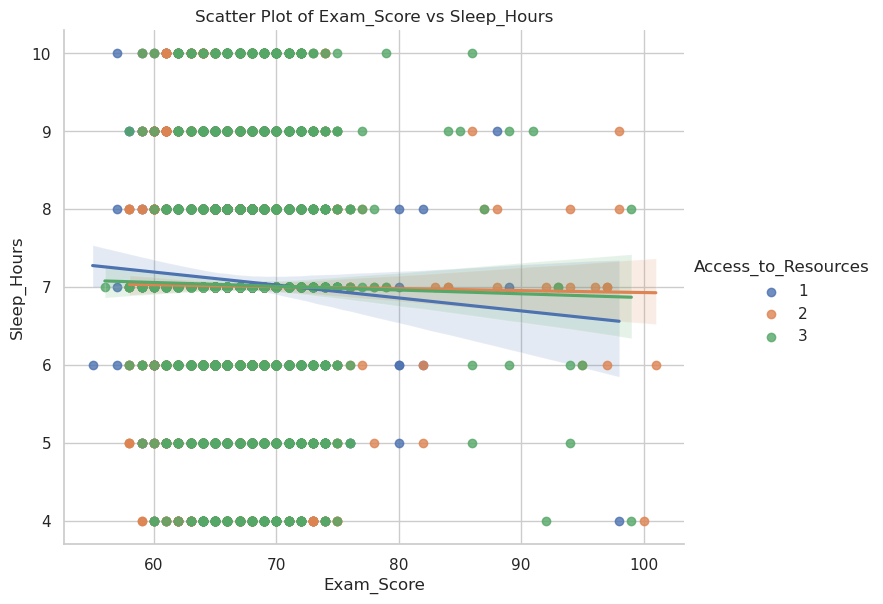

In [139]:
# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create scatter plots with regression lines for each pair
for (var2, var1) in [("Sleep_Hours", "Exam_Score")]:
    plt.figure(figsize=(8, 6))
    sns.lmplot(data=data, x=var1, y=var2, hue=hue_column, height=6, aspect=1.2)
    plt.title(f'Scatter Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

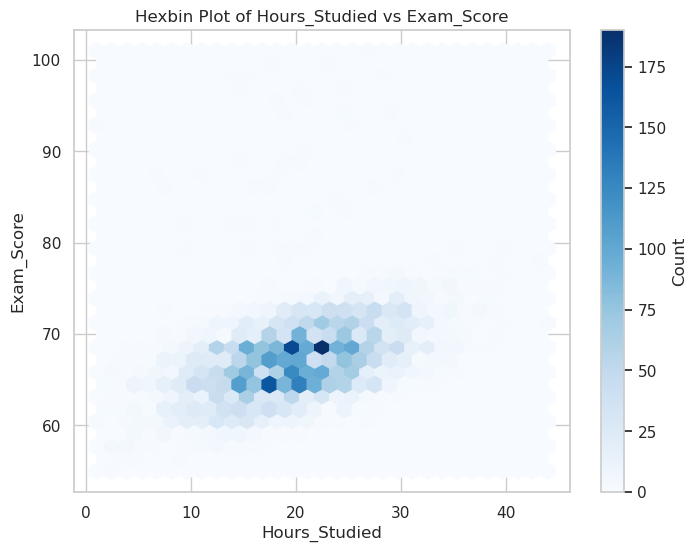

In [140]:

# Column to use for coloring the scatter plots
hue_column = 'Access_to_Resources'

# Create hexbin plots for each pair
for (var2, var1) in [("Exam_Score", "Hours_Studied")]:
    plt.figure(figsize=(8, 6))
    plt.hexbin(data[var1], data[var2], gridsize=30, cmap='Blues')
    plt.colorbar(label='Count')
    plt.title(f'Hexbin Plot of {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

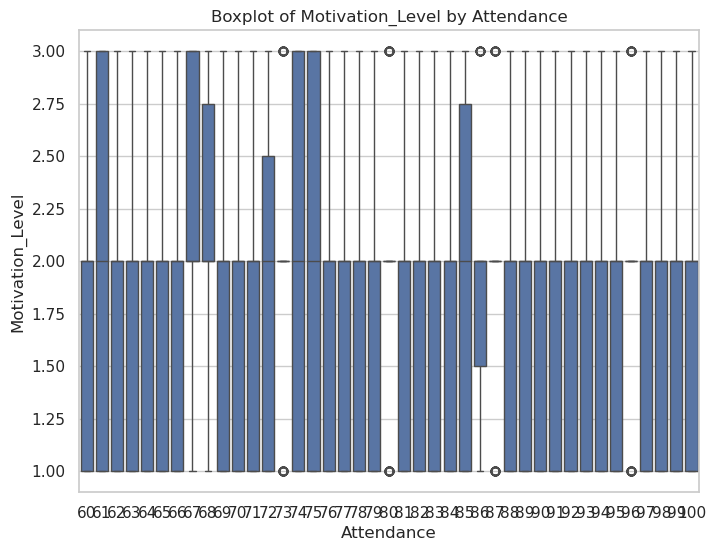

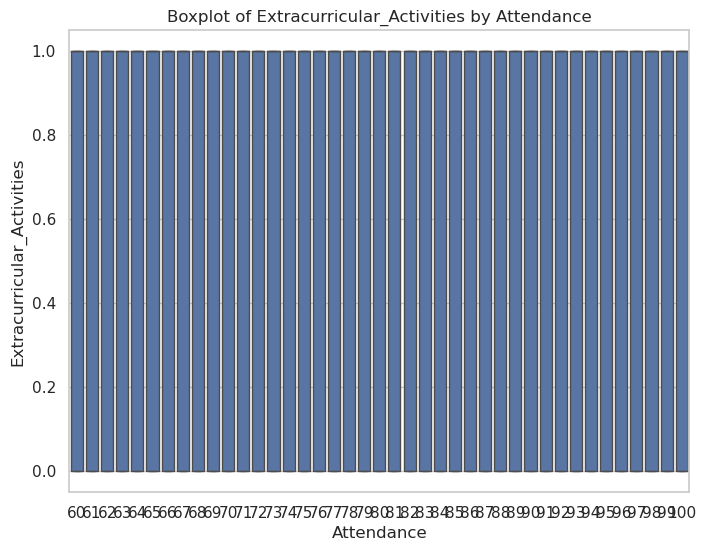

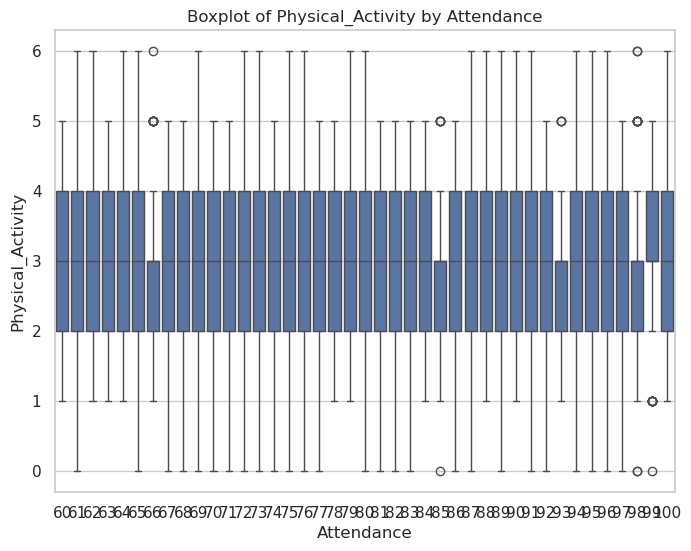

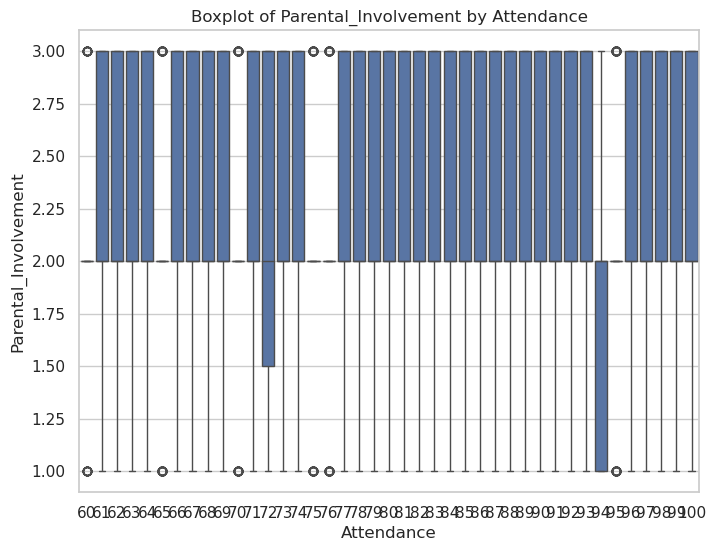

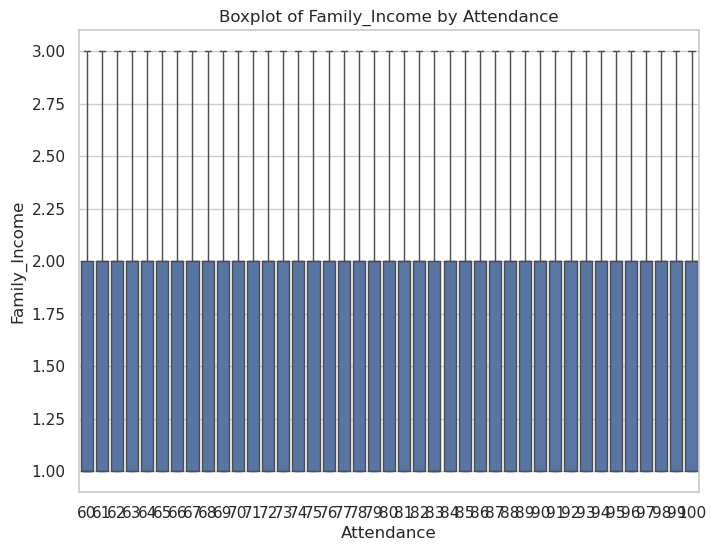

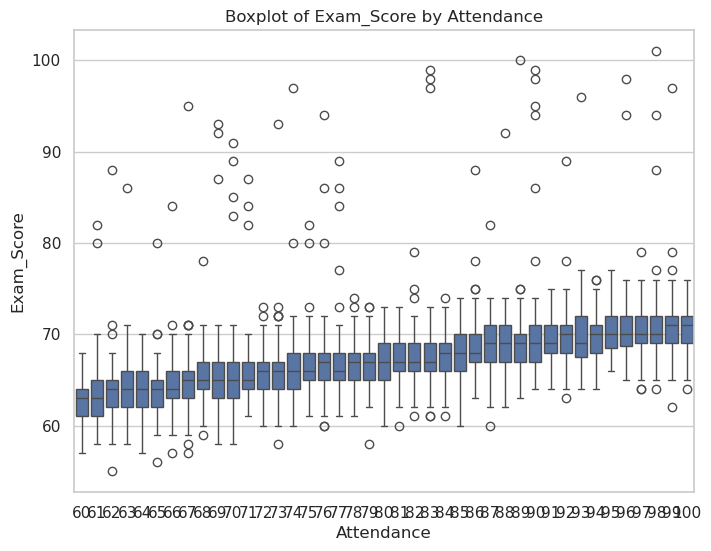

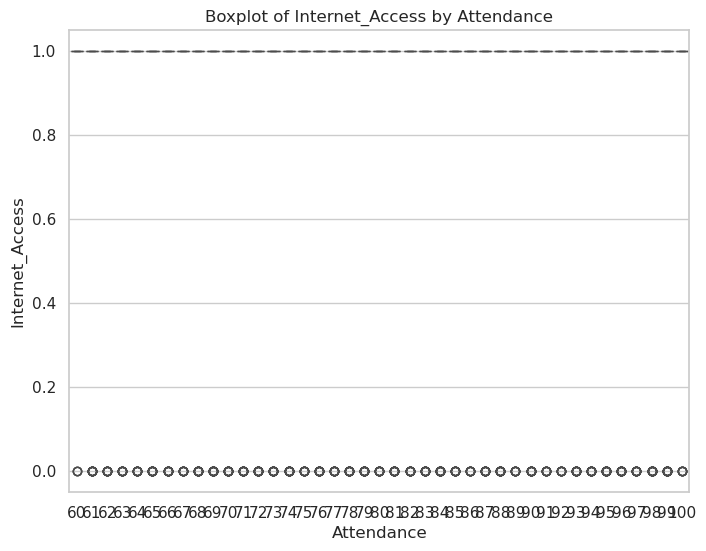

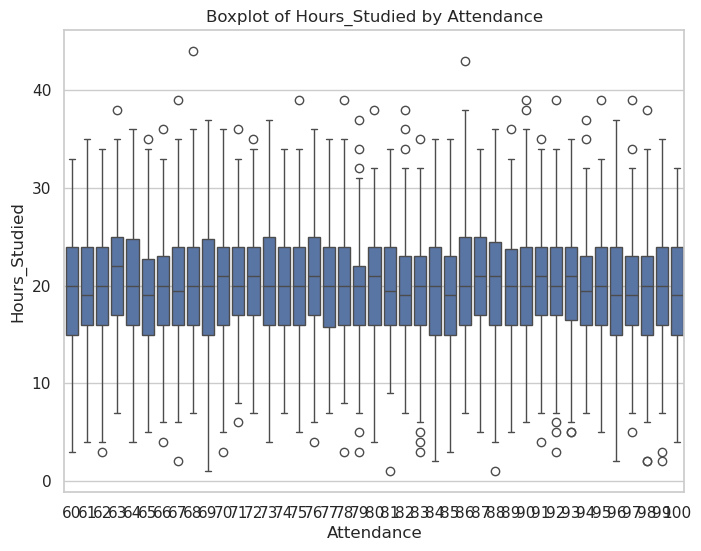

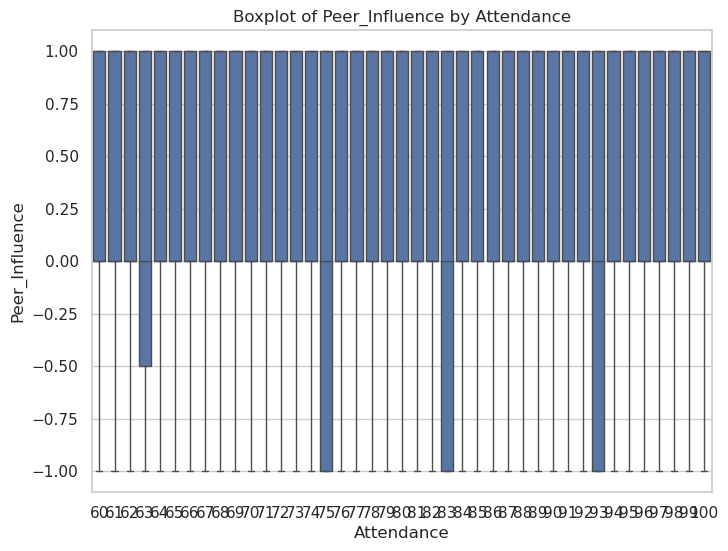

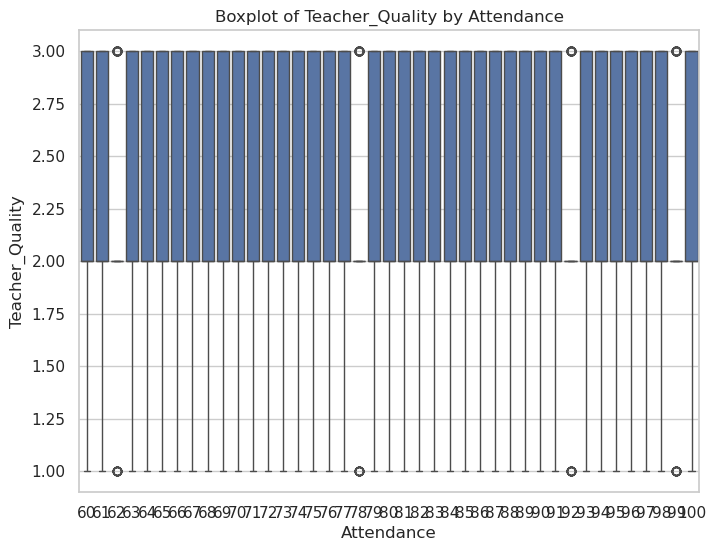

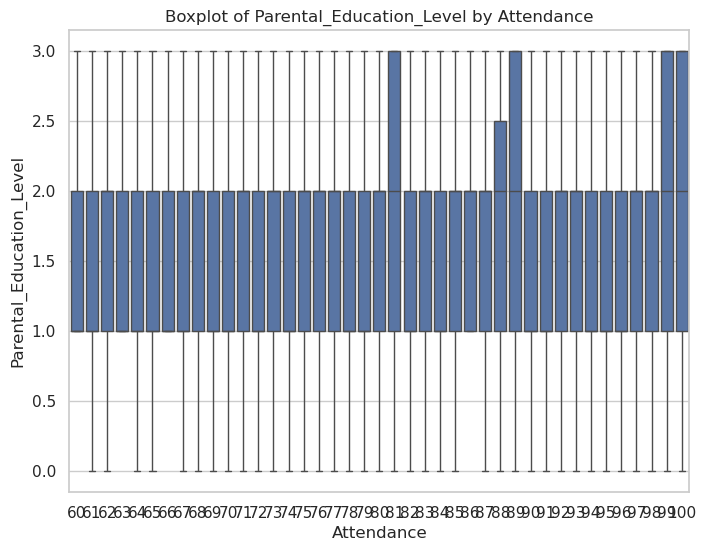

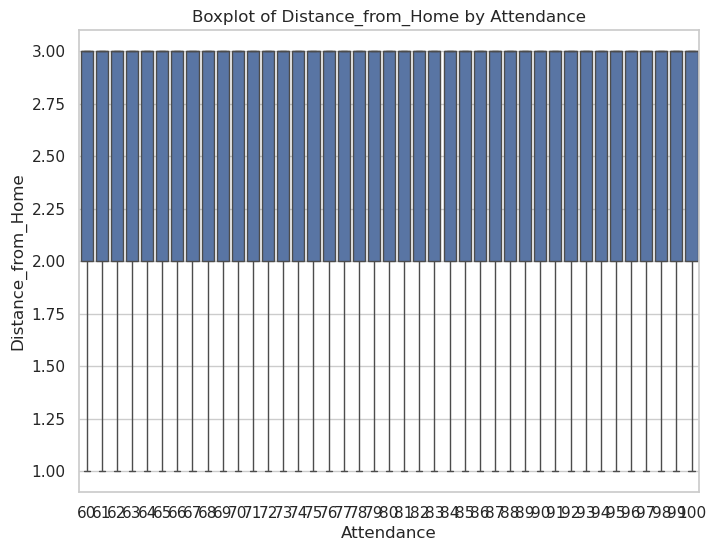

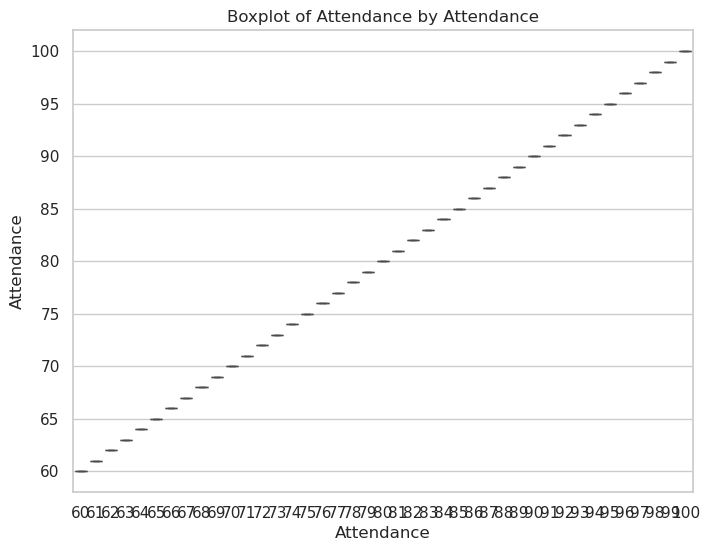

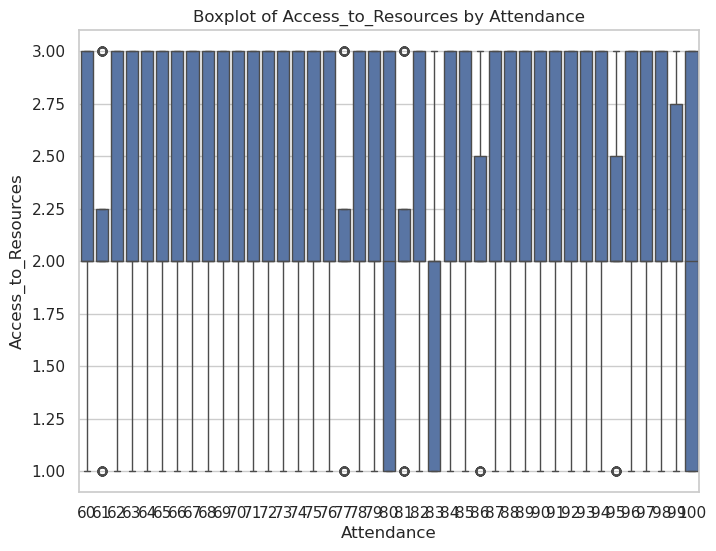

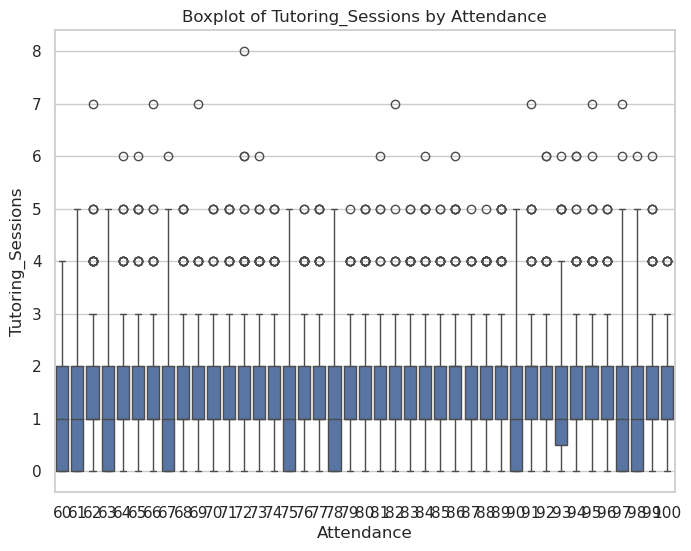

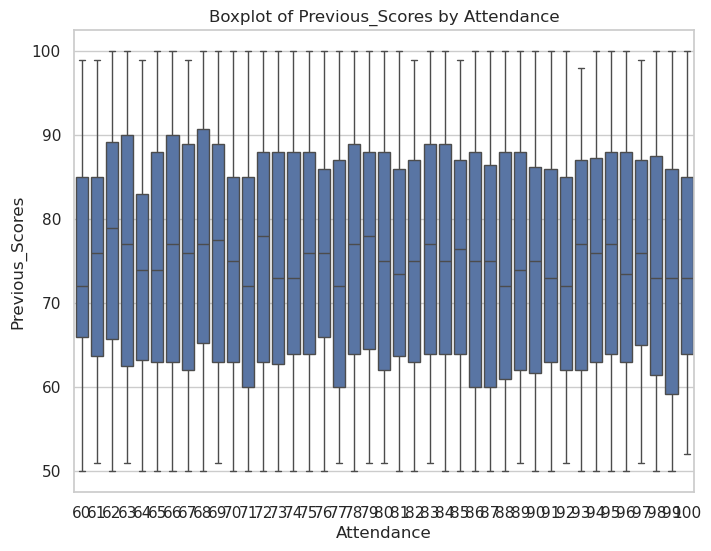

In [141]:
# 4. Boxplots for Key Variables by Category (e.g., Gender)
hue_column = 'Attendance'  # Change this to the column you want to use for coloring
for var in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x=hue_column, y=var)
    plt.title(f'Boxplot of {var} by {hue_column}')
    plt.xlabel(hue_column)
    plt.ylabel(var)
    plt.show()


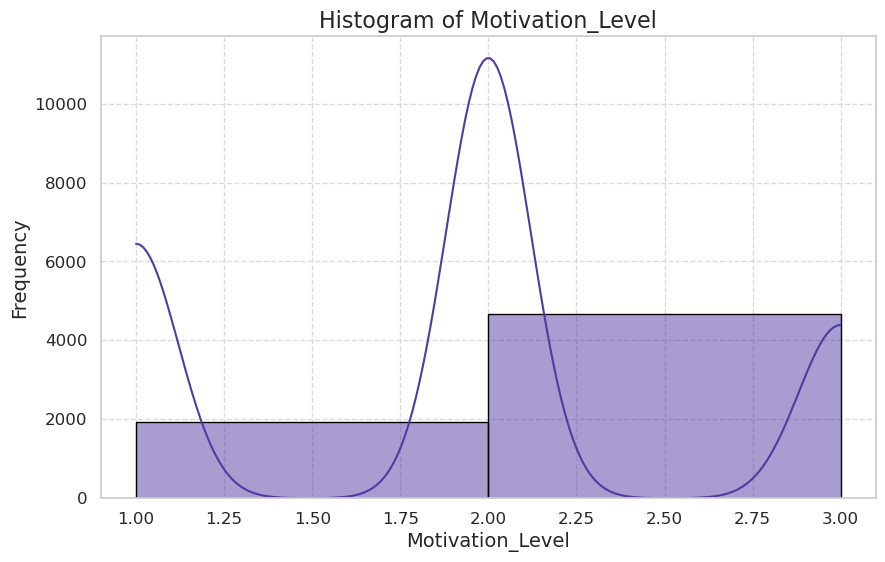

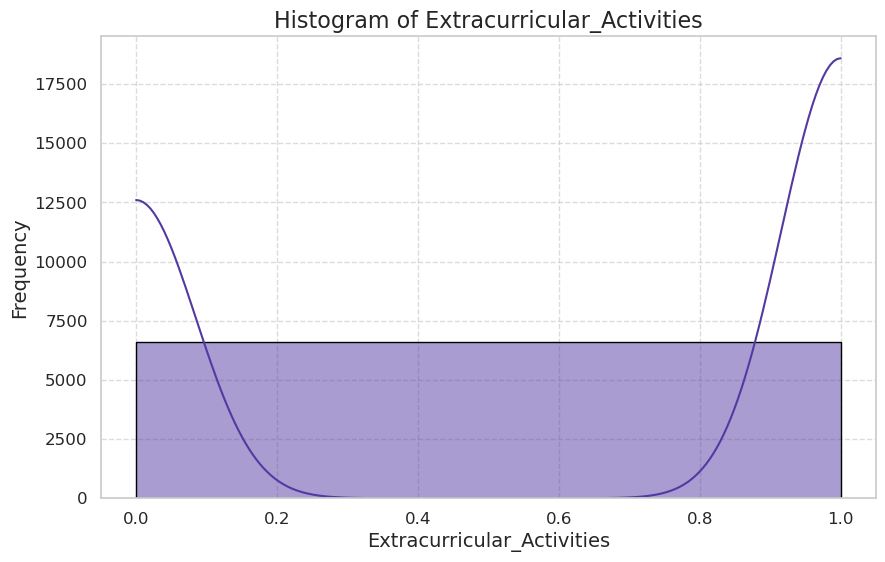

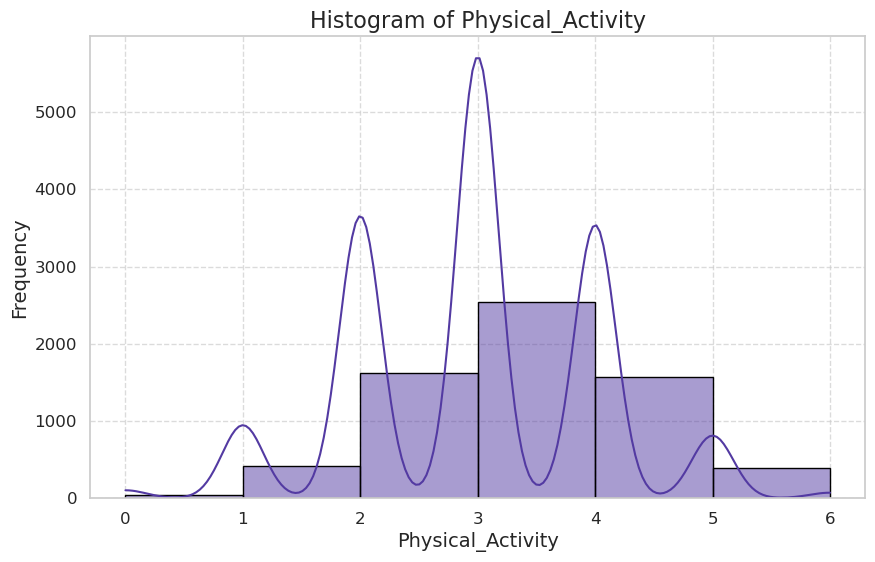

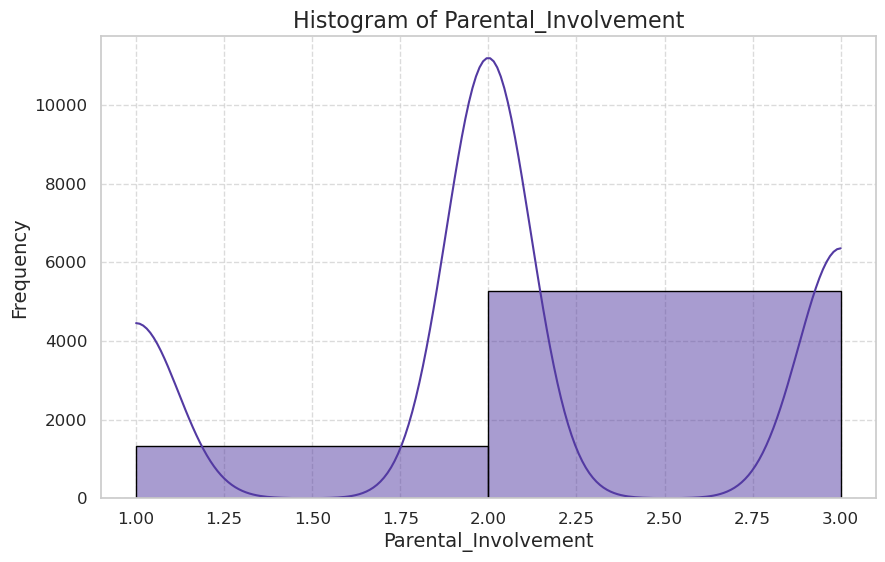

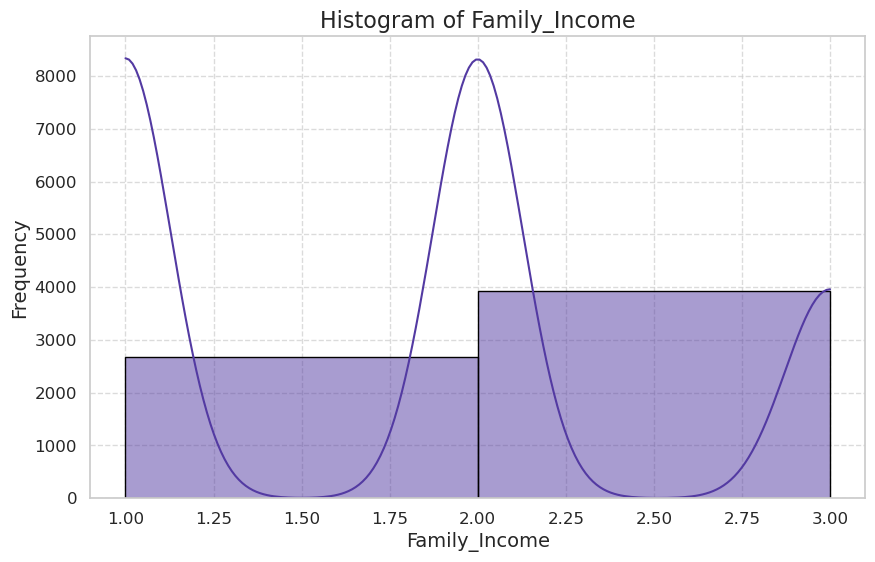

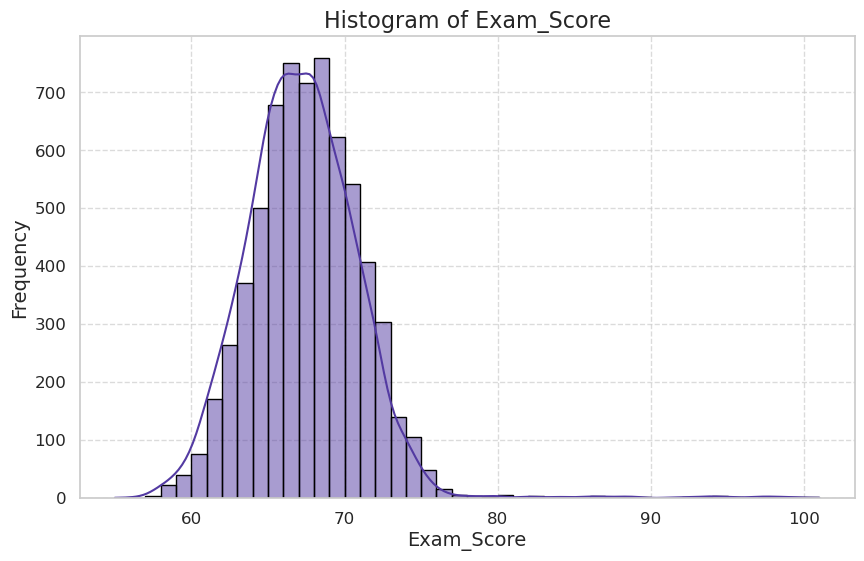

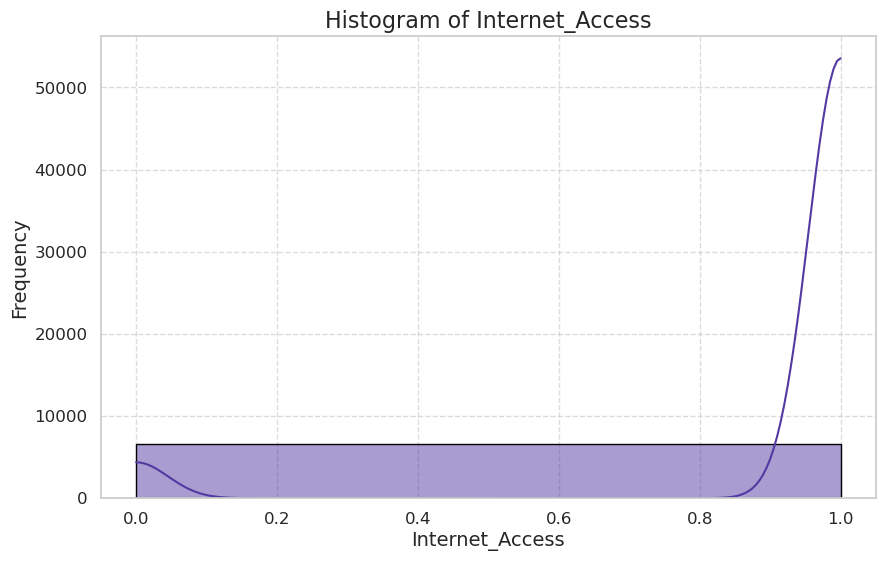

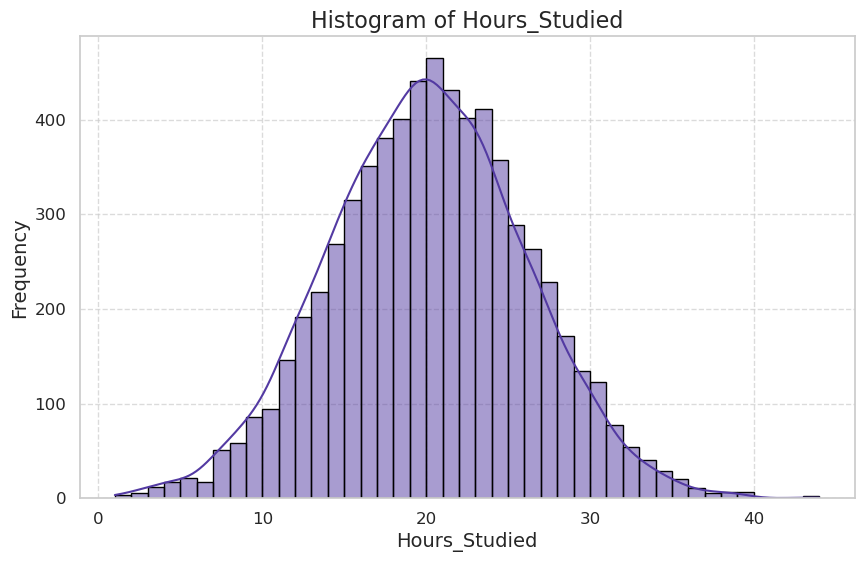

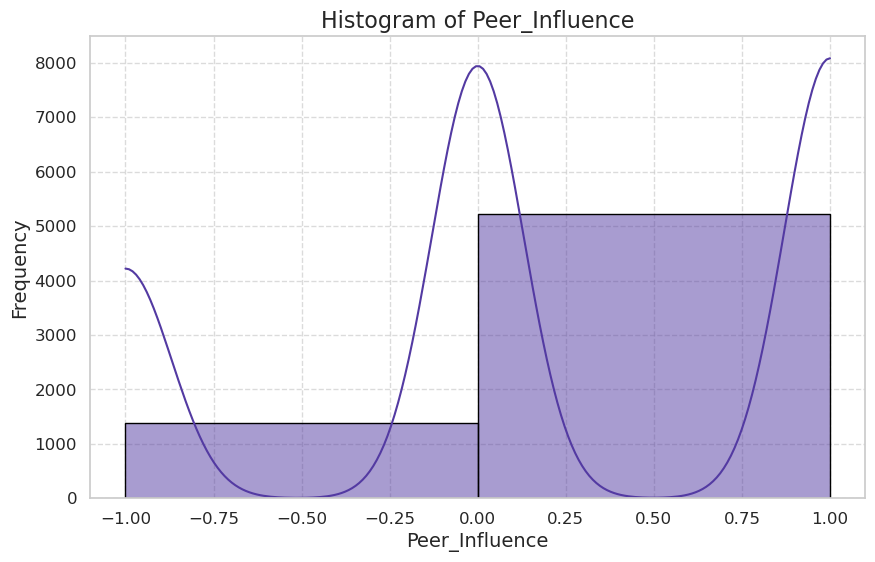

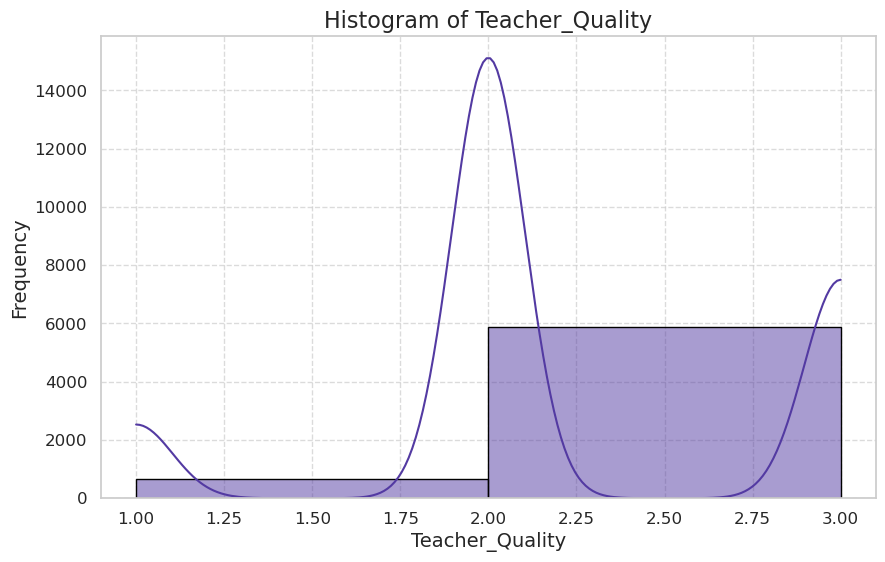

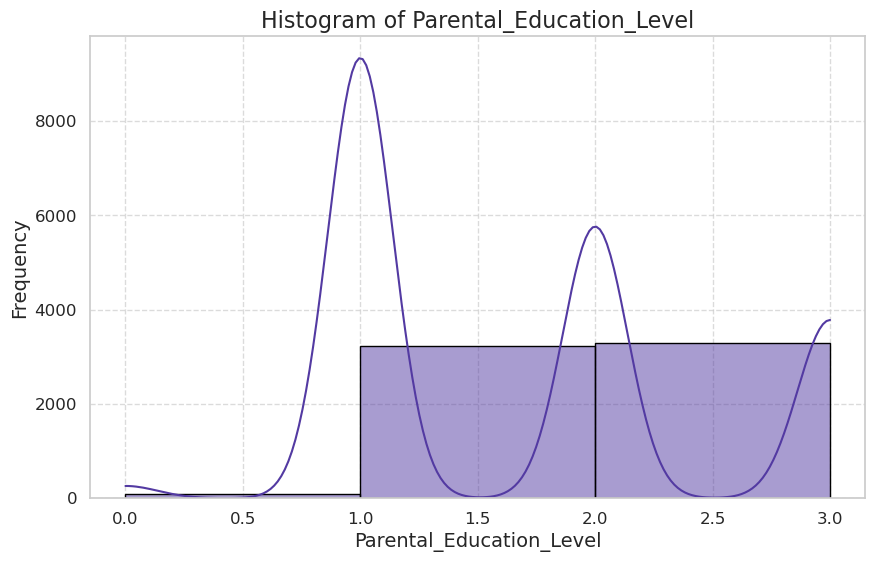

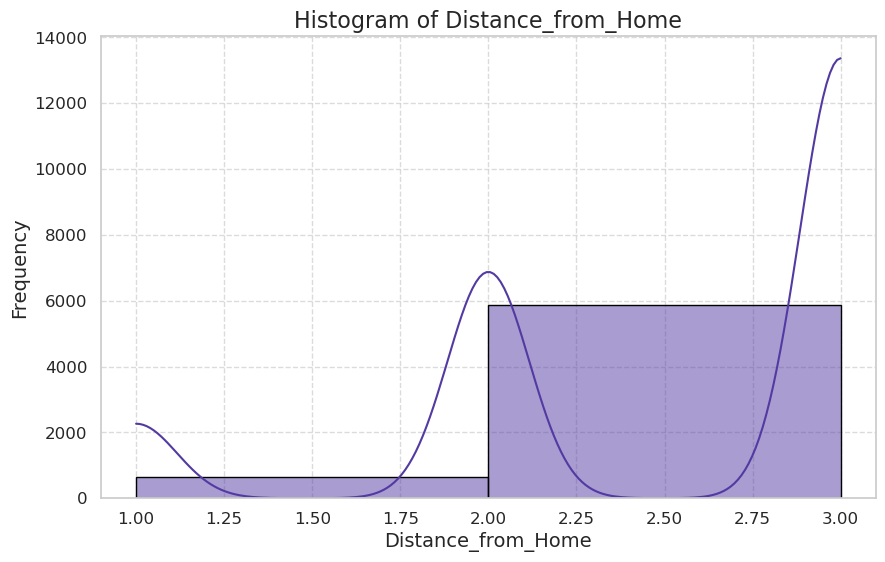

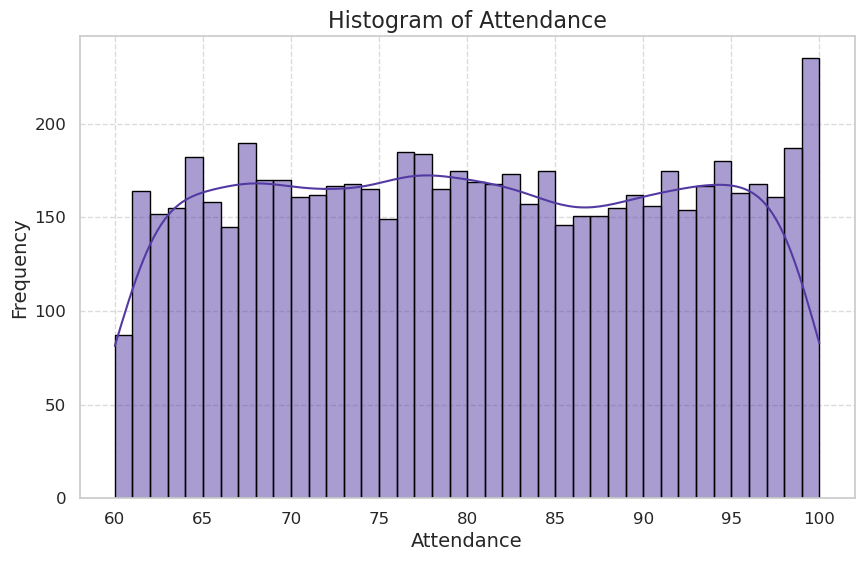

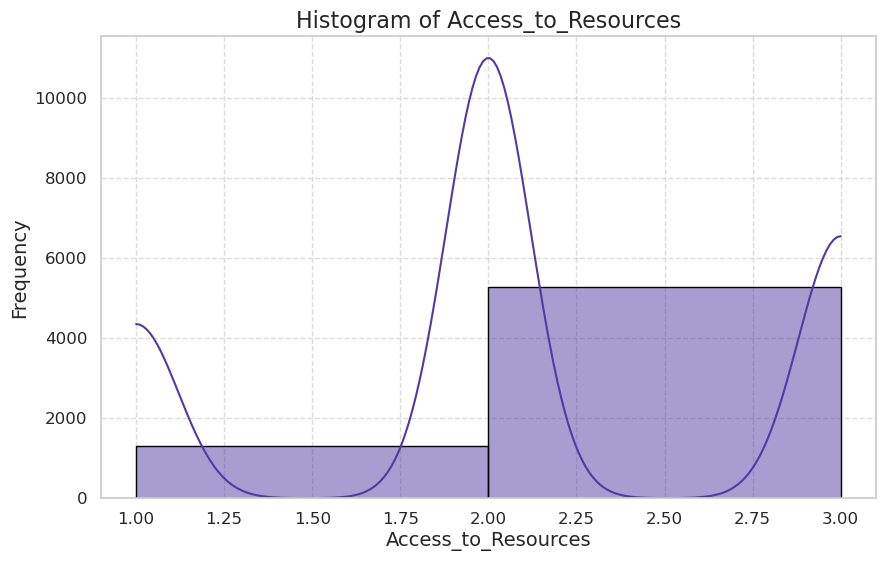

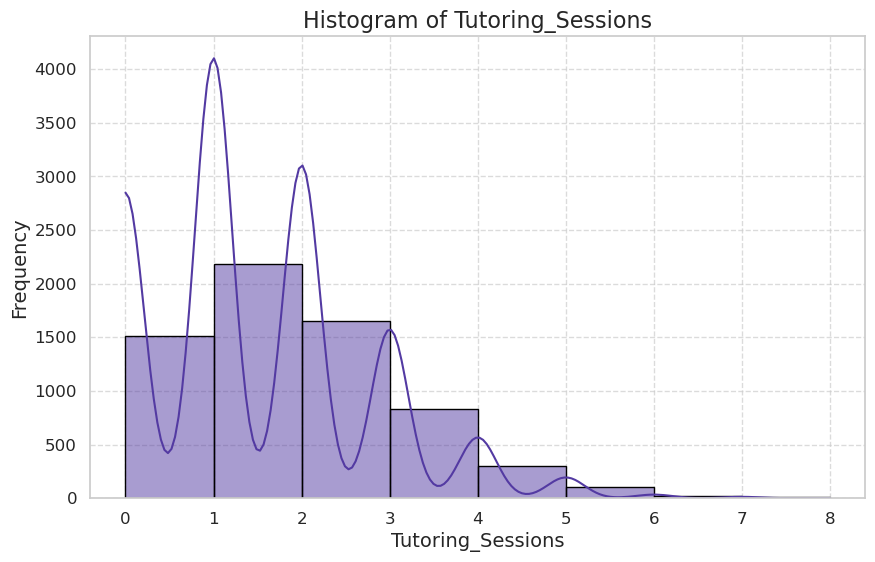

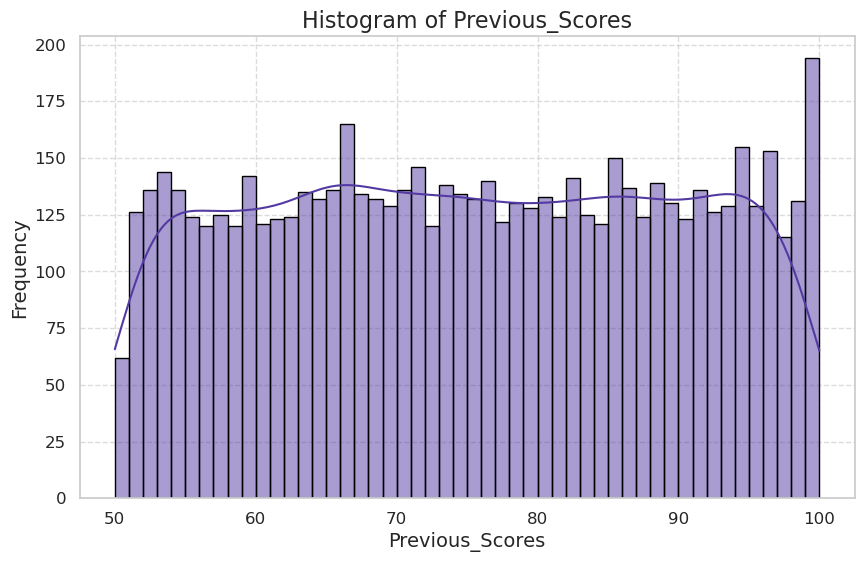

In [142]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create histograms for each variable in the top correlated pairs

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=var, kde=True, binwidth=1, color='#533aa2', edgecolor='black')
    plt.title(f'Histogram of {var}', fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

Average Exam_Score by Attendance:
    Attendance  Exam_Score
0           60   62.413793
1           61   63.384146
2           62   63.756579
3           63   64.361290
4           64   63.884615
5           65   63.905063
6           66   64.537931
7           67   64.626316
8           68   65.147059
9           69   65.123529
10          70   65.527950
11          71   65.611111
12          72   65.694611
13          73   65.952381
14          74   66.272727
15          75   66.288591
16          76   66.886486
17          77   66.668478
18          78   66.890909
19          79   66.828571
20          80   67.088757
21          81   67.232143
22          82   67.341040
23          83   67.968153
24          84   67.742857
25          85   67.883562
26          86   68.655629
27          87   68.741722
28          88   68.909677
29          89   69.104938
30          90   70.012821
31          91   69.417143
32          92   69.727273
33          93   69.820359
34          94   69.5

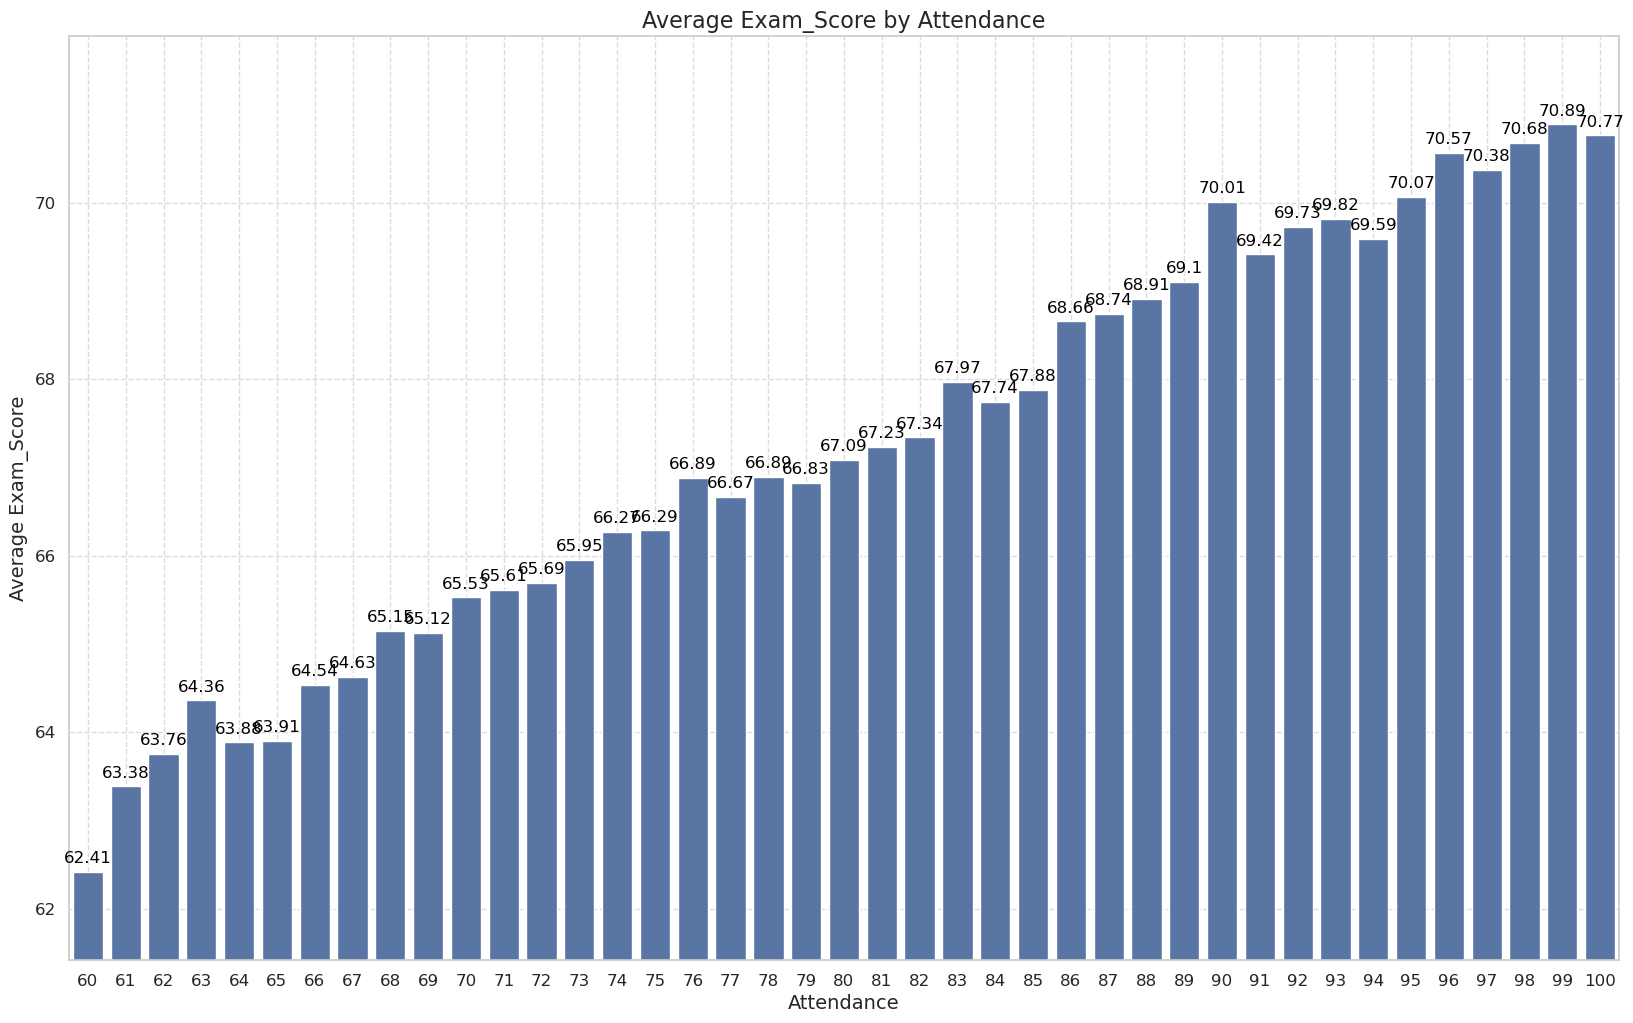

Average Exam_Score by Hours_Studied:
    Hours_Studied  Exam_Score
0               1   71.000000
1               2   63.000000
2               3   61.333333
3               4   61.647059
4               5   62.857143
5               6   63.470588
6               7   64.352941
7               8   64.155172
8               9   64.162791
9              10   64.393617
10             11   64.979452
11             12   64.765625
12             13   64.724771
13             14   65.576208
14             15   65.590476
15             16   66.182336
16             17   66.328084
17             18   67.042394
18             19   66.959184
19             20   66.950538
20             21   67.682135
21             22   67.480100
22             23   68.180049
23             24   68.187675
24             25   68.847751
25             26   68.665399
26             27   69.462882
27             28   69.608187
28             29   70.283582
29             30   70.617886
30             31   70.688312
31 

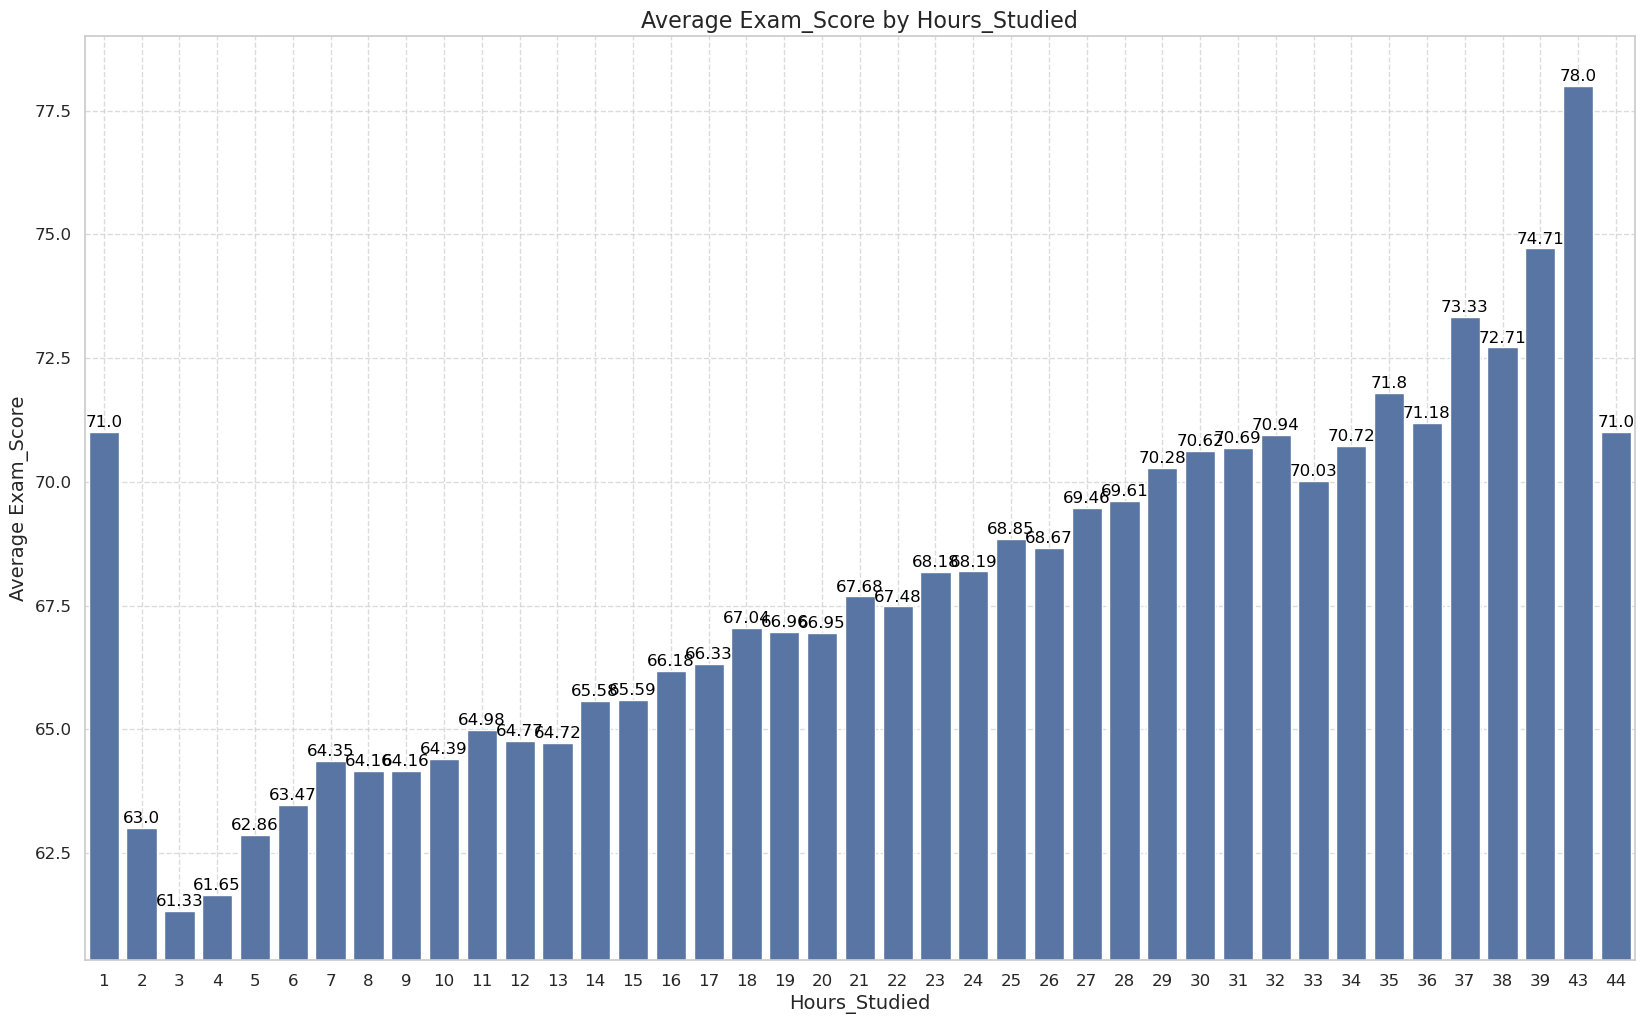

Average Exam_Score by Previous_Scores:
    Previous_Scores  Exam_Score
0                50   65.516129
1                51   65.912698
2                52   66.875000
3                53   66.270833
4                54   66.220588
5                55   66.096774
6                56   66.416667
7                57   66.872000
8                58   66.641667
9                59   66.626761
10               60   66.719008
11               61   66.788618
12               62   66.387097
13               63   66.274074
14               64   66.469697
15               65   66.235294
16               66   66.945455
17               67   66.776119
18               68   66.924242
19               69   67.255814
20               70   66.867647
21               71   66.780822
22               72   67.150000
23               73   66.905797
24               74   66.925373
25               75   67.204545
26               76   67.957143
27               77   67.680328
28               78   67.084615
2

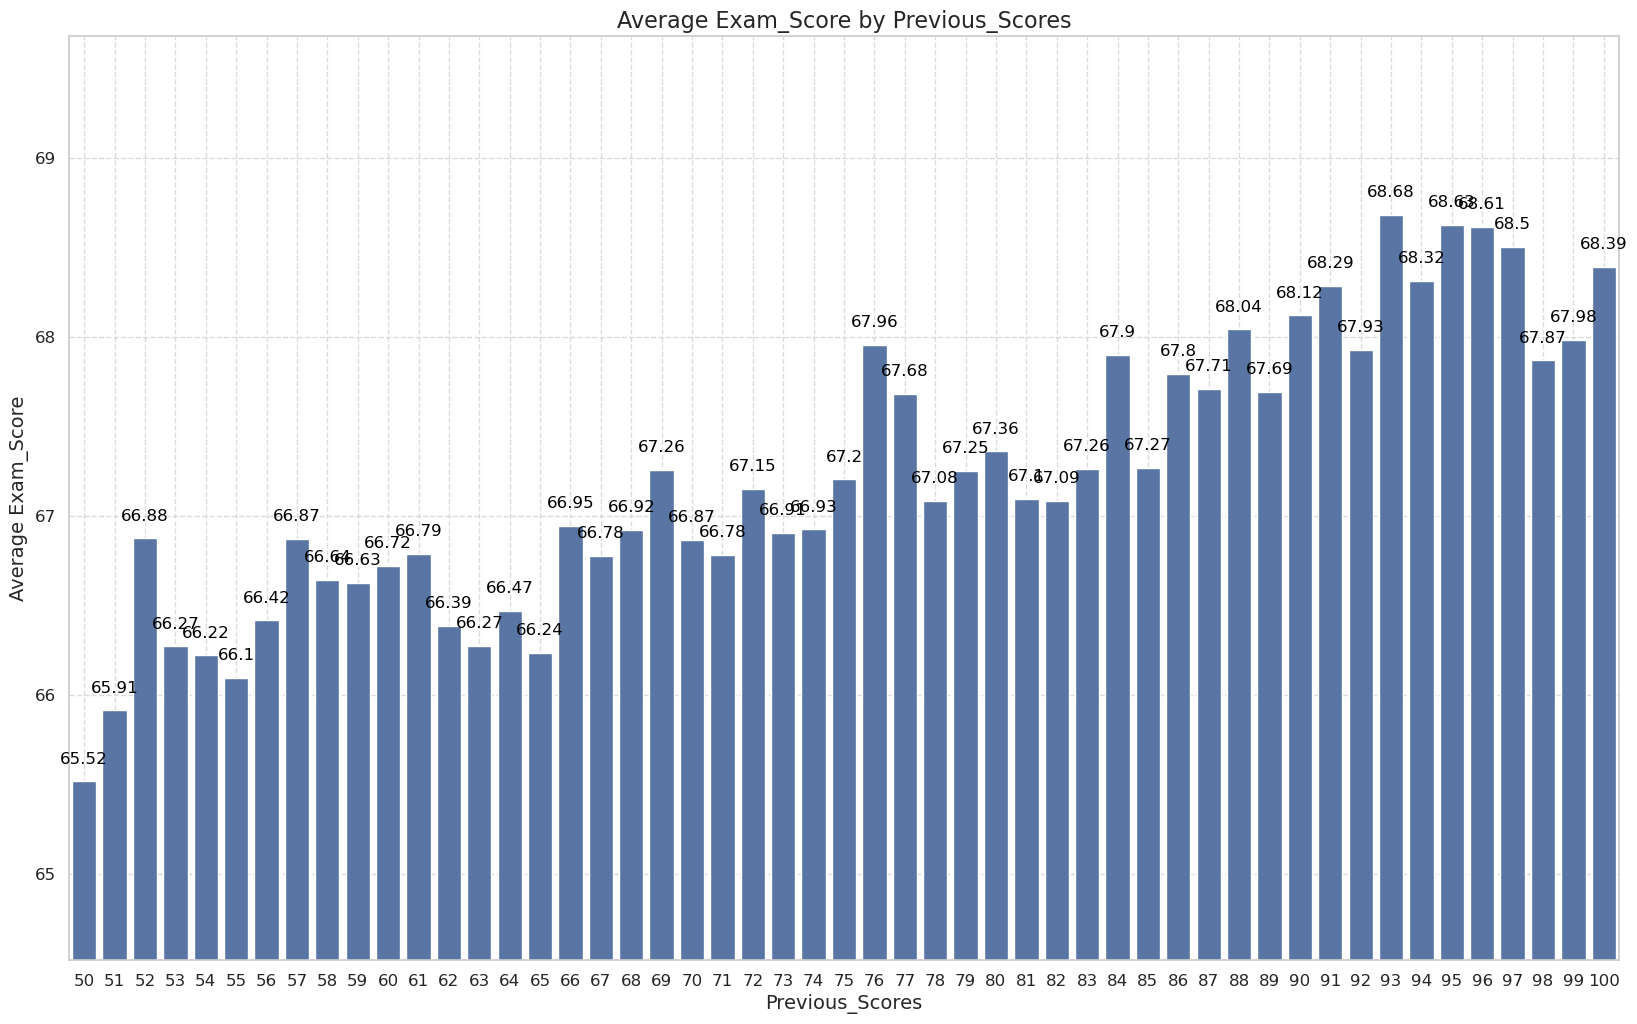

Average Exam_Score by Access_to_Resources:
   Access_to_Resources  Exam_Score
0                    1   66.203351
1                    2   67.134378
2                    3   68.092152
ANOVA test result for Exam_Score by Access_to_Resources: F-statistic = 98.00440911485991, p-value = 1.1392993838178868e-42


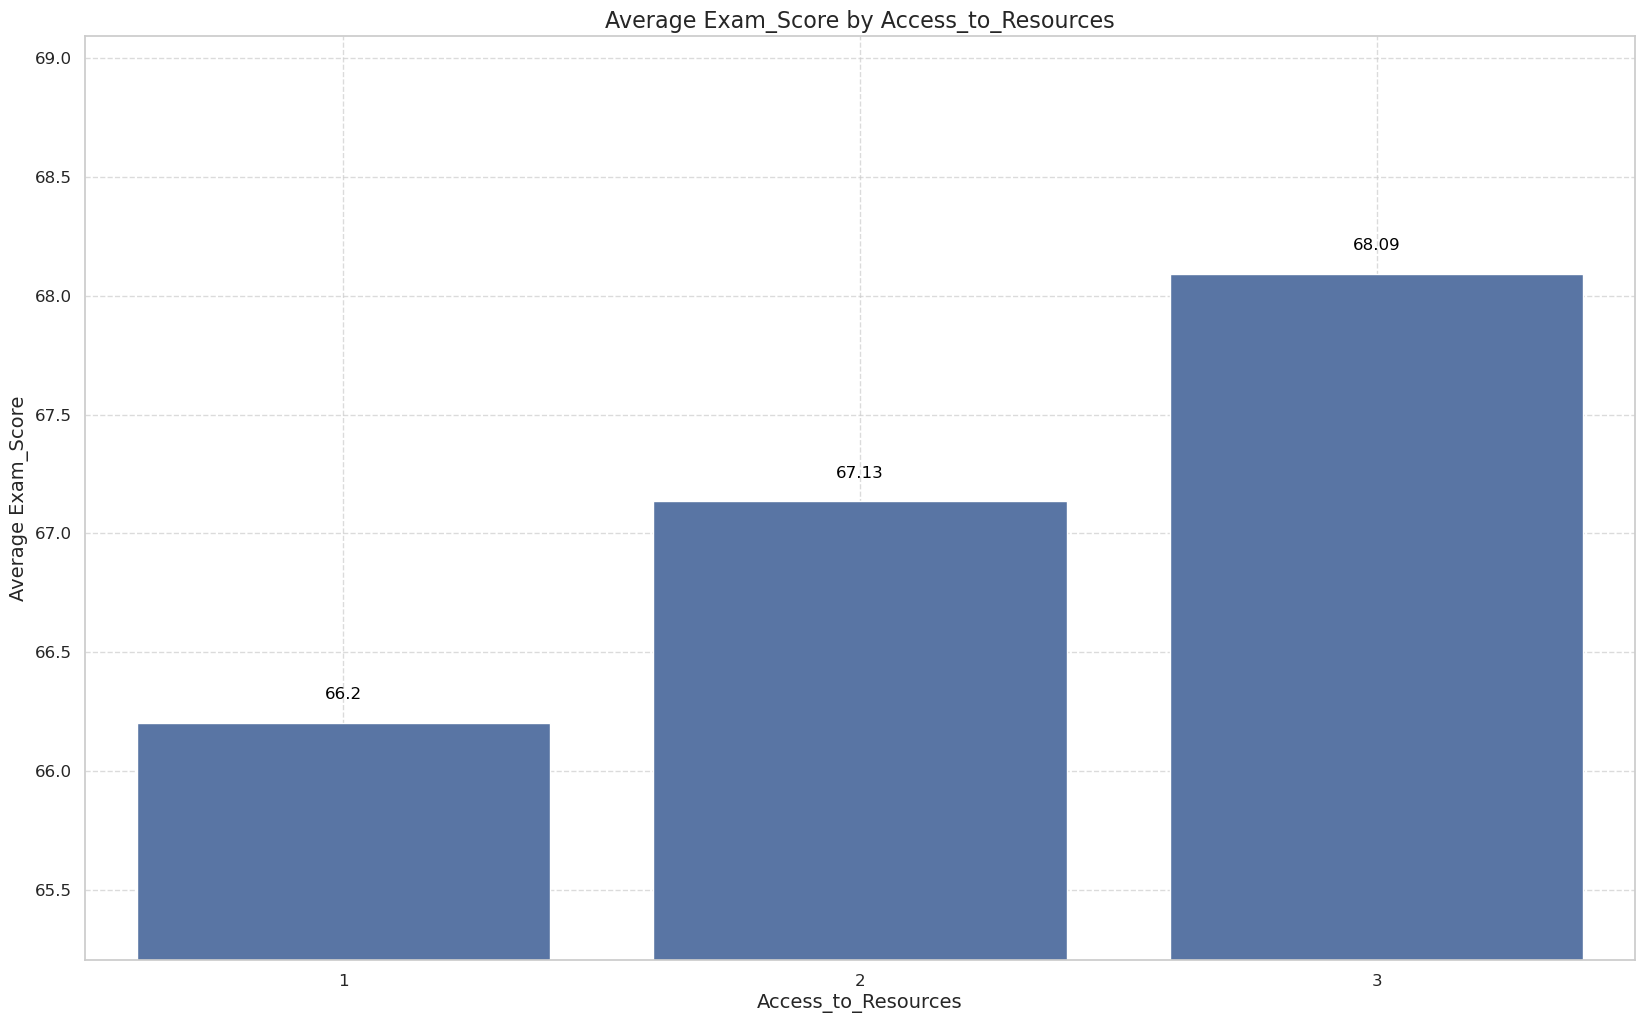

Average Exam_Score by Parental_Involvement:
   Parental_Involvement  Exam_Score
0                     1   66.358265
1                     2   67.098156
2                     3   68.092767
ANOVA test result for Exam_Score by Parental_Involvement: F-statistic = 84.48765484606227, p-value = 5.875479153325444e-37


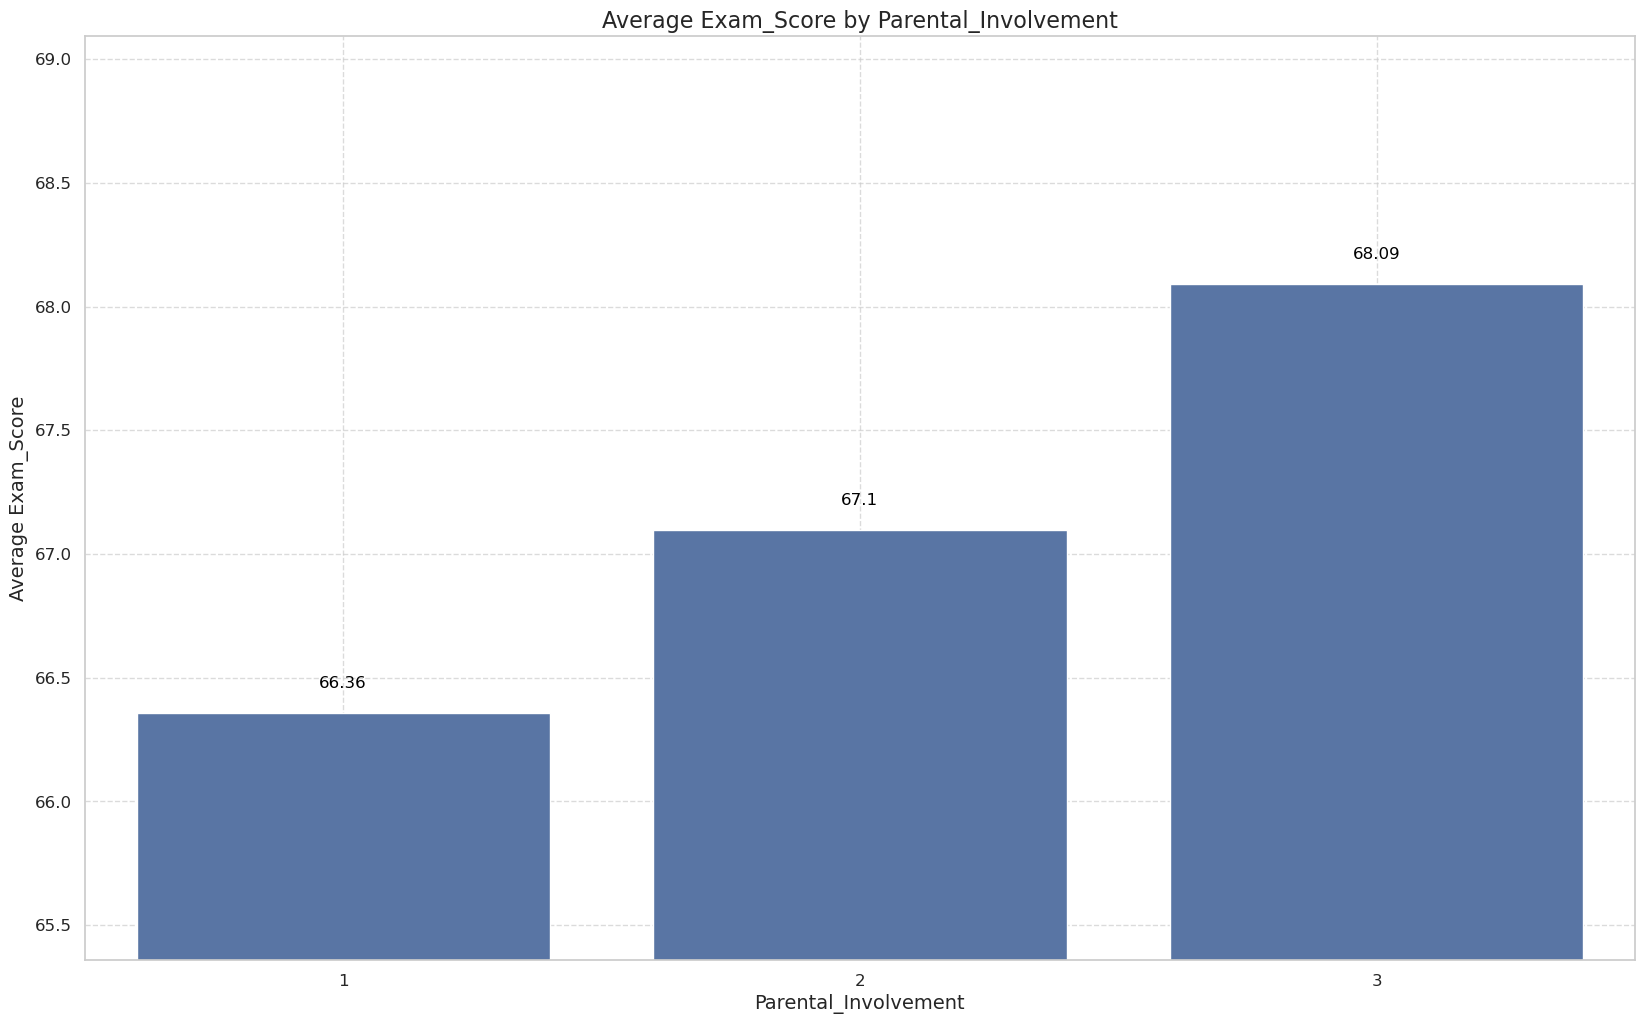

Average Exam_Score by Tutoring_Sessions:
   Tutoring_Sessions  Exam_Score
0                  0   66.489755
1                  1   66.980266
2                  2   67.567010
3                  3   67.894737
4                  4   68.229236
5                  5   69.067961
6                  6   71.666667
7                  7   69.857143
8                  8   69.000000
ANOVA test result for Exam_Score by Tutoring_Sessions: F-statistic = 21.80773640305527, p-value = 4.304698742165406e-33


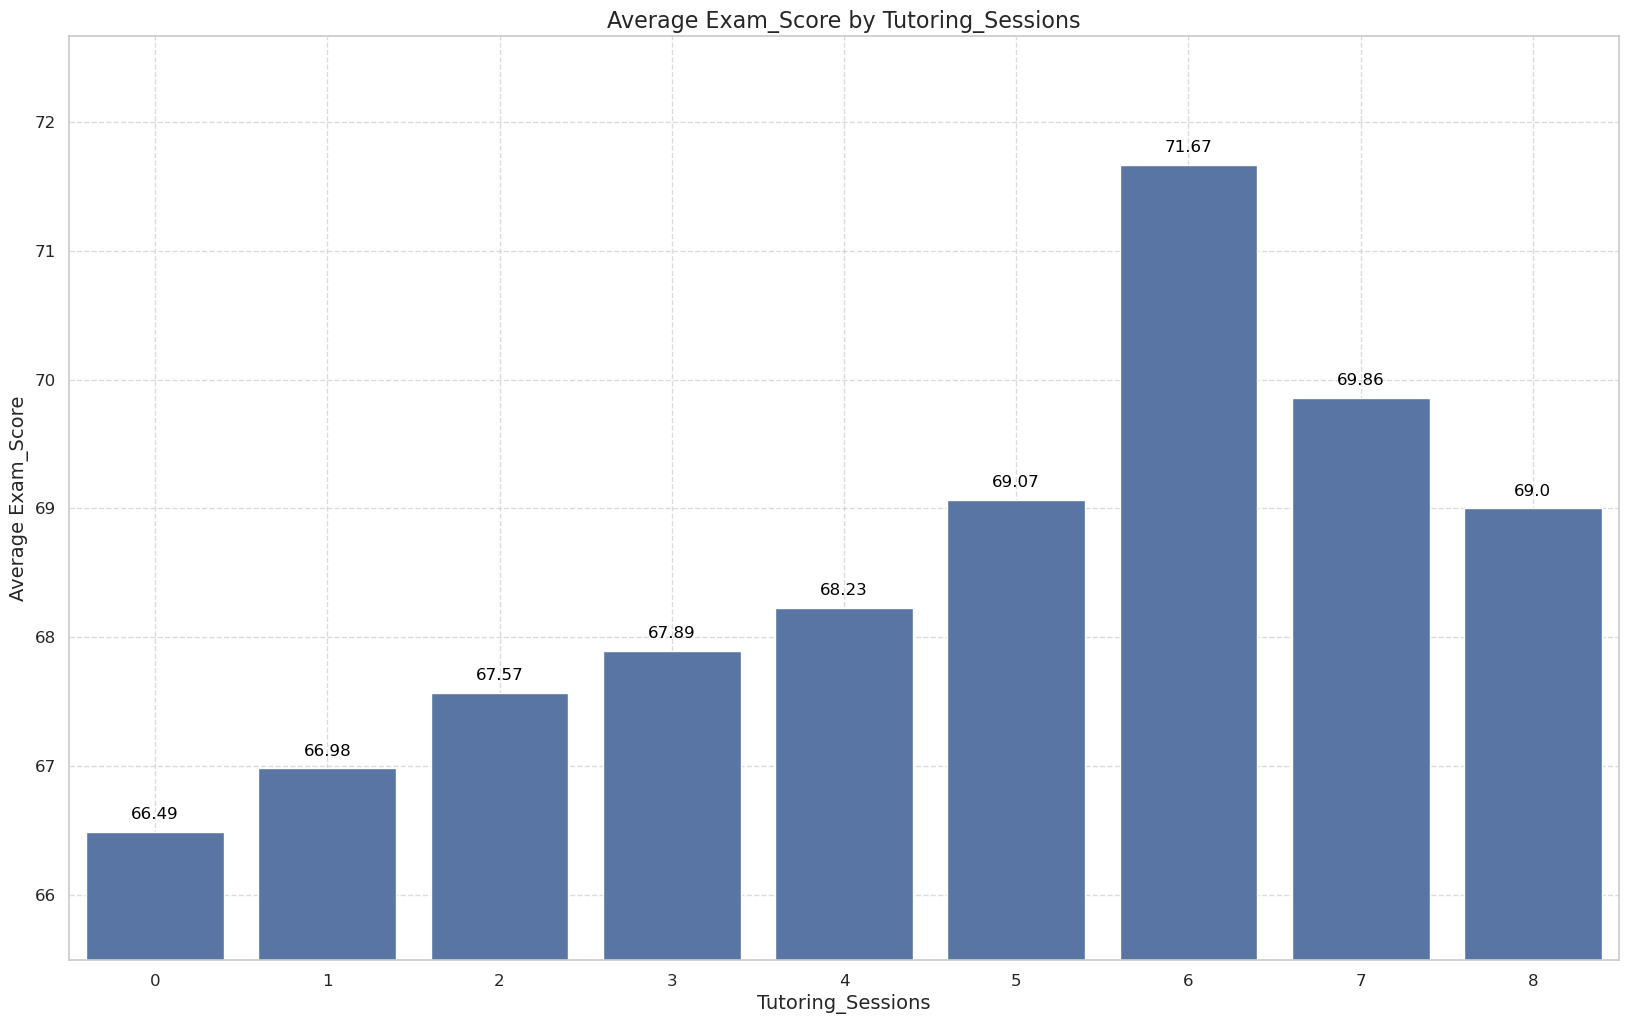

Average Exam_Score by Parental_Education_Level:
   Parental_Education_Level  Exam_Score
0                         0   67.055556
1                         1   66.893577
2                         2   67.315737
3                         3   67.970881
ANOVA test result for Exam_Score by Parental_Education_Level: F-statistic = 24.444311673951052, p-value = 1.0040998225221703e-15


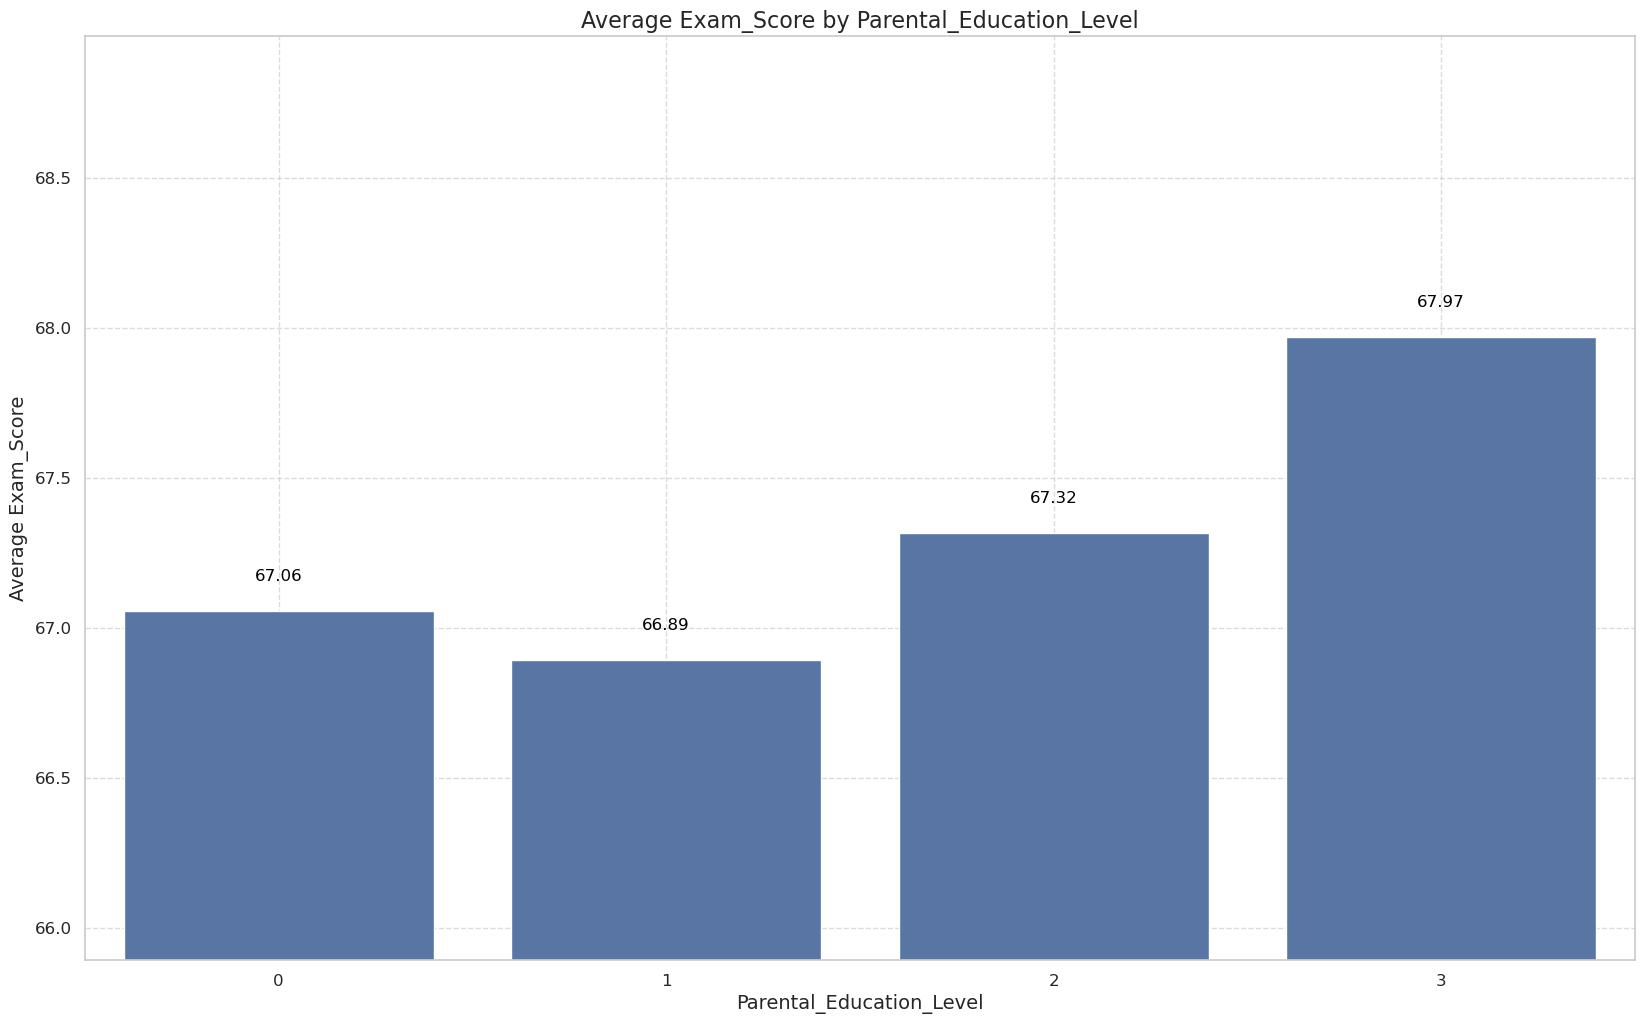

Average Exam_Score by Peer_Influence:
   Peer_Influence  Exam_Score
0              -1   66.564270
1               0   67.197917
2               1   67.623199
ANOVA test result for Exam_Score by Peer_Influence: F-statistic = 34.05207650712709, p-value = 1.9368909270985136e-15


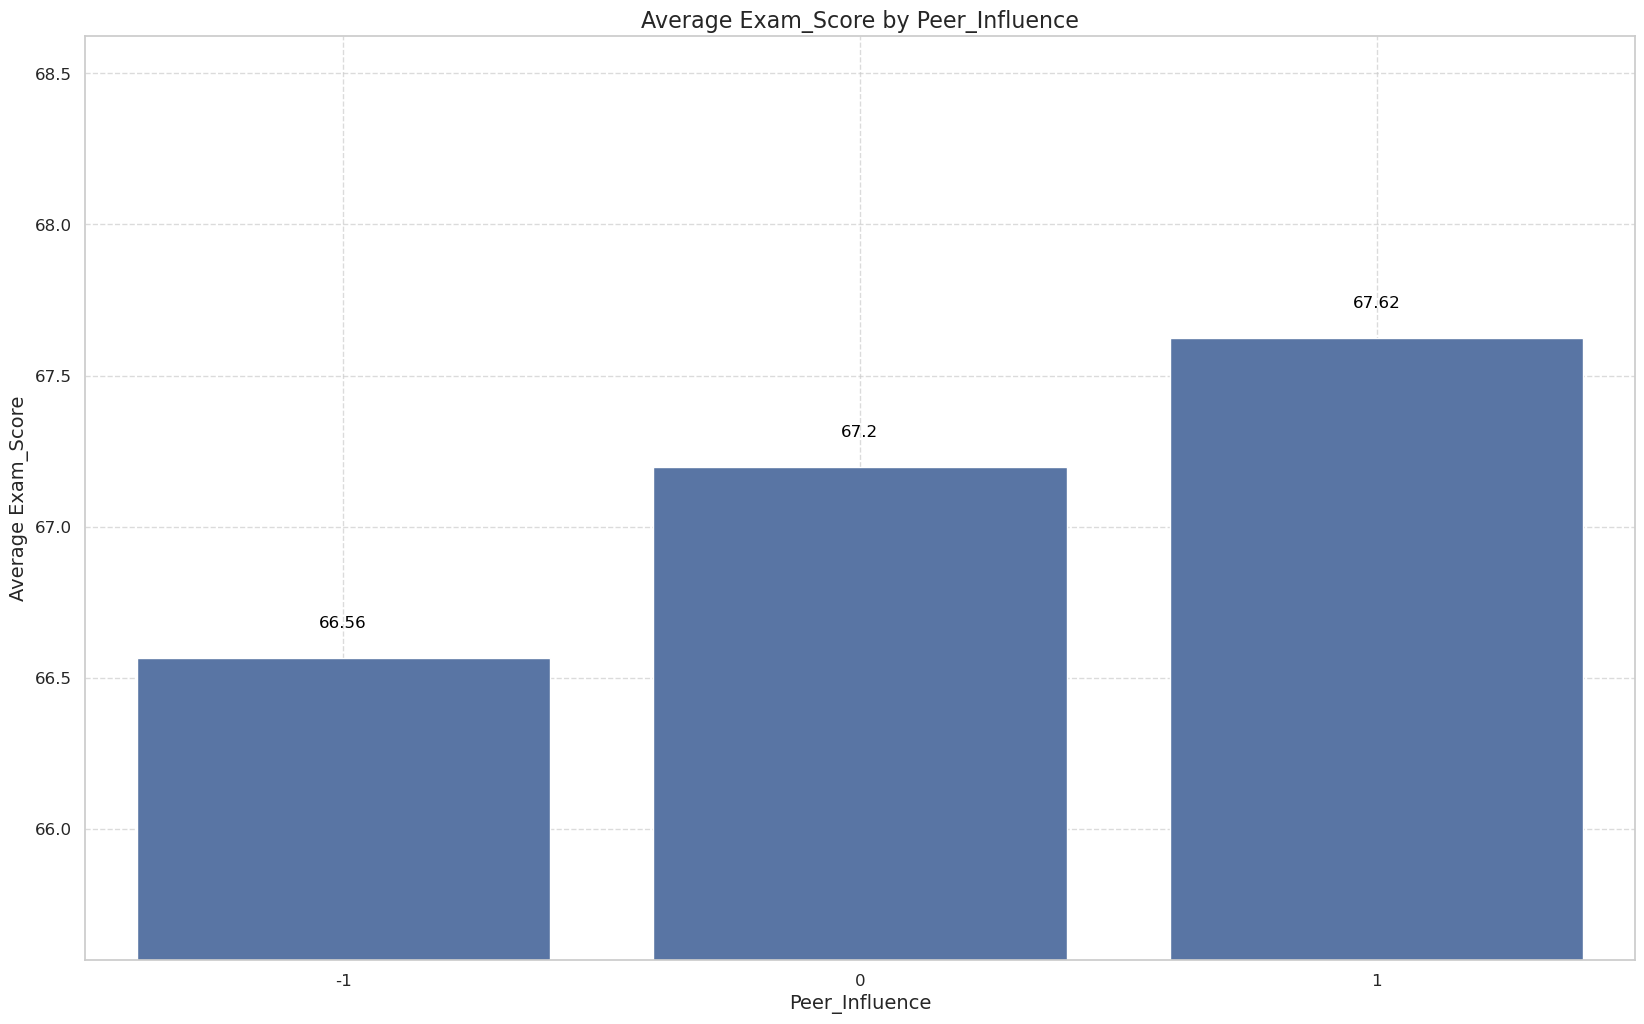

Average Exam_Score by Family_Income:
   Family_Income  Exam_Score
0              1   66.848428
1              2   67.334959
2              3   67.842396
ANOVA test result for Exam_Score by Family_Income: F-statistic = 29.79386131613895, p-value = 1.3143686049770217e-13


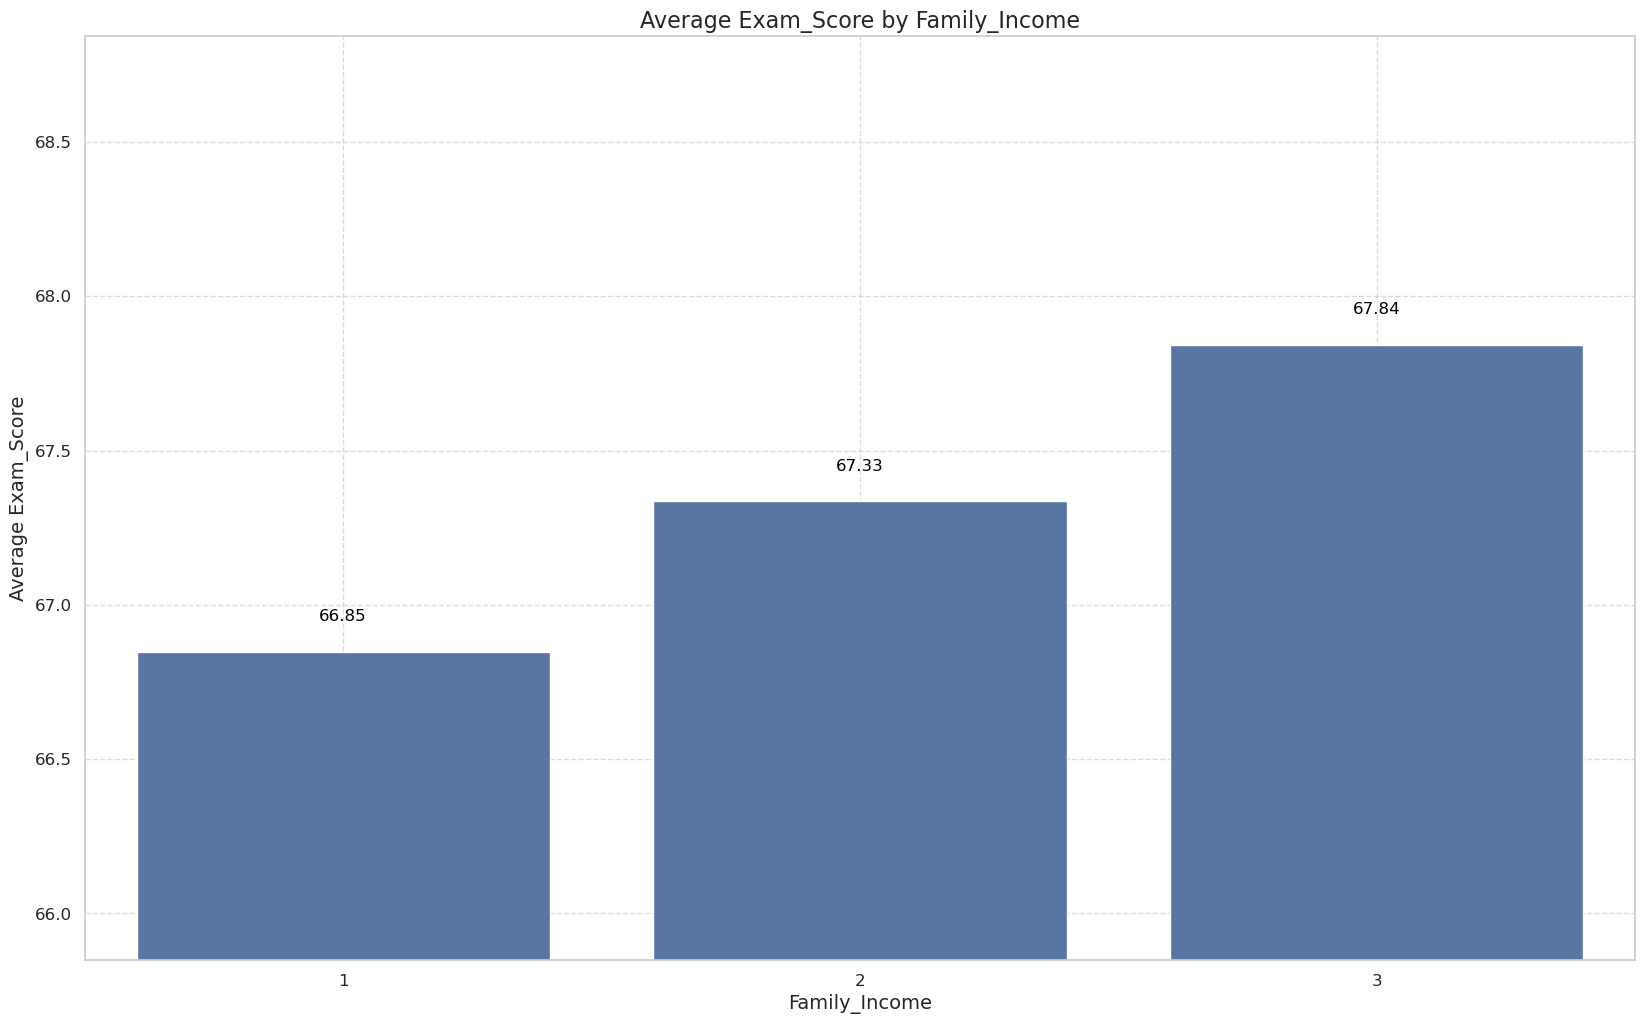

Average Exam_Score by Distance_from_Home:
   Distance_from_Home  Exam_Score
0                 1.0   66.457447
1                 2.0   66.981481
2                 3.0   67.512101
ANOVA test result for Exam_Score by Distance_from_Home: F-statistic = nan, p-value = nan


/tmp/ipykernel_233097/1421296340.py:22: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*category_groups)


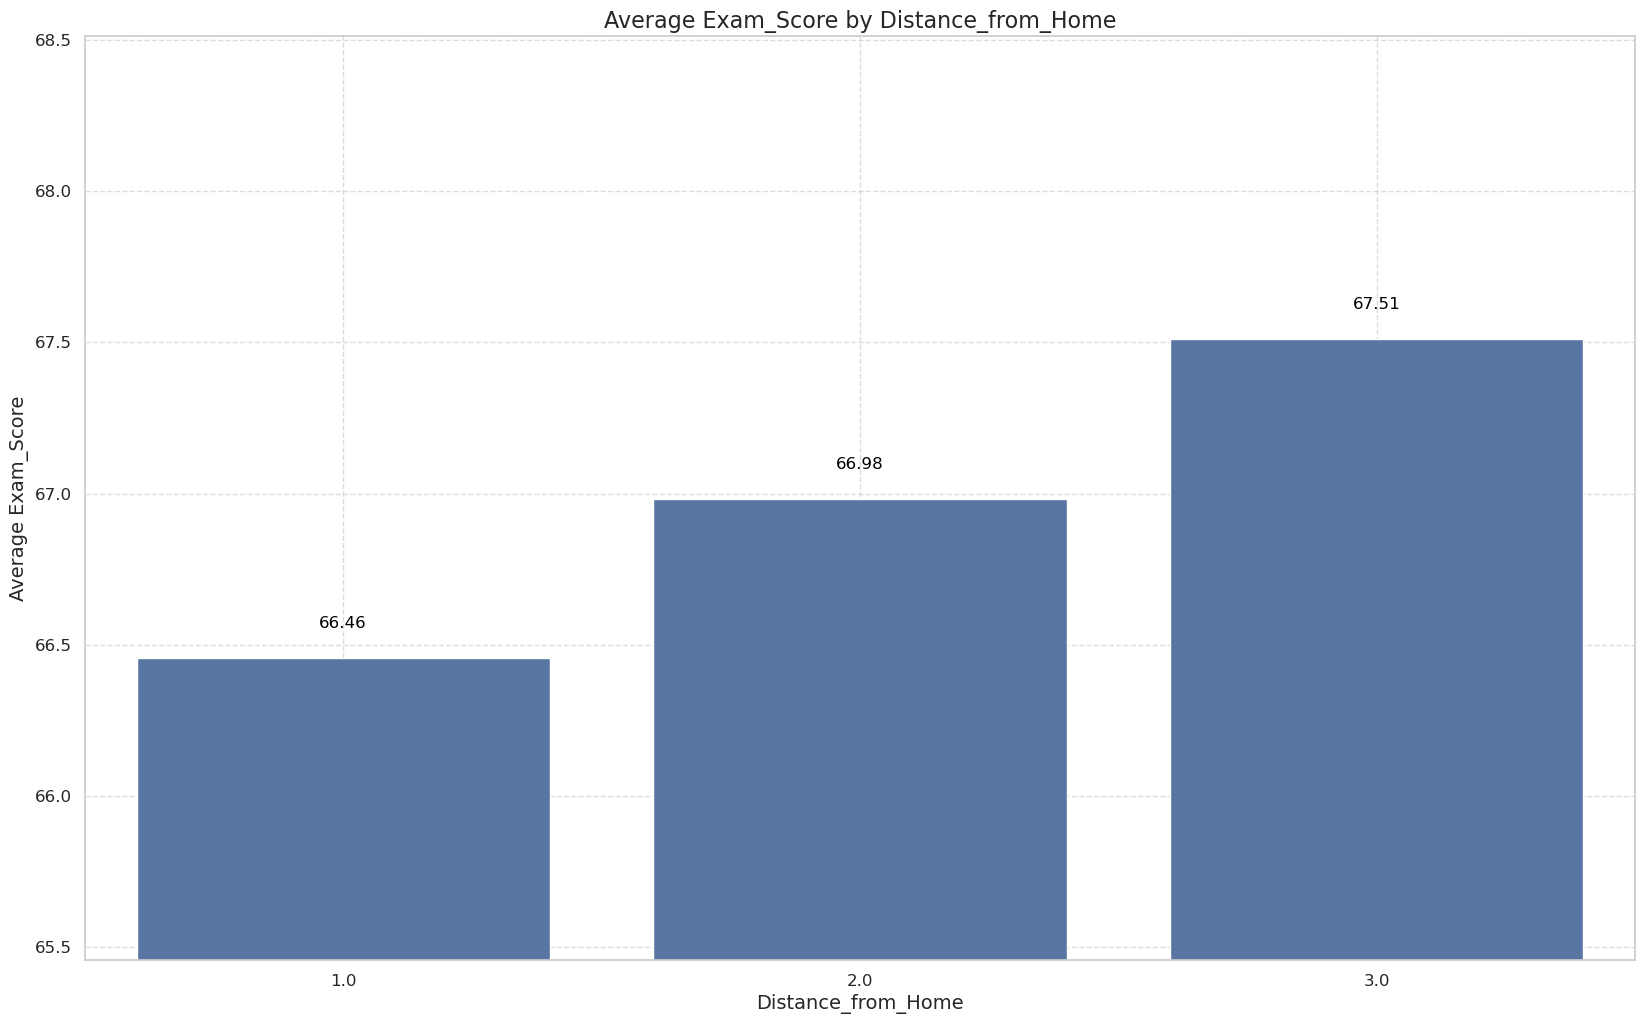

Average Exam_Score by Motivation_Level:
   Motivation_Level  Exam_Score
0                 1   66.752194
1                 2   67.330648
2                 3   67.704321
ANOVA test result for Exam_Score by Motivation_Level: F-statistic = 25.716769950376058, p-value = 7.492319380241663e-12


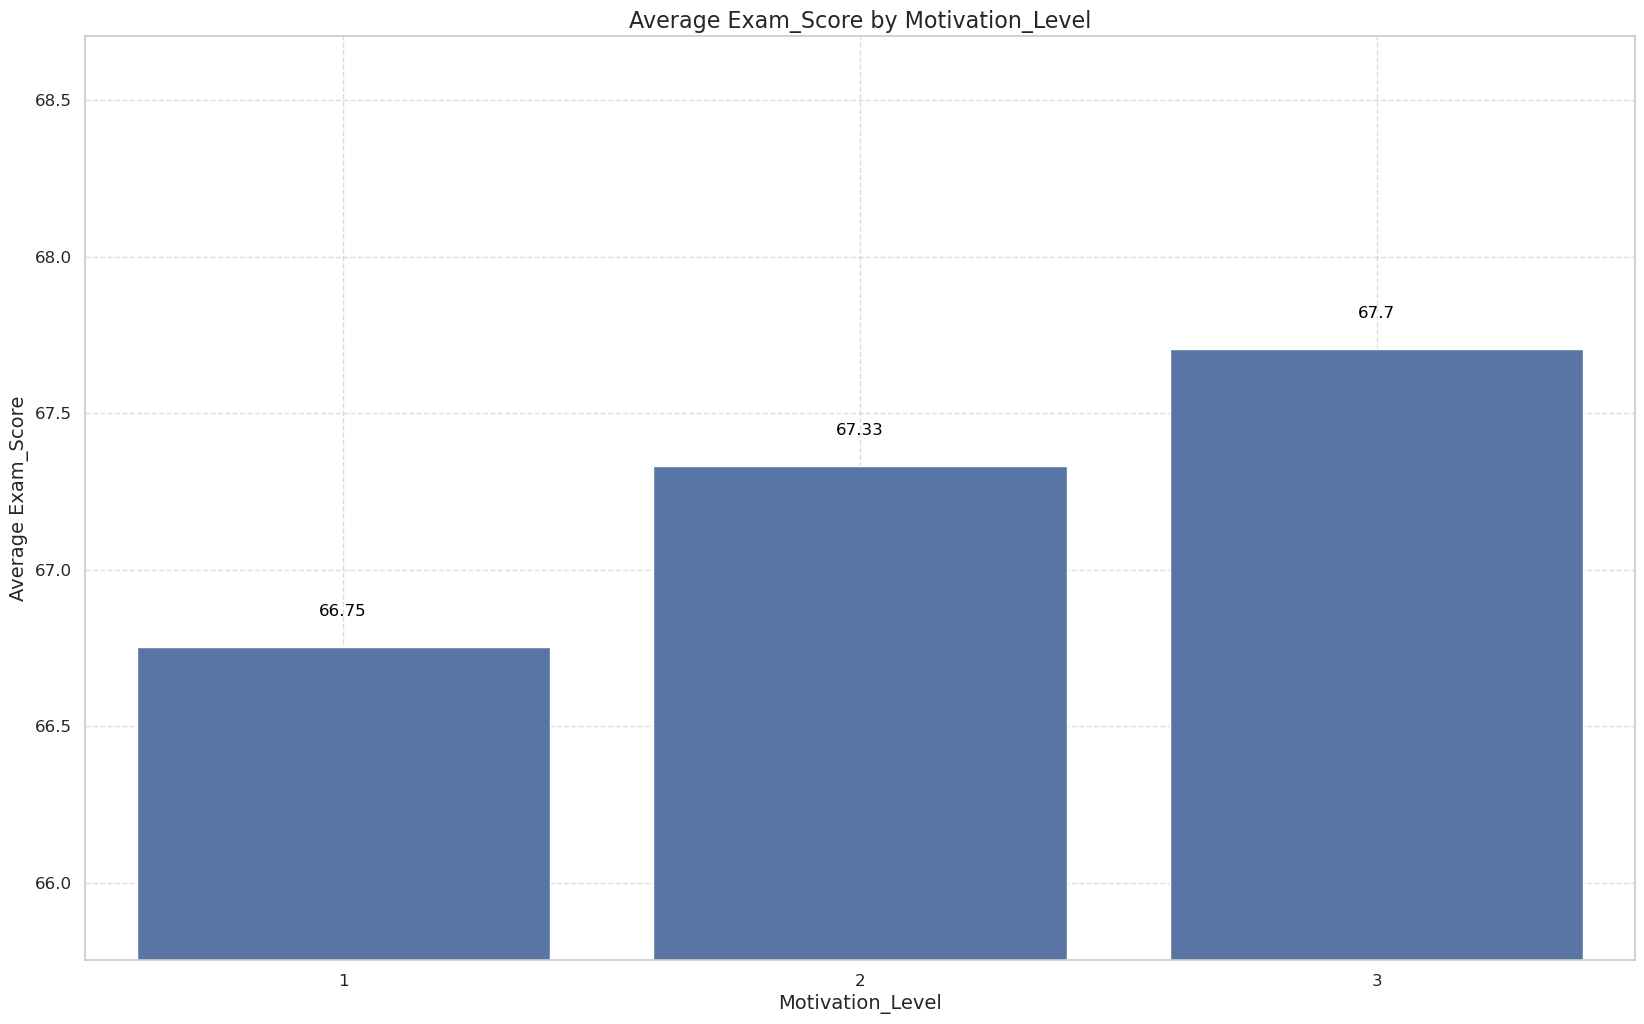

Average Exam_Score by Teacher_Quality:
   Teacher_Quality  Exam_Score
0              1.0   66.753425
1              2.0   67.109299
2              3.0   67.676939
ANOVA test result for Exam_Score by Teacher_Quality: F-statistic = nan, p-value = nan


/tmp/ipykernel_233097/1421296340.py:22: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*category_groups)


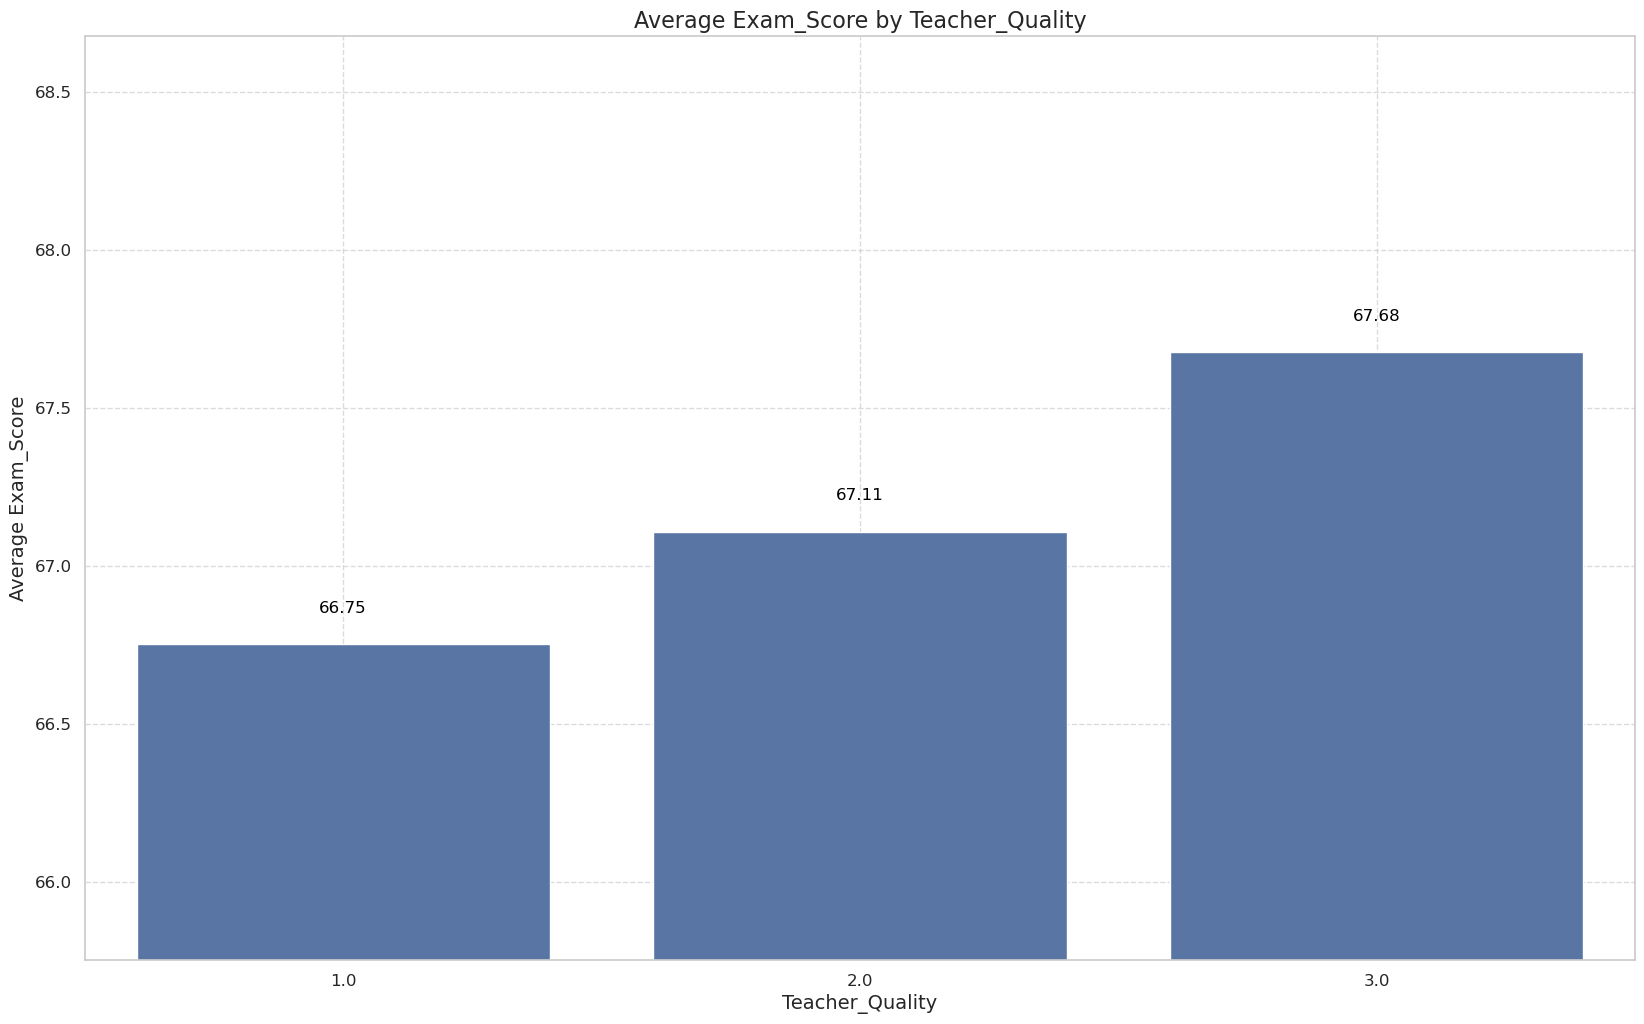

Average Exam_Score by Extracurricular_Activities:
   Extracurricular_Activities  Exam_Score
0                           0   66.931435
1                           1   67.441849
ANOVA test result for Exam_Score by Extracurricular_Activities: F-statistic = 27.491708806263357, p-value = 1.626677707731656e-07


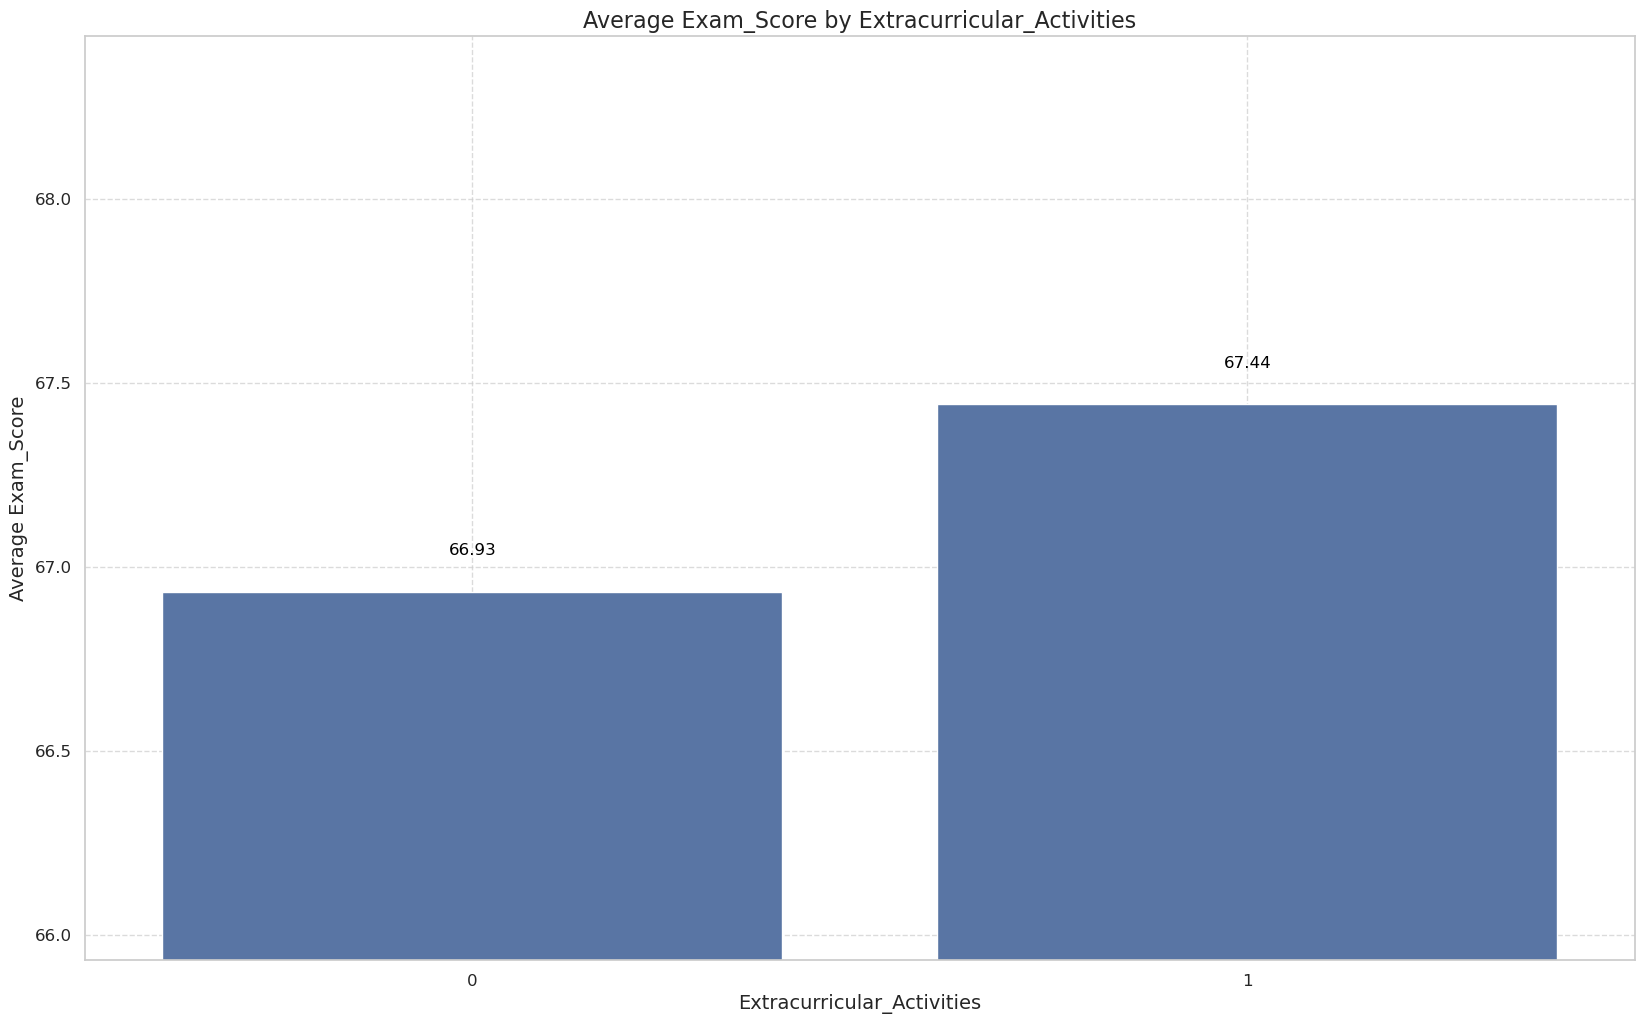

Average Exam_Score by Internet_Access:
   Internet_Access  Exam_Score
0                0   66.535070
1                1   67.292895
ANOVA test result for Exam_Score by Internet_Access: F-statistic = 17.547611736951104, p-value = 2.8385046310284837e-05


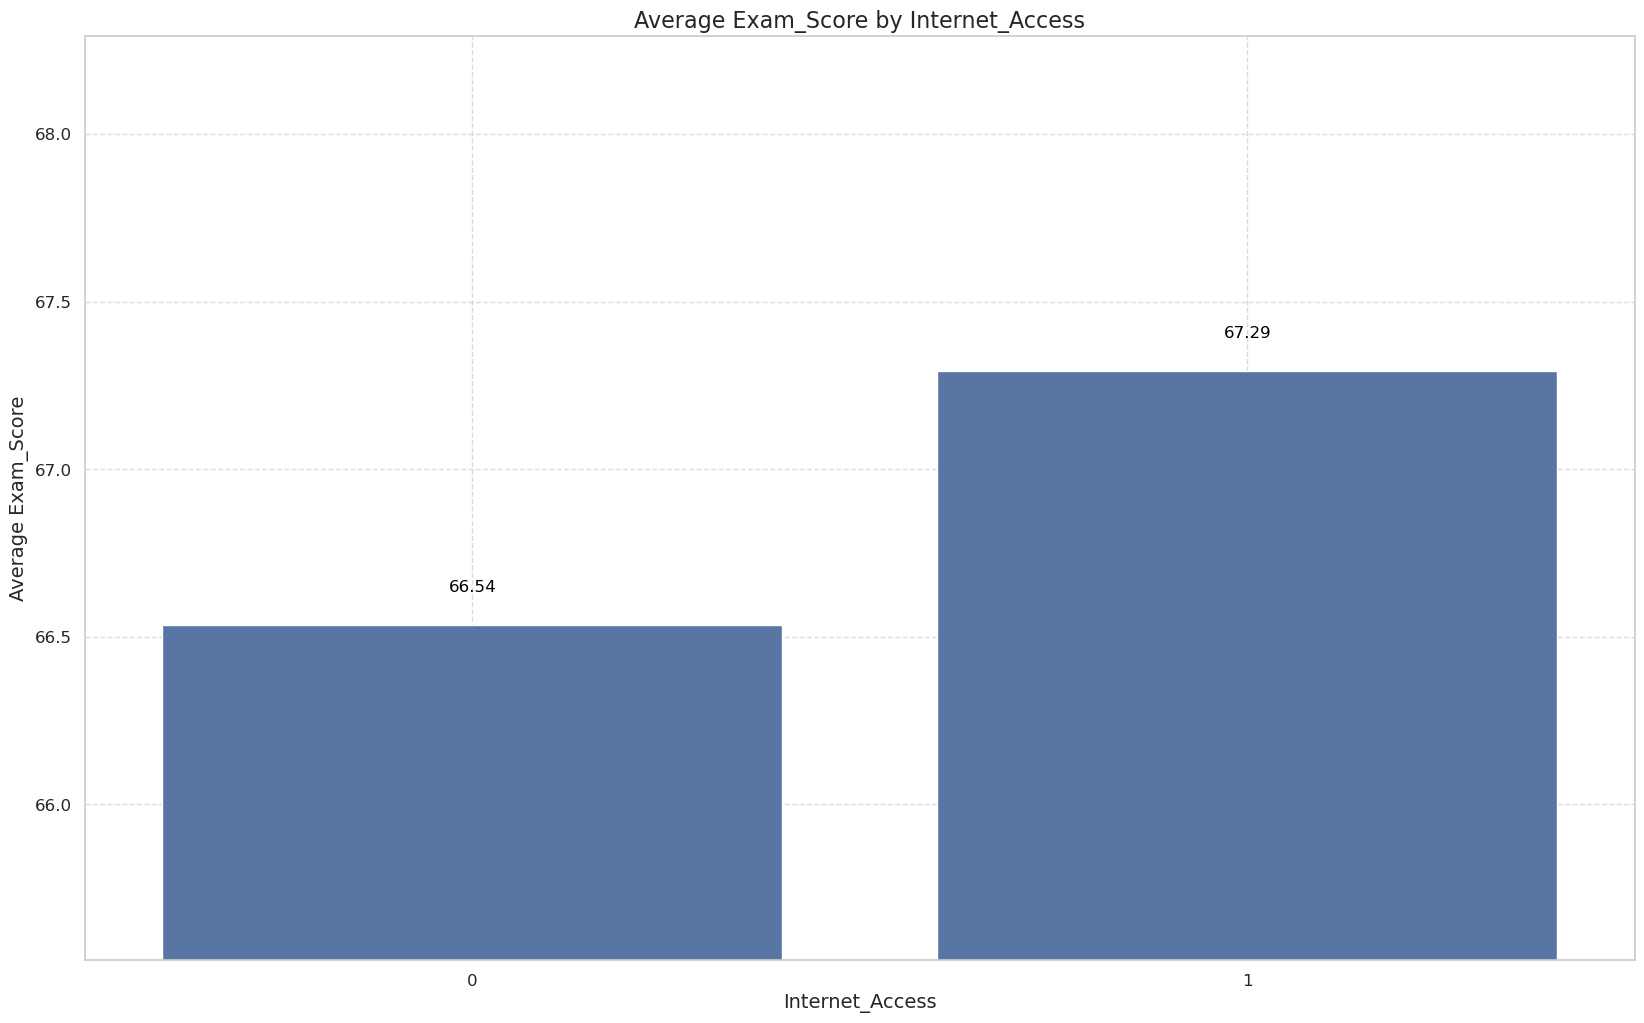

Average Exam_Score by Physical_Activity:
   Physical_Activity  Exam_Score
0                  0   67.521739
1                  1   66.969121
2                  2   67.185003
3                  3   67.196071
4                  4   67.313016
5                  5   67.603878
6                  6   68.093750
ANOVA test result for Exam_Score by Physical_Activity: F-statistic = 1.3633537308841124, p-value = 0.22538316355175445


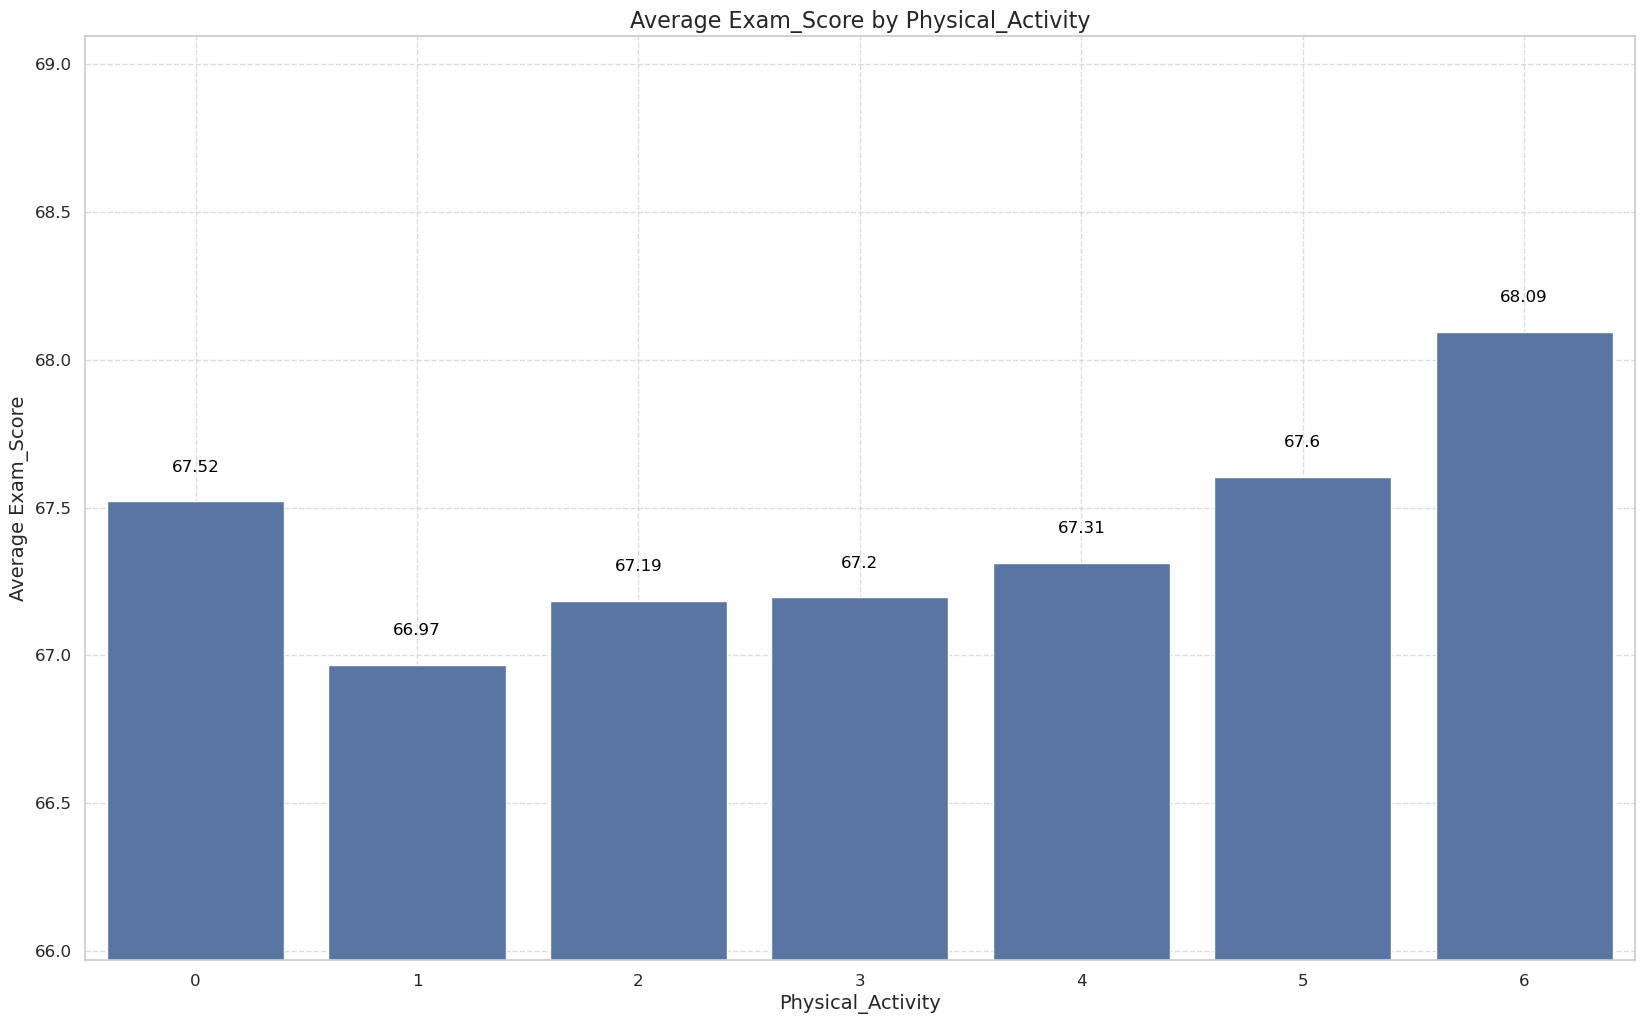

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Assuming data is your DataFrame

# Set Seaborn style
sns.set(style="whitegrid")


for category_col, value_col in top_pairs:
    category_col, value_col = value_col, category_col

    # Group by category_col and calculate the mean of value_col
    average_scores = data.groupby(category_col)[value_col].mean().reset_index()
    print(f"Average {value_col} by {category_col}:")
    print(average_scores)

    # Perform ANOVA test
    category_groups = [data[data[category_col] == category][value_col] for category in data[category_col].unique()]
    anova_result = f_oneway(*category_groups)
    print(f"ANOVA test result for {value_col} by {category_col}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

    # Create a bar plot for average value_col by category_col
    plt.figure(figsize=np.array((10, 6)) * 2)
    bar_plot = sns.barplot(data=average_scores, x=category_col, y=value_col)

    # Add data labels
    for index, row in average_scores.iterrows():
        bar_plot.text(row.name, row[value_col] + 0.1, round(row[value_col], 2), color='black', ha="center")

    # Adjust y-axis limits to zoom in on the range of interest
    plt.ylim(average_scores[value_col].min() - 1, average_scores[value_col].max() + 1)

    plt.title(f'Average {value_col} by {category_col}', fontsize=16)
    plt.xlabel(category_col, fontsize=14)
    plt.ylabel(f'Average {value_col}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Average Exam_Score by Attendance:
    Attendance  Exam_Score
0           60   62.413793
1           61   63.384146
2           62   63.756579
3           63   64.361290
4           64   63.884615
5           65   63.905063
6           66   64.537931
7           67   64.626316
8           68   65.147059
9           69   65.123529
10          70   65.527950
11          71   65.611111
12          72   65.694611
13          73   65.952381
14          74   66.272727
15          75   66.288591
16          76   66.886486
17          77   66.668478
18          78   66.890909
19          79   66.828571
20          80   67.088757
21          81   67.232143
22          82   67.341040
23          83   67.968153
24          84   67.742857
25          85   67.883562
26          86   68.655629
27          87   68.741722
28          88   68.909677
29          89   69.104938
30          90   70.012821
31          91   69.417143
32          92   69.727273
33          93   69.820359
34          94   69.5

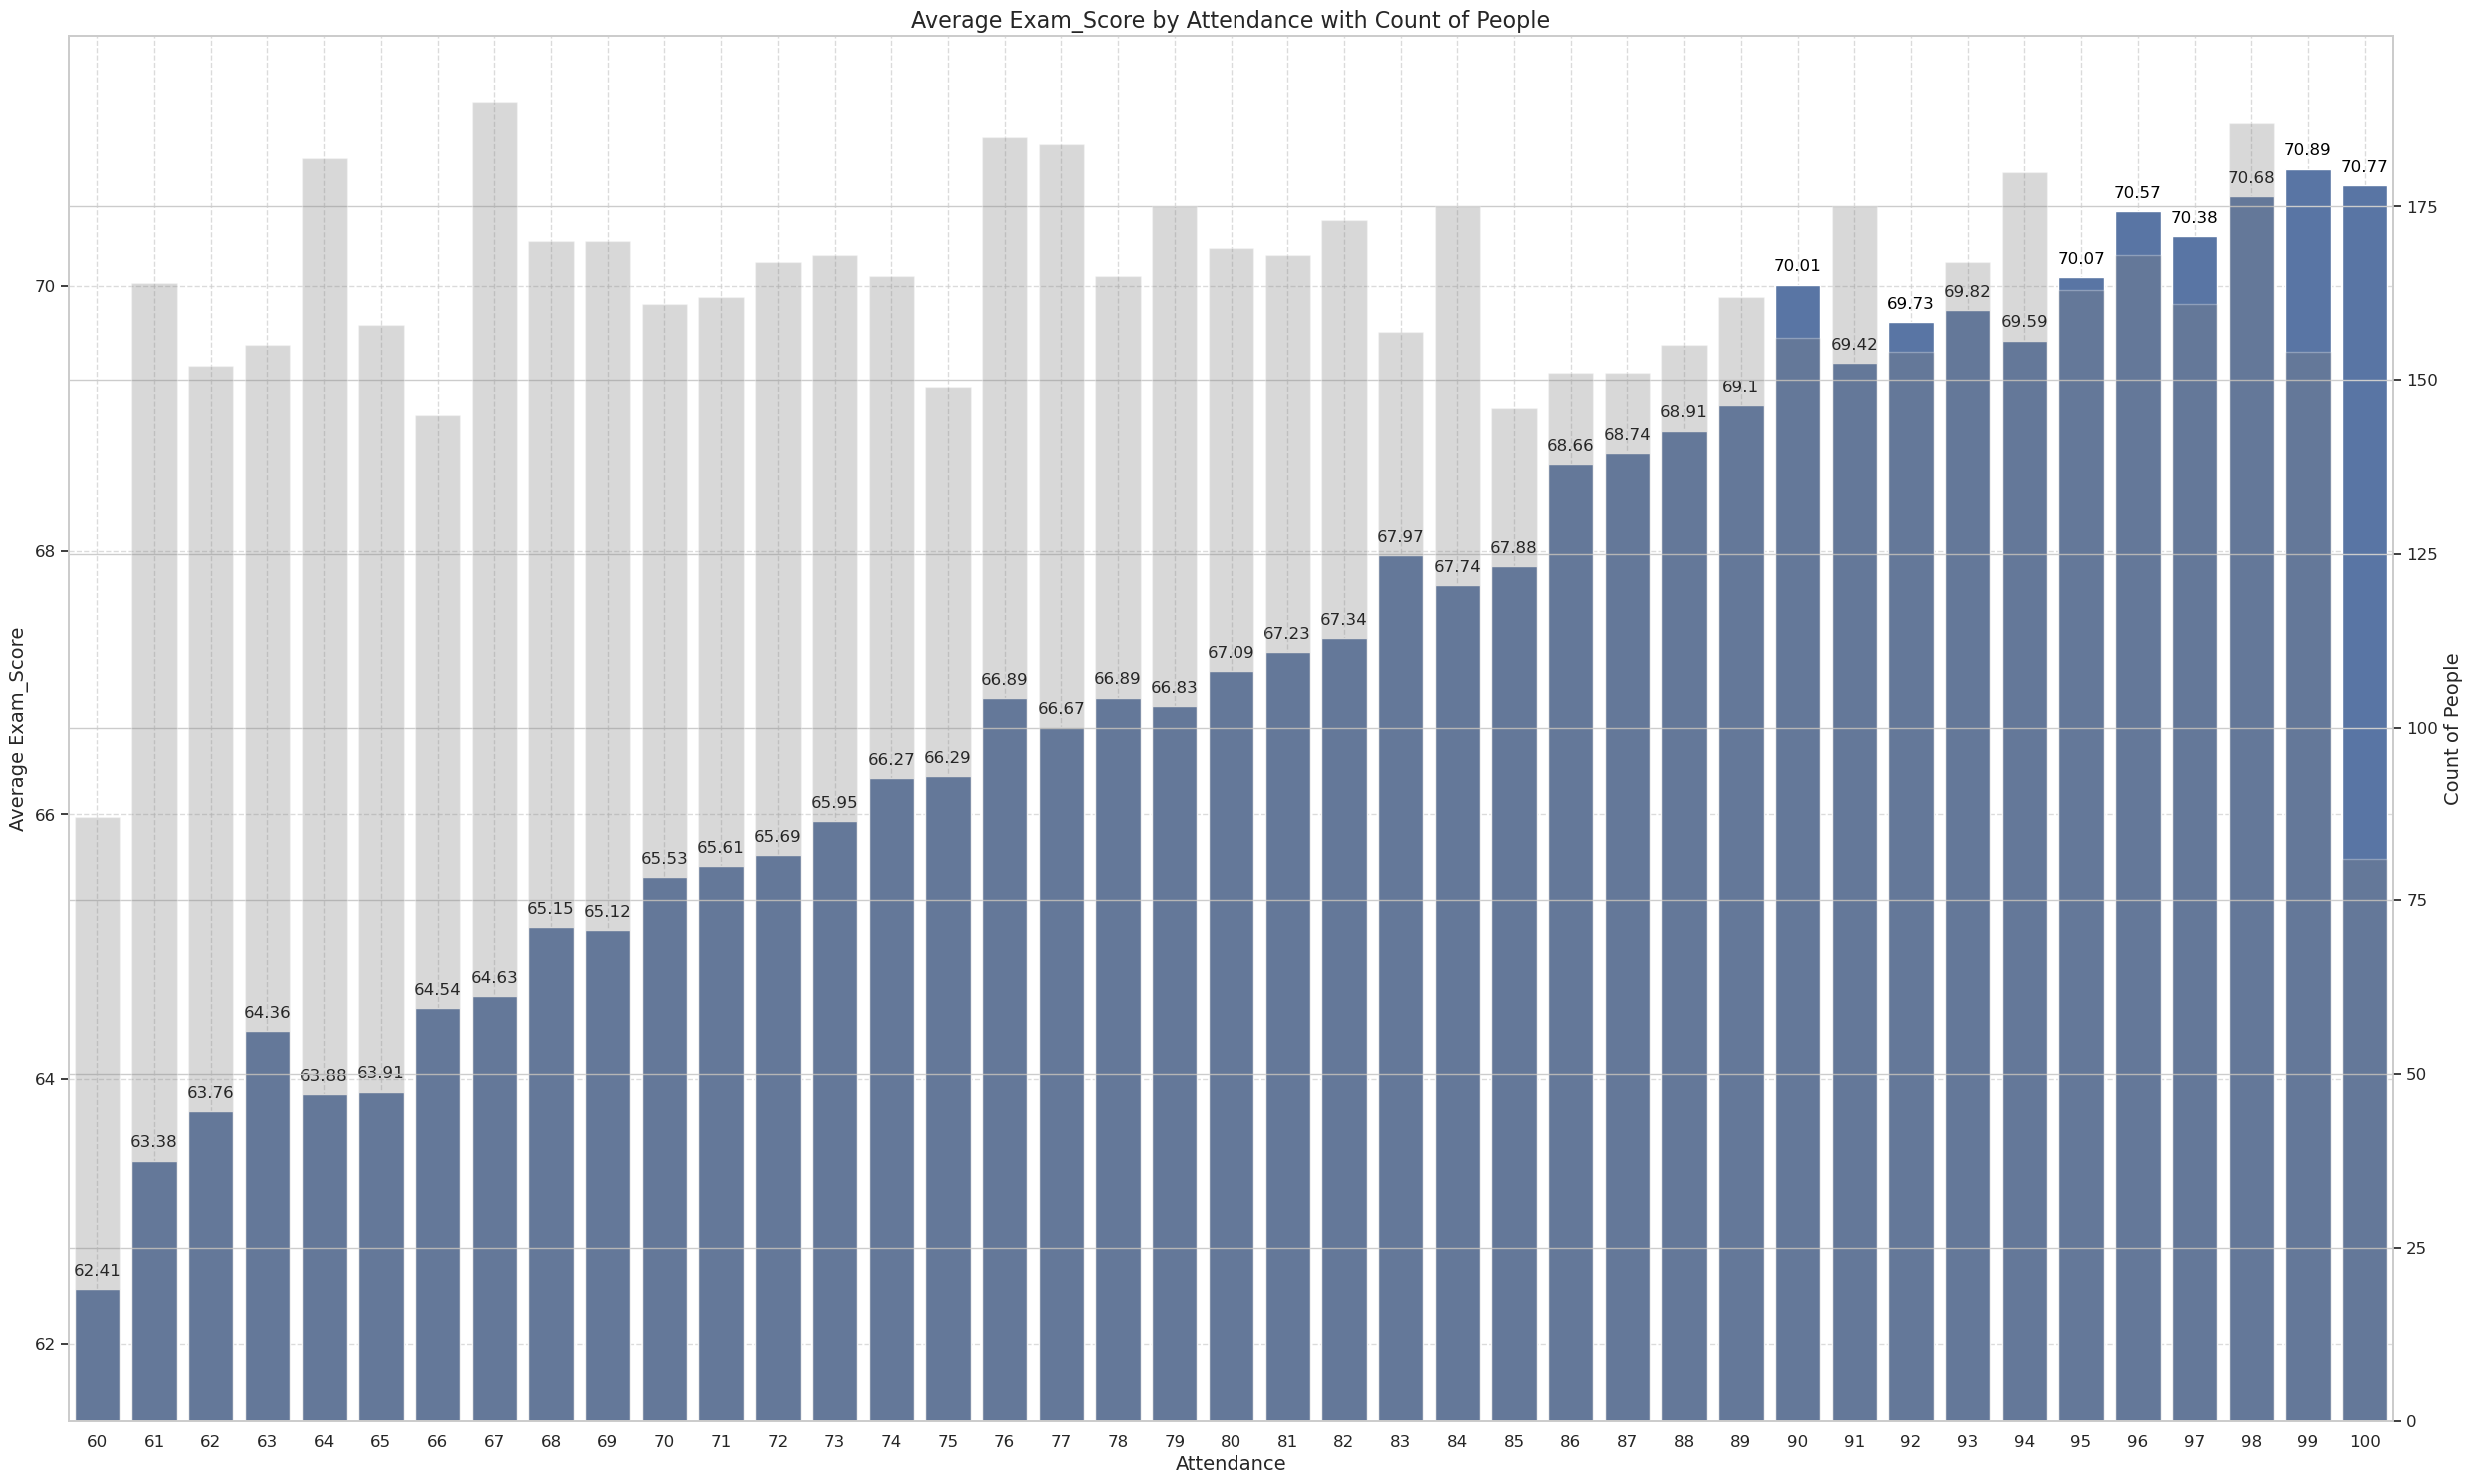

Average Exam_Score by Hours_Studied:
    Hours_Studied  Exam_Score
0               1   71.000000
1               2   63.000000
2               3   61.333333
3               4   61.647059
4               5   62.857143
5               6   63.470588
6               7   64.352941
7               8   64.155172
8               9   64.162791
9              10   64.393617
10             11   64.979452
11             12   64.765625
12             13   64.724771
13             14   65.576208
14             15   65.590476
15             16   66.182336
16             17   66.328084
17             18   67.042394
18             19   66.959184
19             20   66.950538
20             21   67.682135
21             22   67.480100
22             23   68.180049
23             24   68.187675
24             25   68.847751
25             26   68.665399
26             27   69.462882
27             28   69.608187
28             29   70.283582
29             30   70.617886
30             31   70.688312
31 

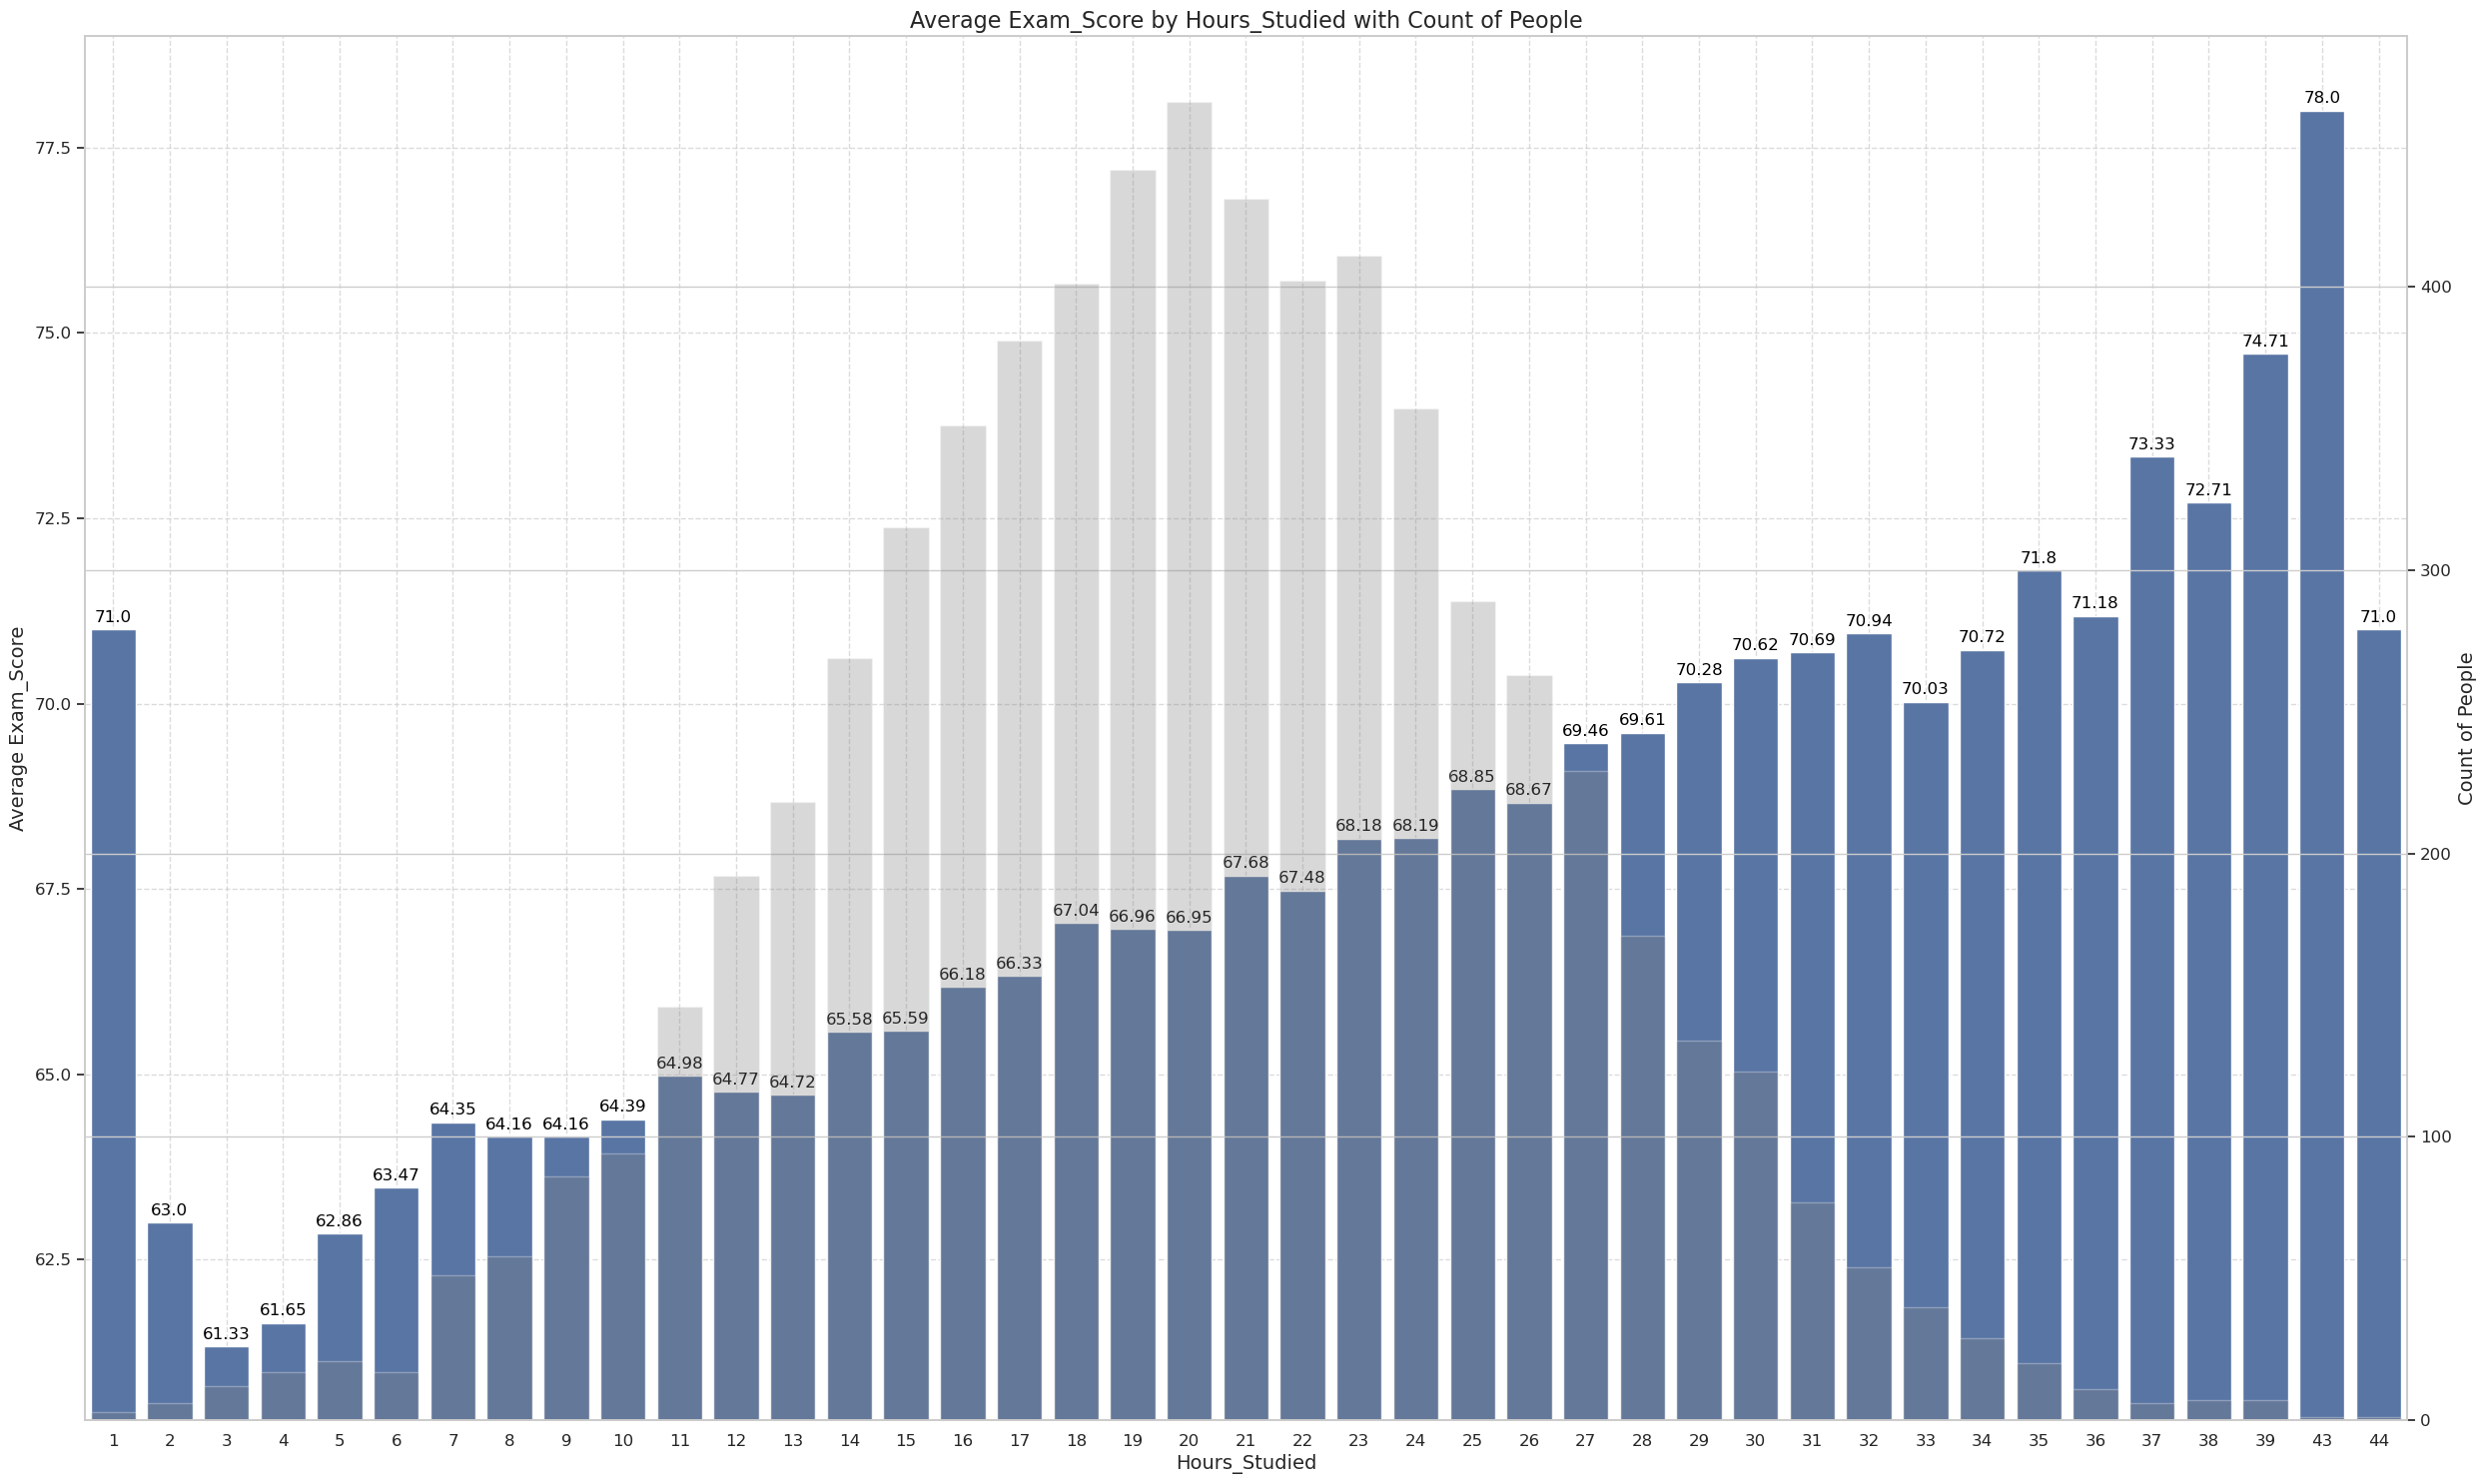

Average Exam_Score by Previous_Scores:
    Previous_Scores  Exam_Score
0                50   65.516129
1                51   65.912698
2                52   66.875000
3                53   66.270833
4                54   66.220588
5                55   66.096774
6                56   66.416667
7                57   66.872000
8                58   66.641667
9                59   66.626761
10               60   66.719008
11               61   66.788618
12               62   66.387097
13               63   66.274074
14               64   66.469697
15               65   66.235294
16               66   66.945455
17               67   66.776119
18               68   66.924242
19               69   67.255814
20               70   66.867647
21               71   66.780822
22               72   67.150000
23               73   66.905797
24               74   66.925373
25               75   67.204545
26               76   67.957143
27               77   67.680328
28               78   67.084615
2

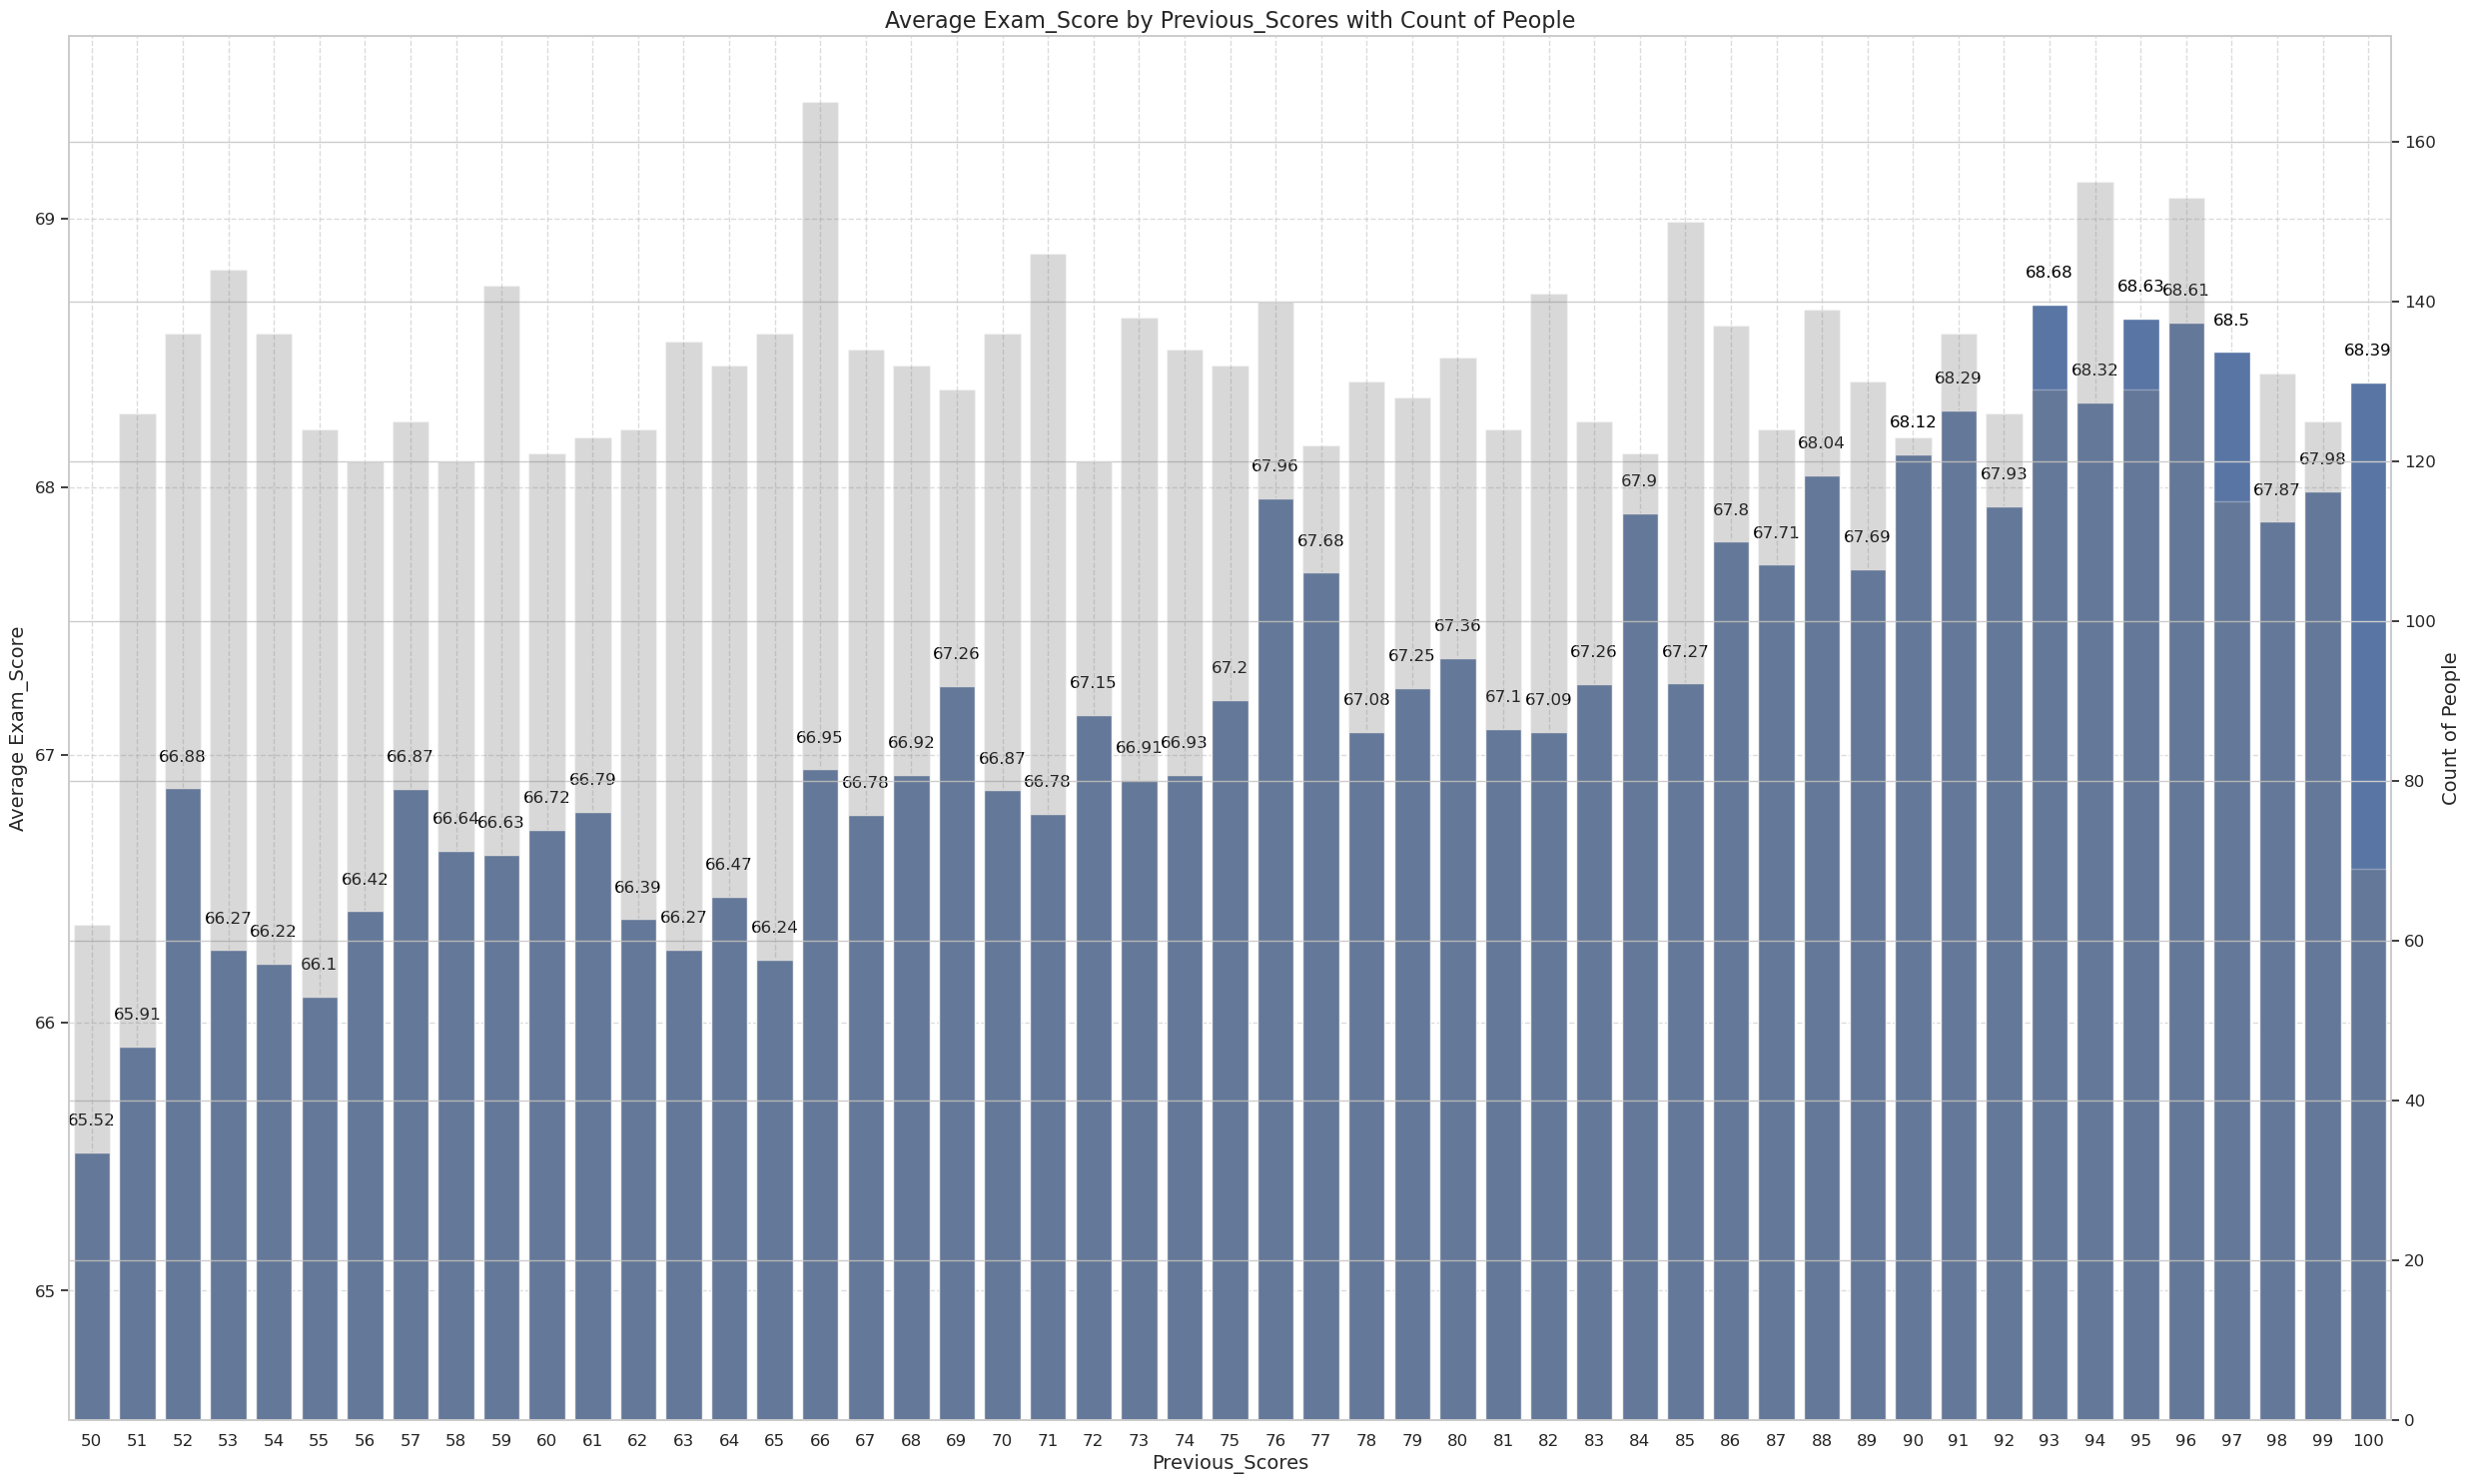

Average Exam_Score by Access_to_Resources:
   Access_to_Resources  Exam_Score
0                    1   66.203351
1                    2   67.134378
2                    3   68.092152
ANOVA test result for Exam_Score by Access_to_Resources: F-statistic = 98.00440911485991, p-value = 1.1392993838178868e-42


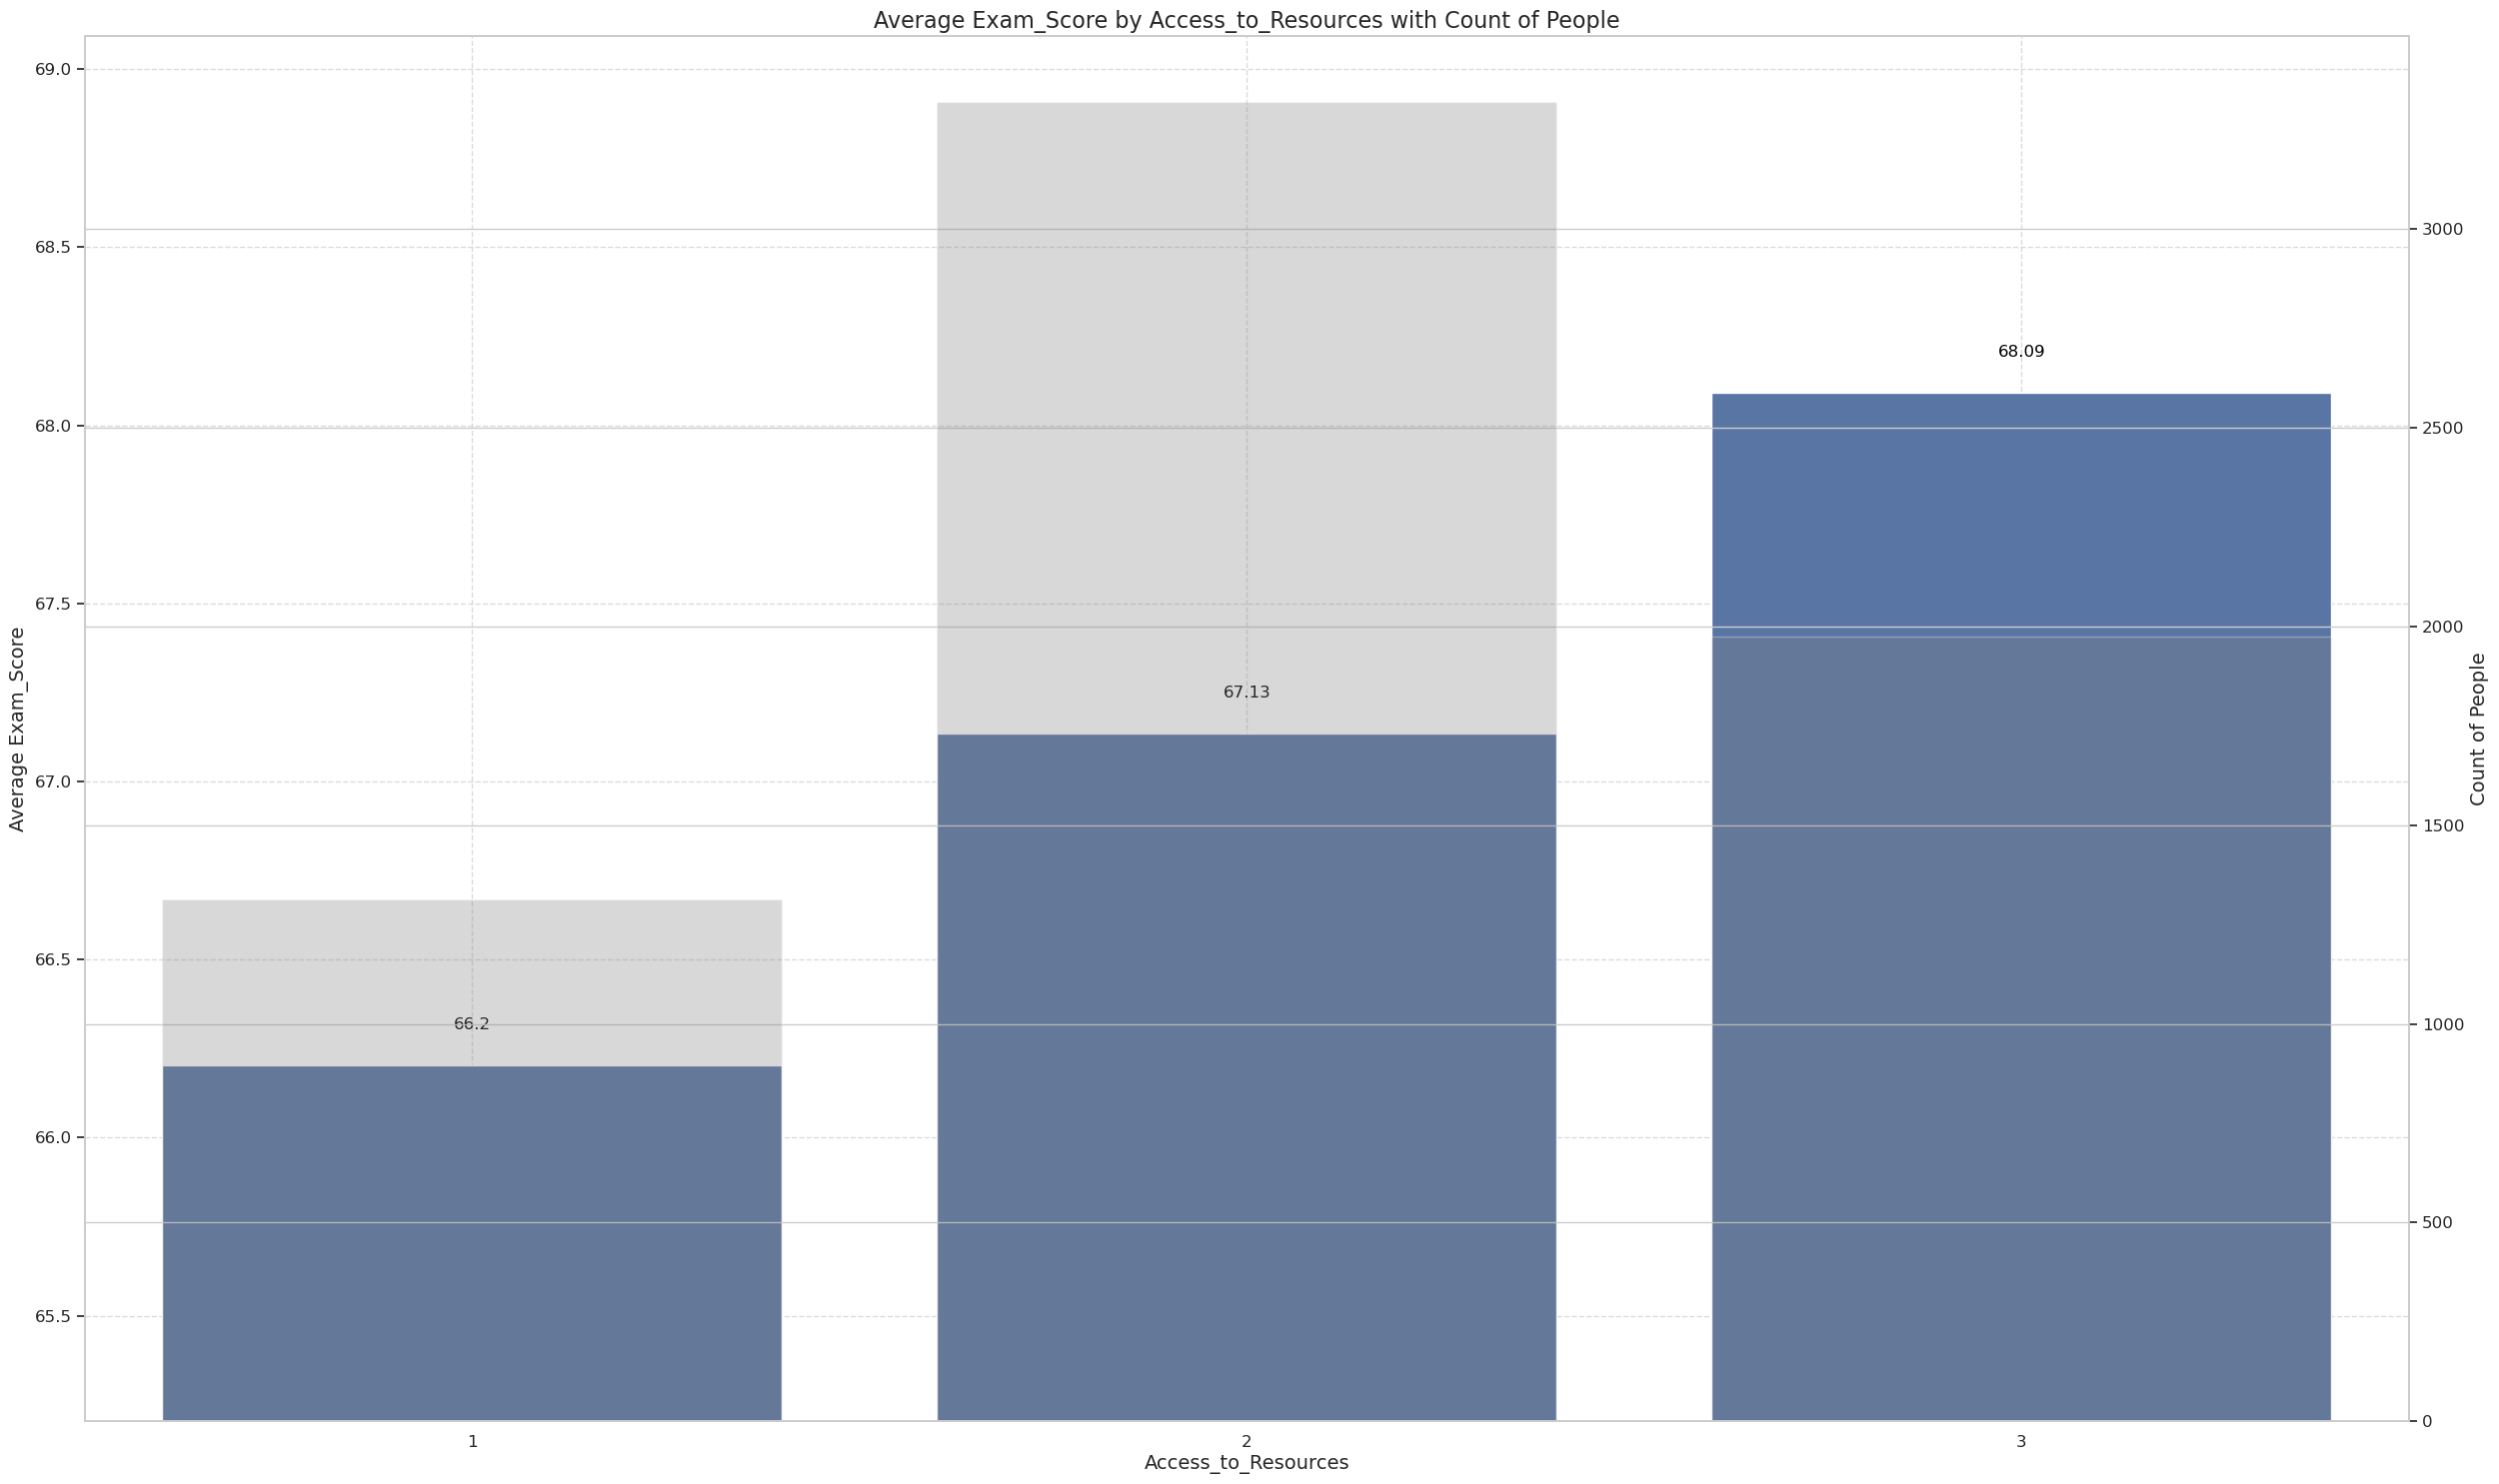

Average Exam_Score by Parental_Involvement:
   Parental_Involvement  Exam_Score
0                     1   66.358265
1                     2   67.098156
2                     3   68.092767
ANOVA test result for Exam_Score by Parental_Involvement: F-statistic = 84.48765484606227, p-value = 5.875479153325444e-37


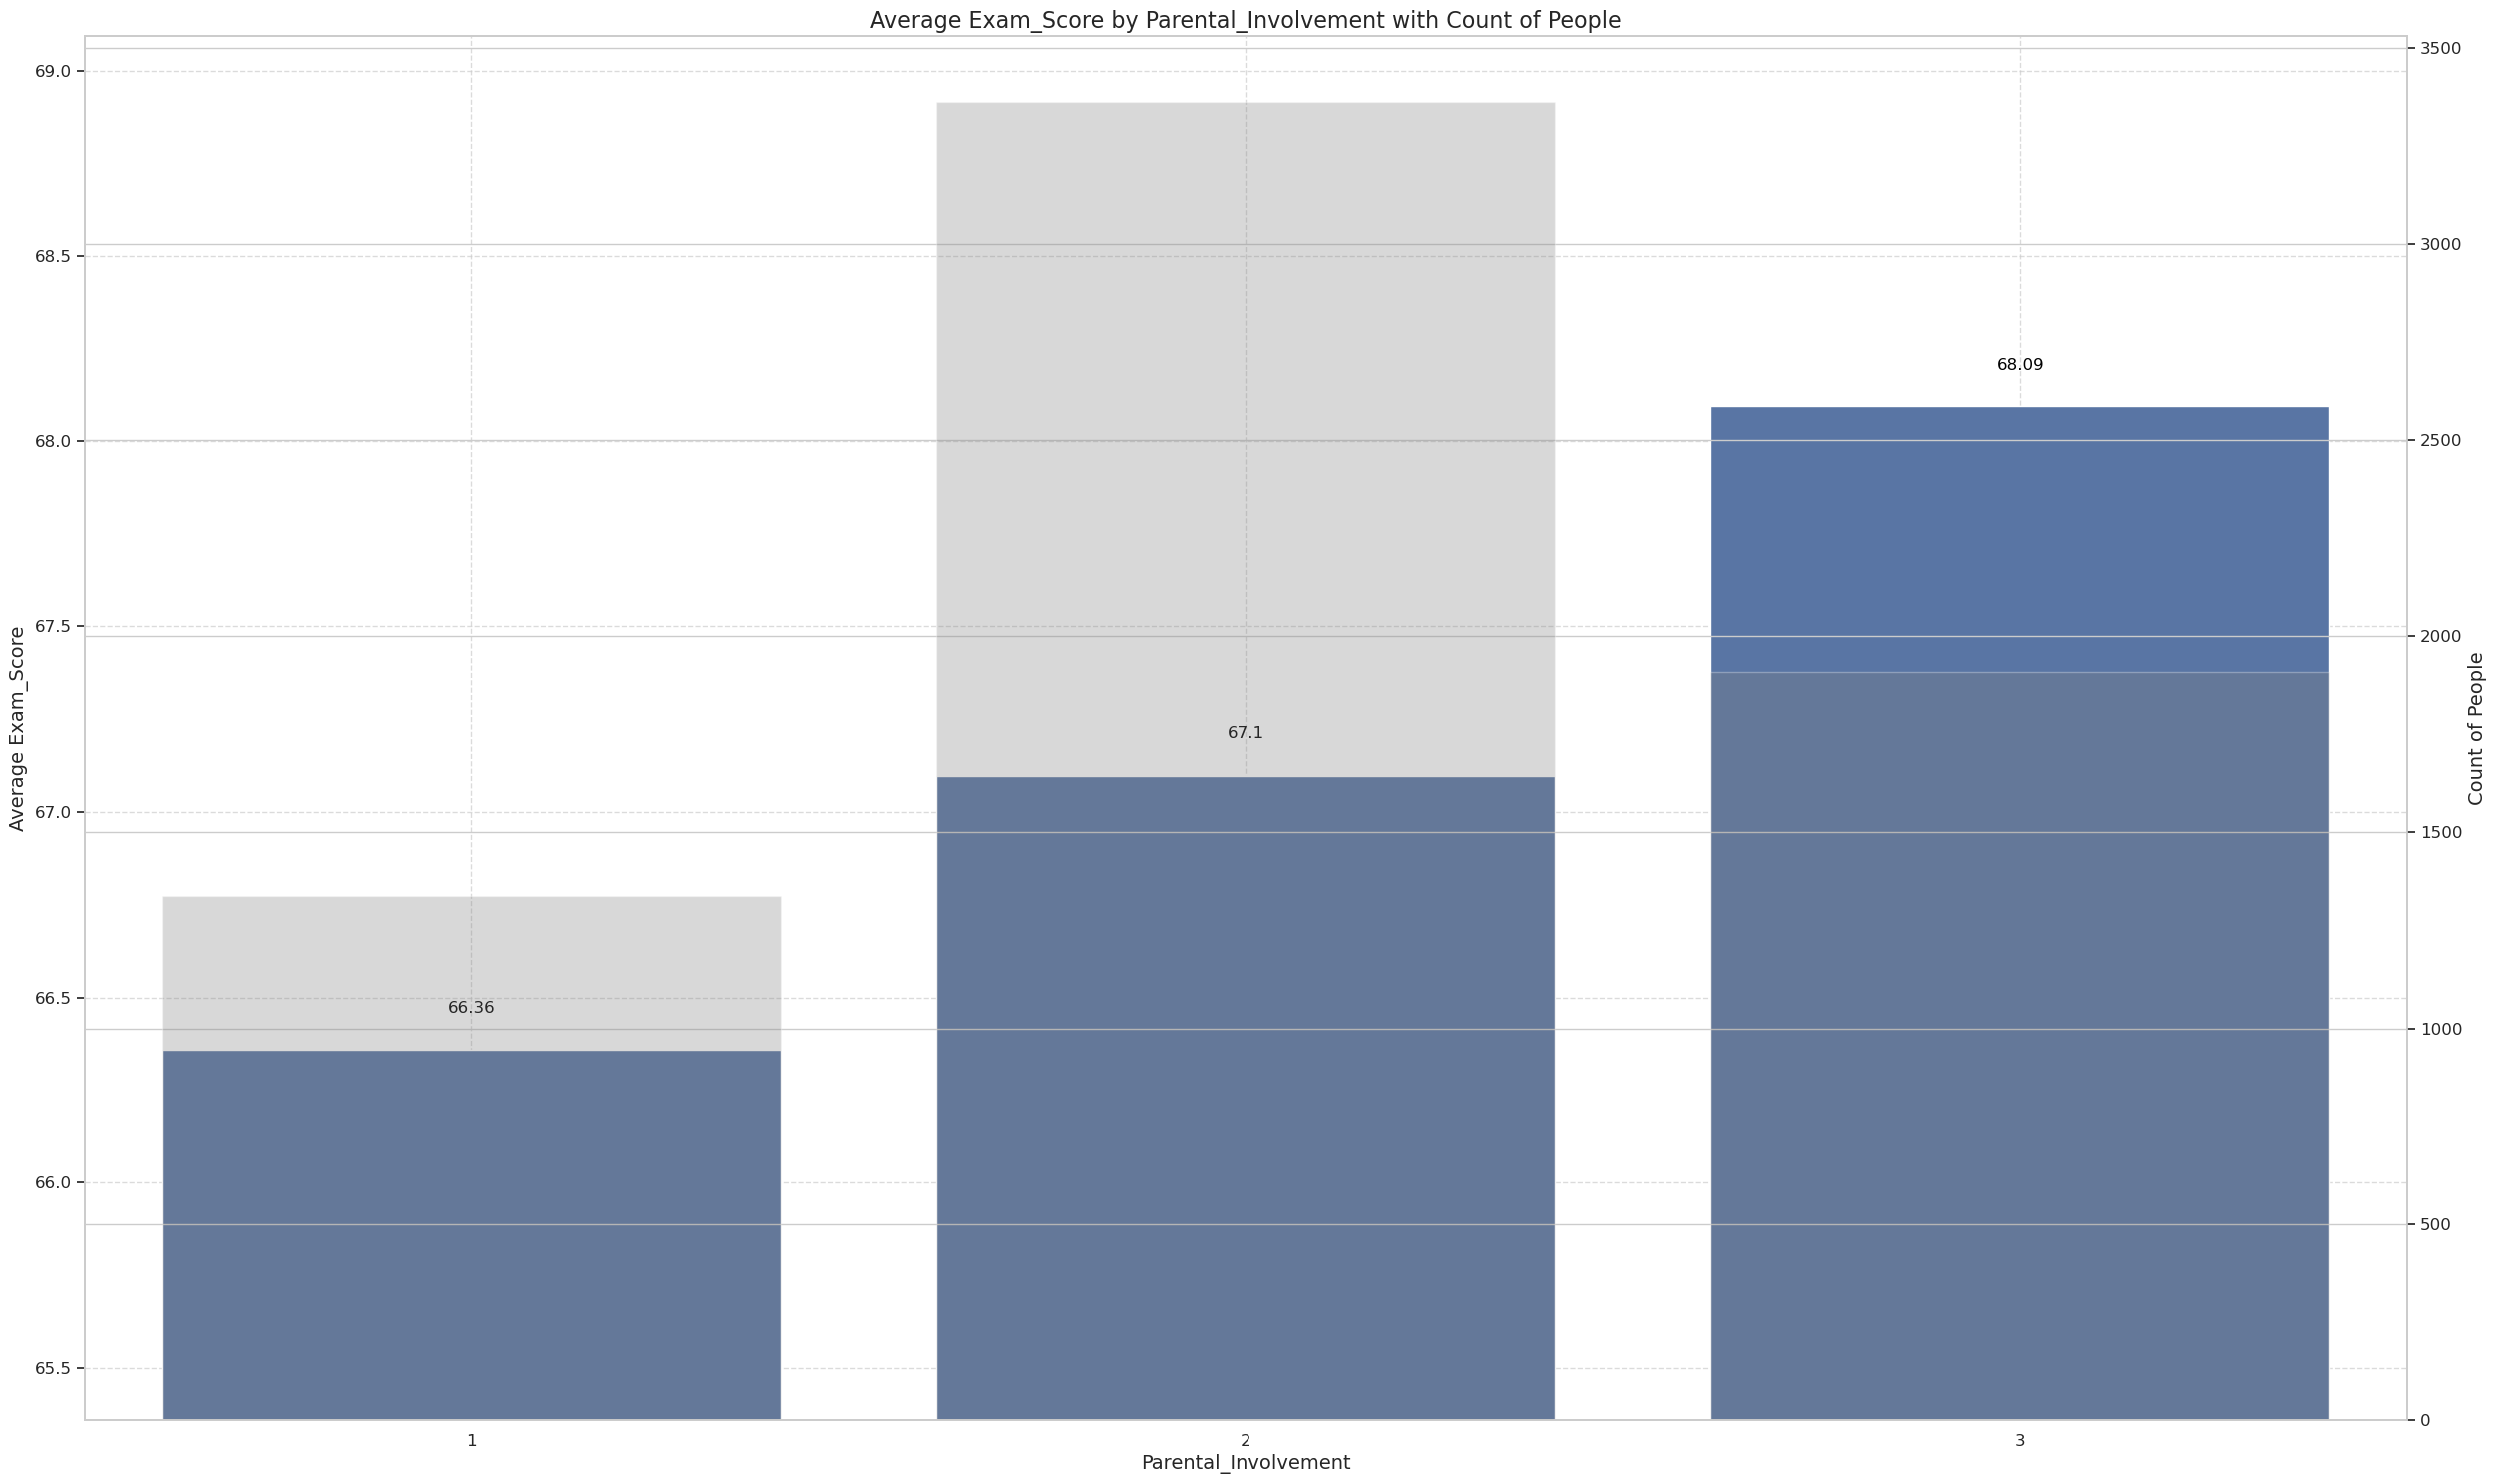

Average Exam_Score by Tutoring_Sessions:
   Tutoring_Sessions  Exam_Score
0                  0   66.489755
1                  1   66.980266
2                  2   67.567010
3                  3   67.894737
4                  4   68.229236
5                  5   69.067961
6                  6   71.666667
7                  7   69.857143
8                  8   69.000000
ANOVA test result for Exam_Score by Tutoring_Sessions: F-statistic = 21.80773640305527, p-value = 4.304698742165406e-33


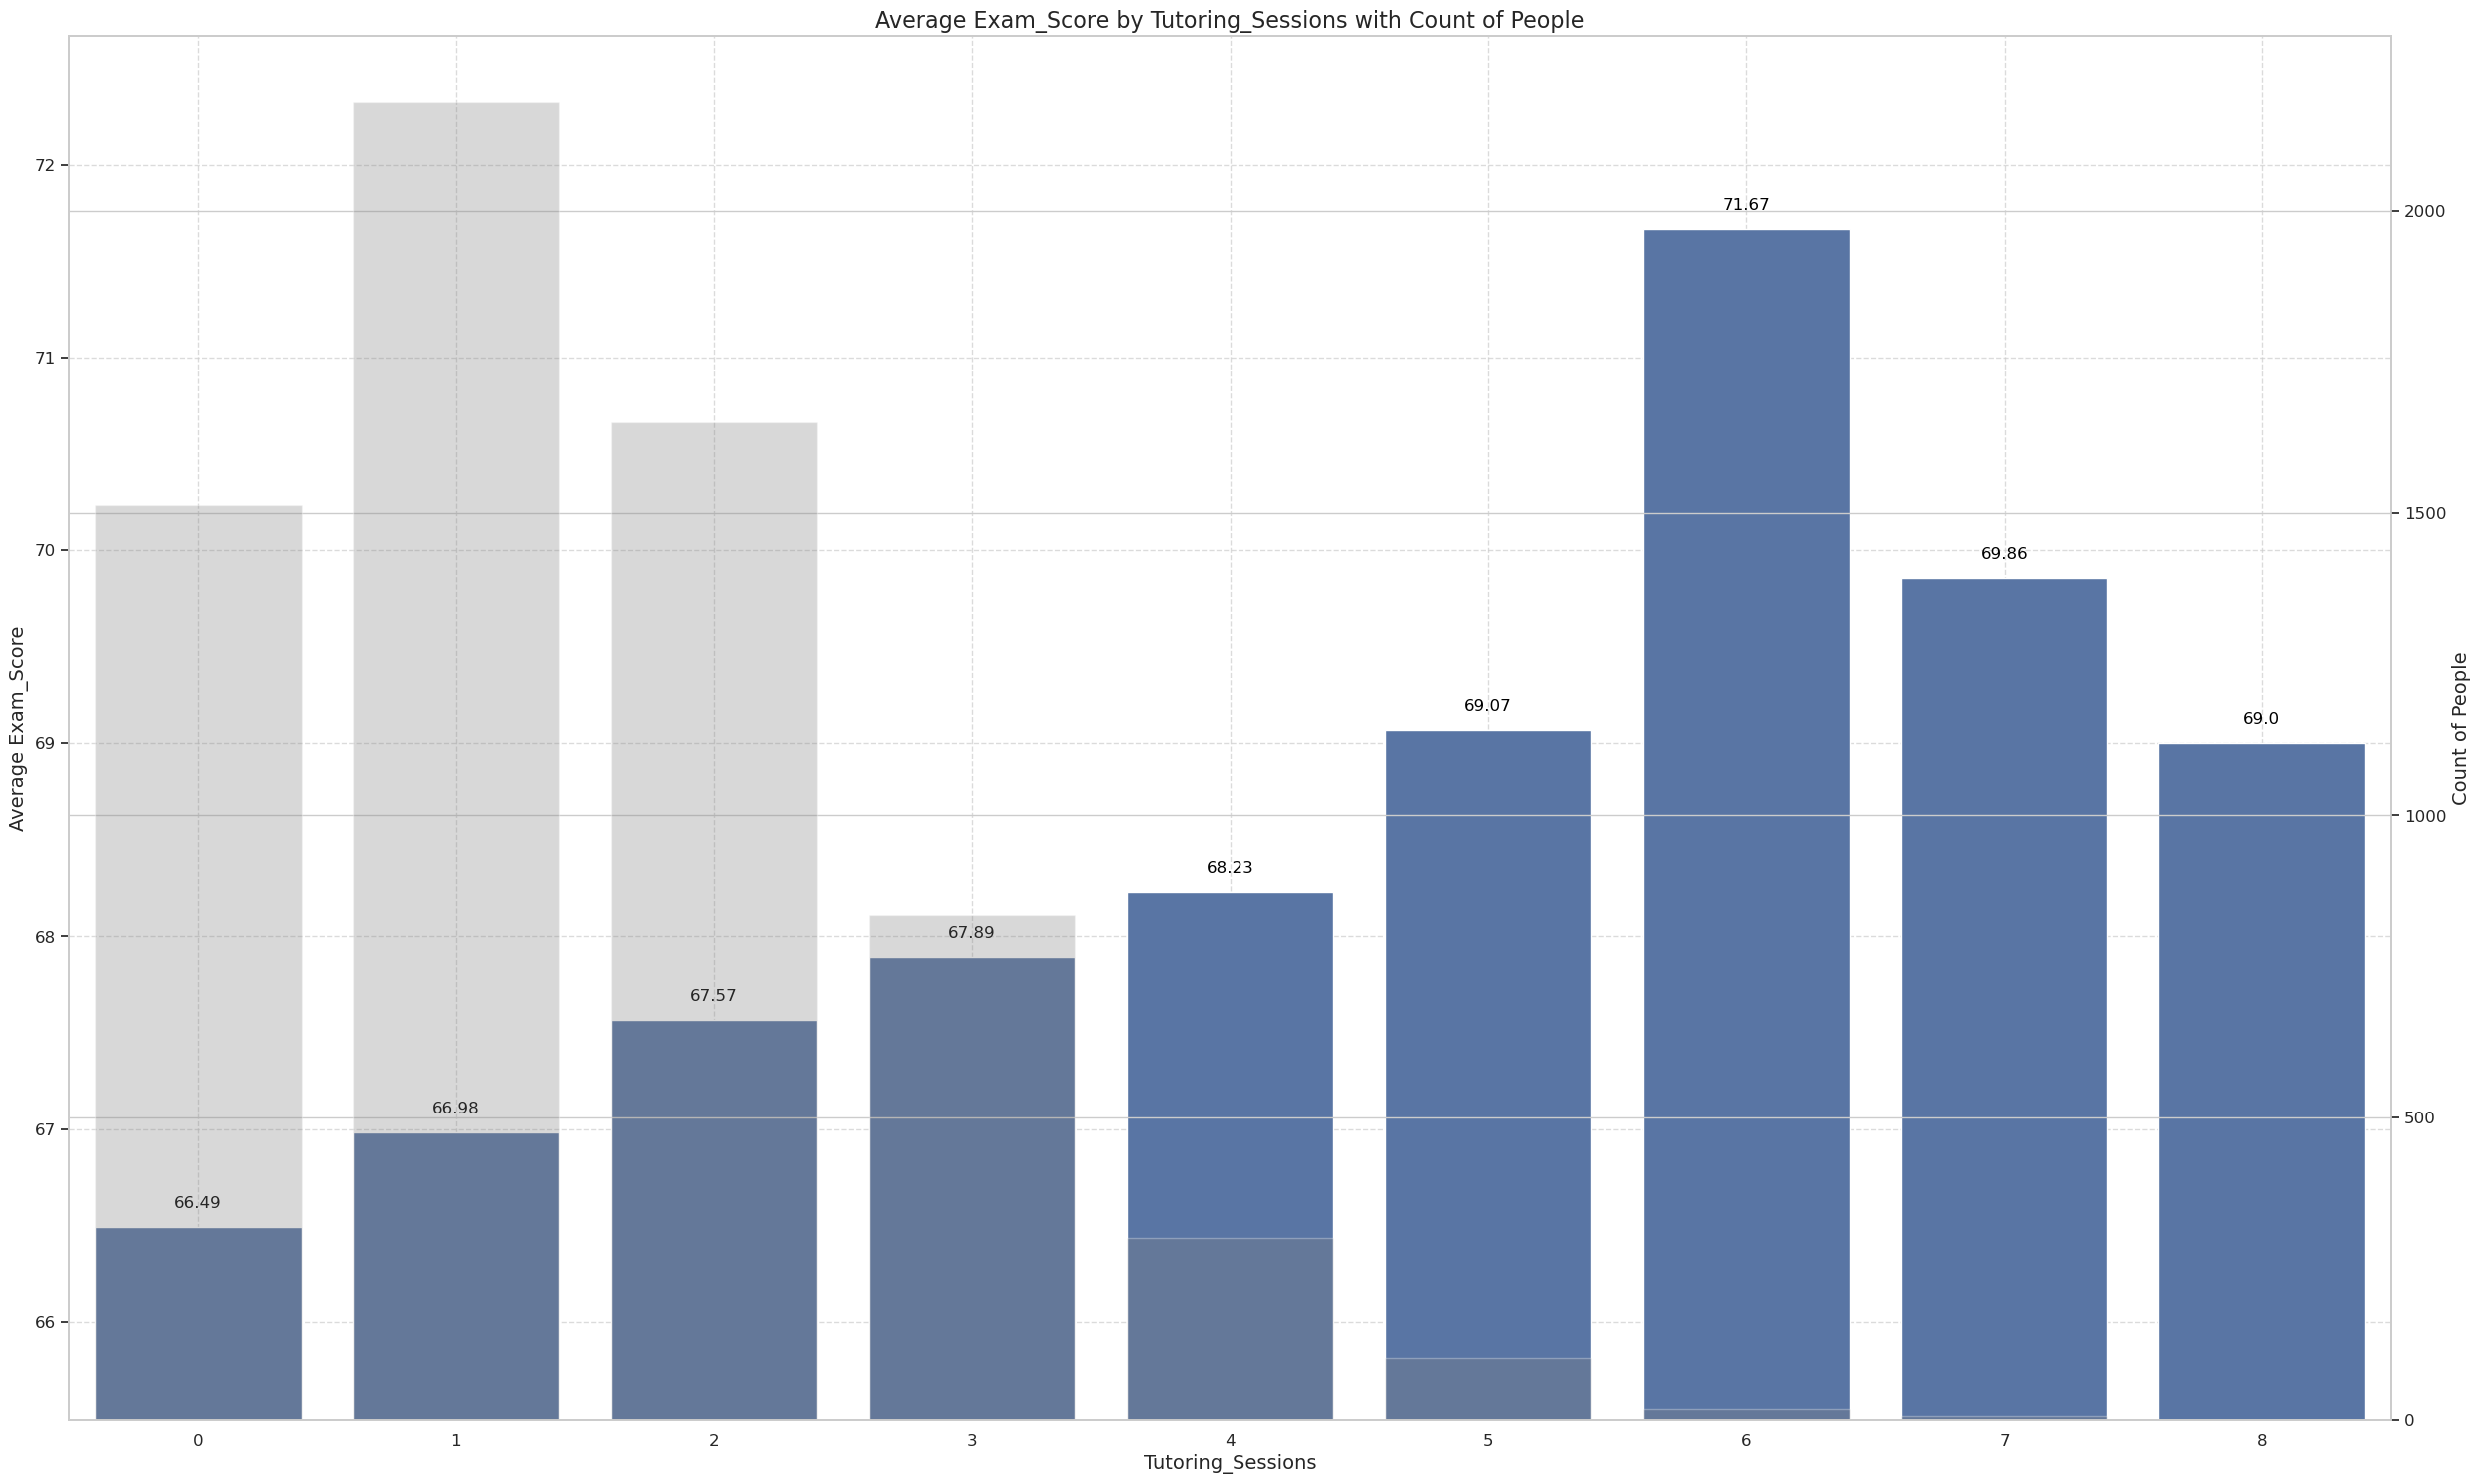

Average Exam_Score by Parental_Education_Level:
   Parental_Education_Level  Exam_Score
0                         0   67.055556
1                         1   66.893577
2                         2   67.315737
3                         3   67.970881
ANOVA test result for Exam_Score by Parental_Education_Level: F-statistic = 24.444311673951052, p-value = 1.0040998225221703e-15


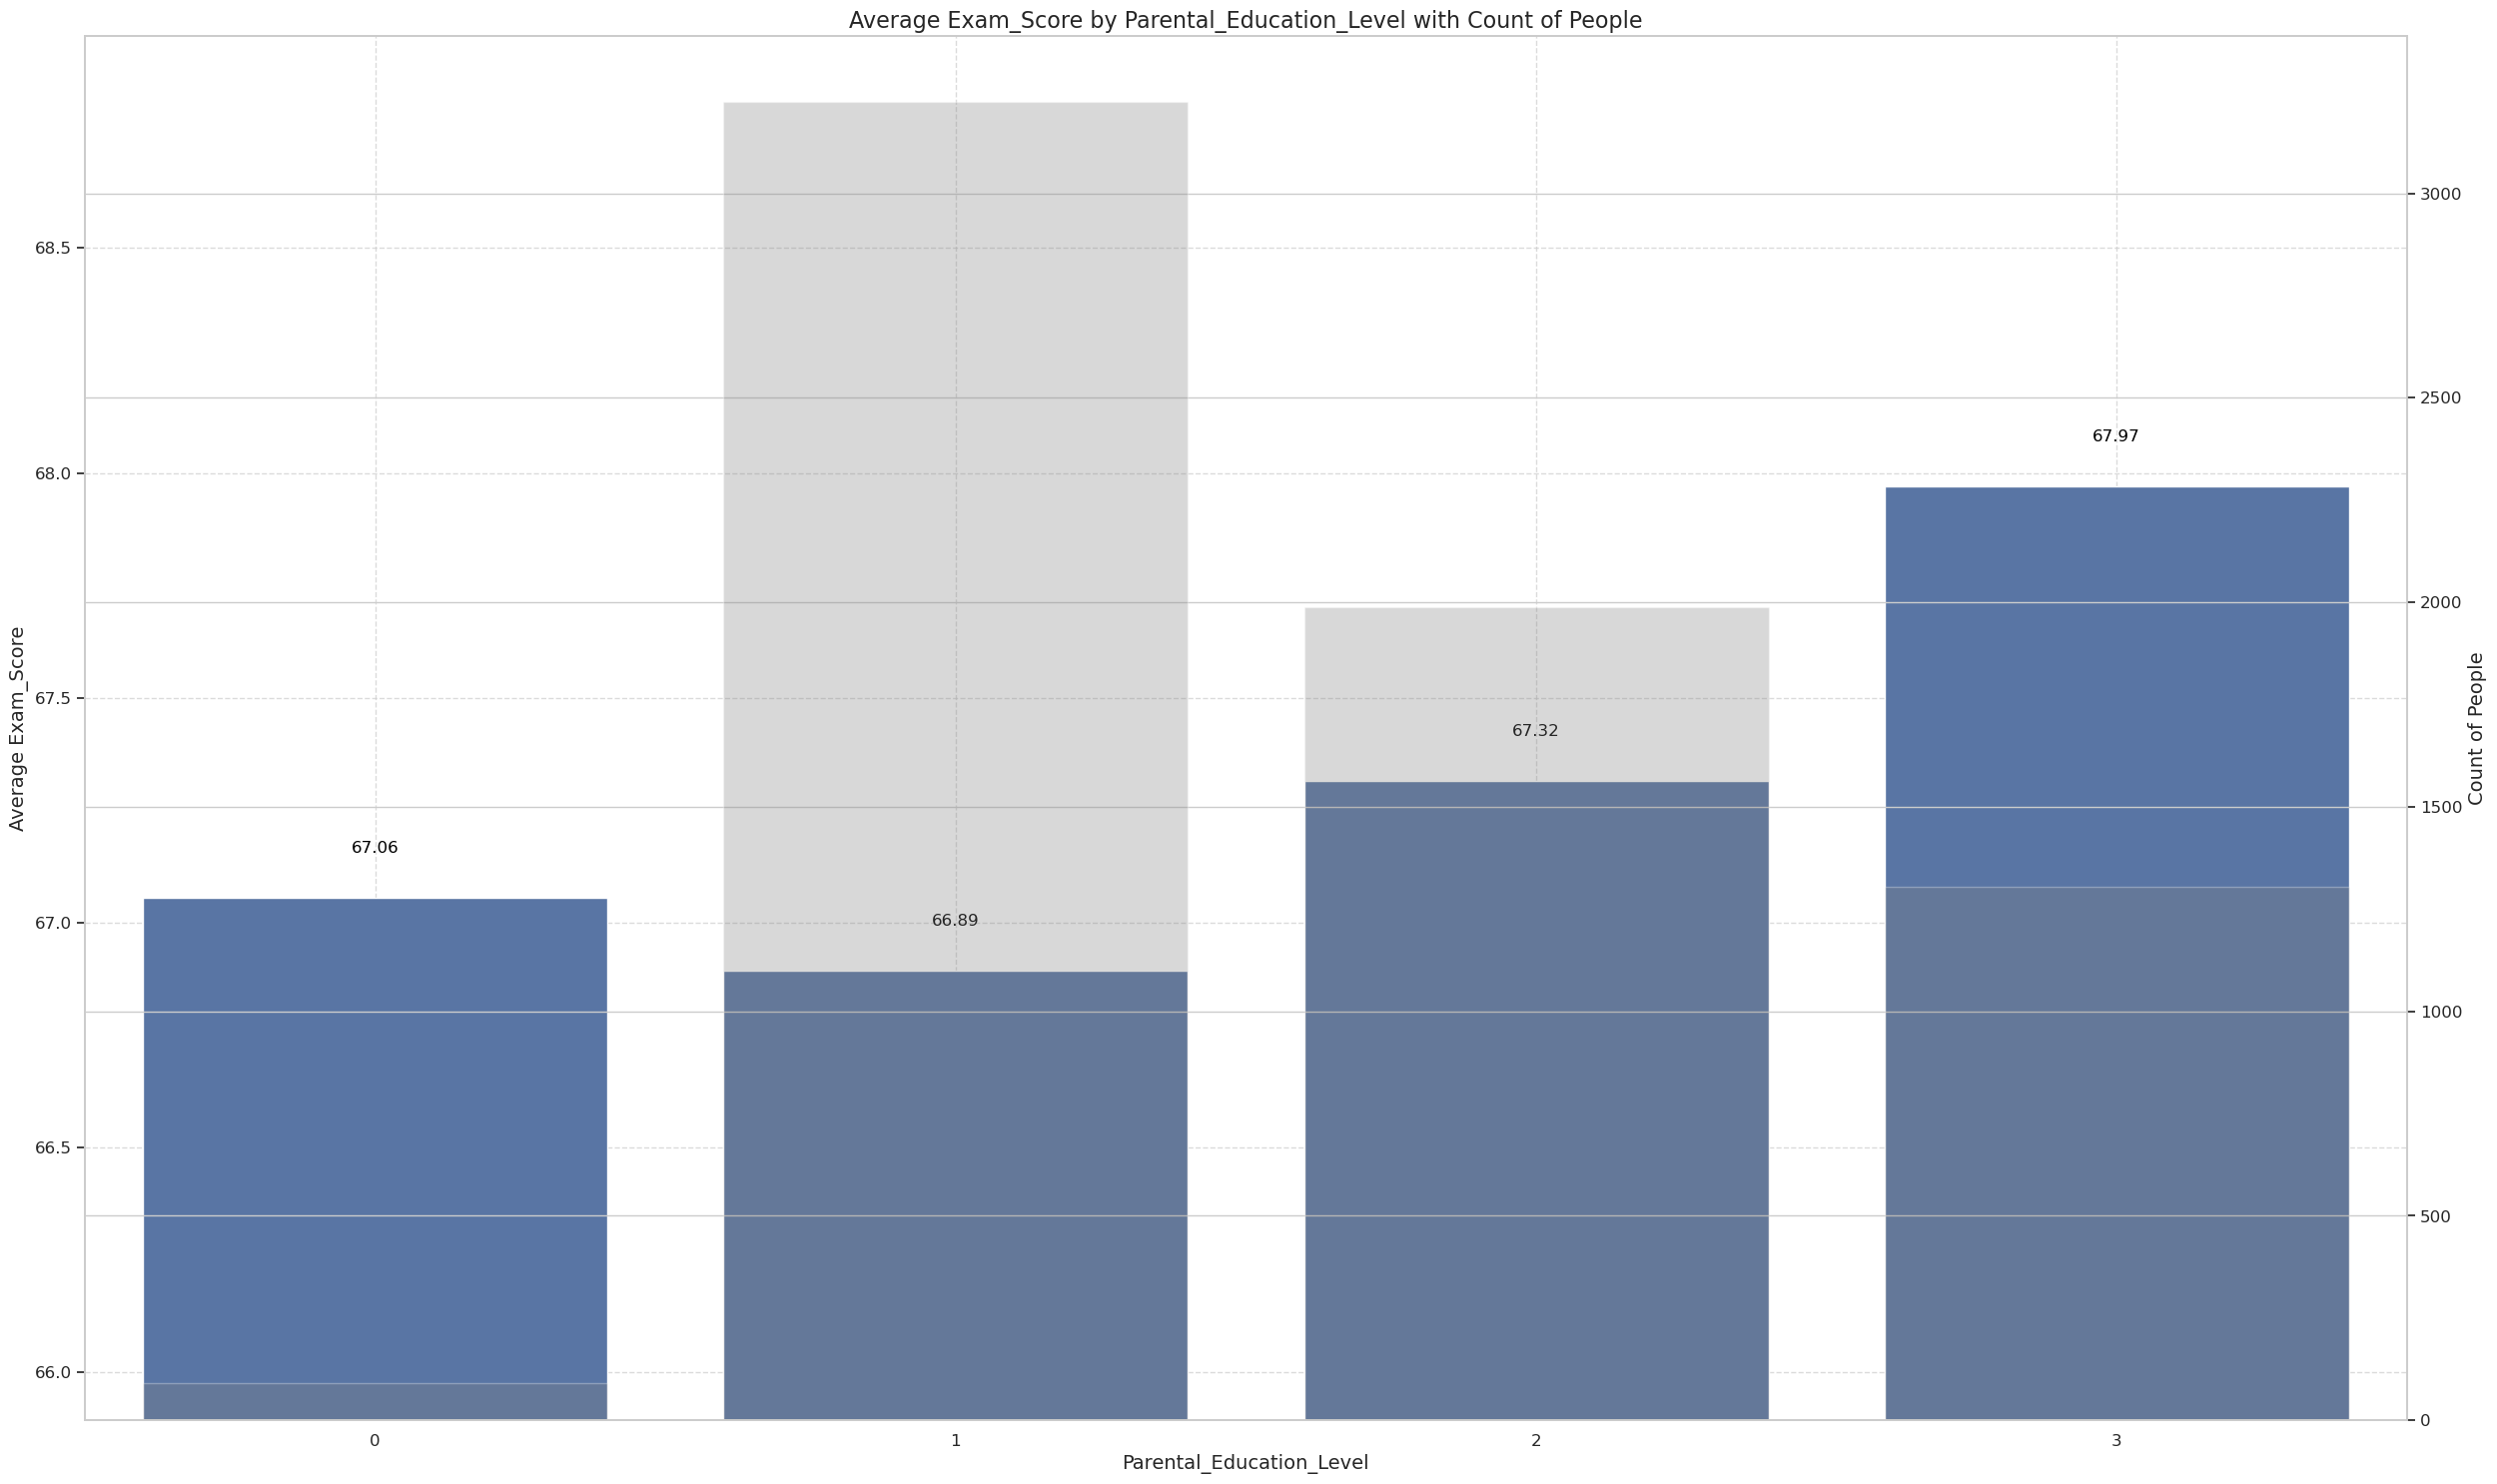

Average Exam_Score by Peer_Influence:
   Peer_Influence  Exam_Score
0              -1   66.564270
1               0   67.197917
2               1   67.623199
ANOVA test result for Exam_Score by Peer_Influence: F-statistic = 34.05207650712709, p-value = 1.9368909270985136e-15


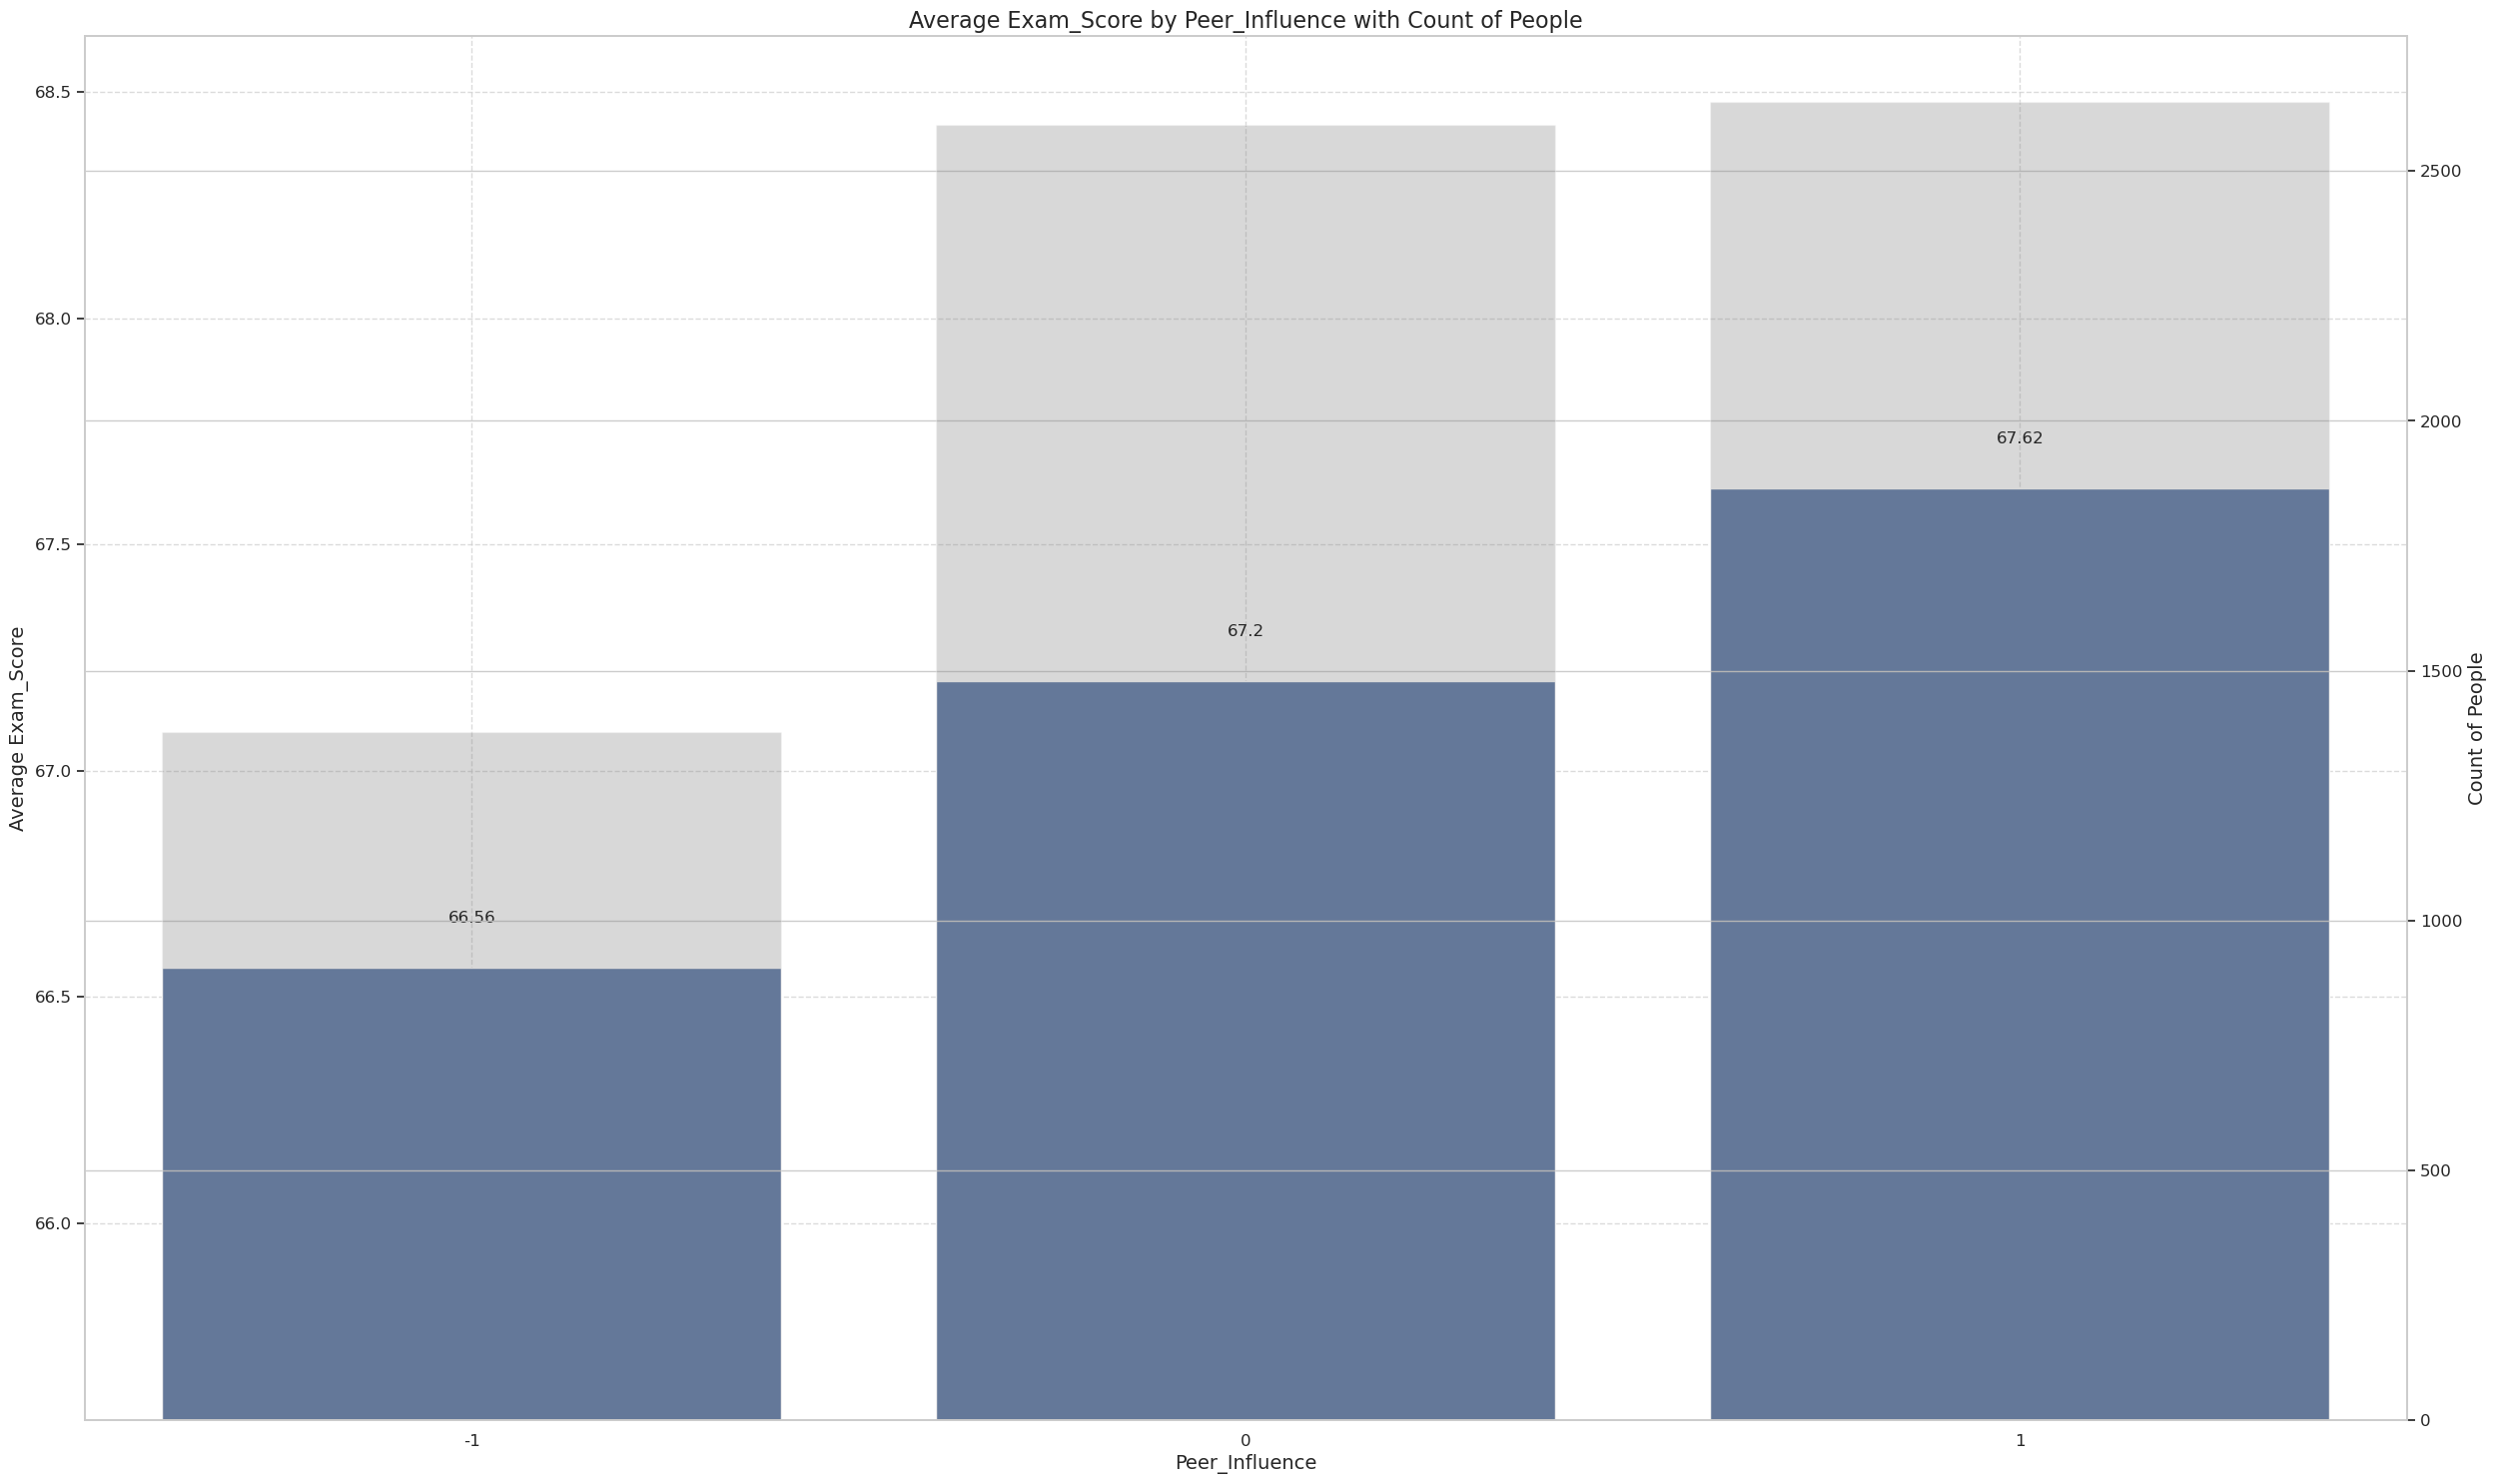

Average Exam_Score by Family_Income:
   Family_Income  Exam_Score
0              1   66.848428
1              2   67.334959
2              3   67.842396
ANOVA test result for Exam_Score by Family_Income: F-statistic = 29.79386131613895, p-value = 1.3143686049770217e-13


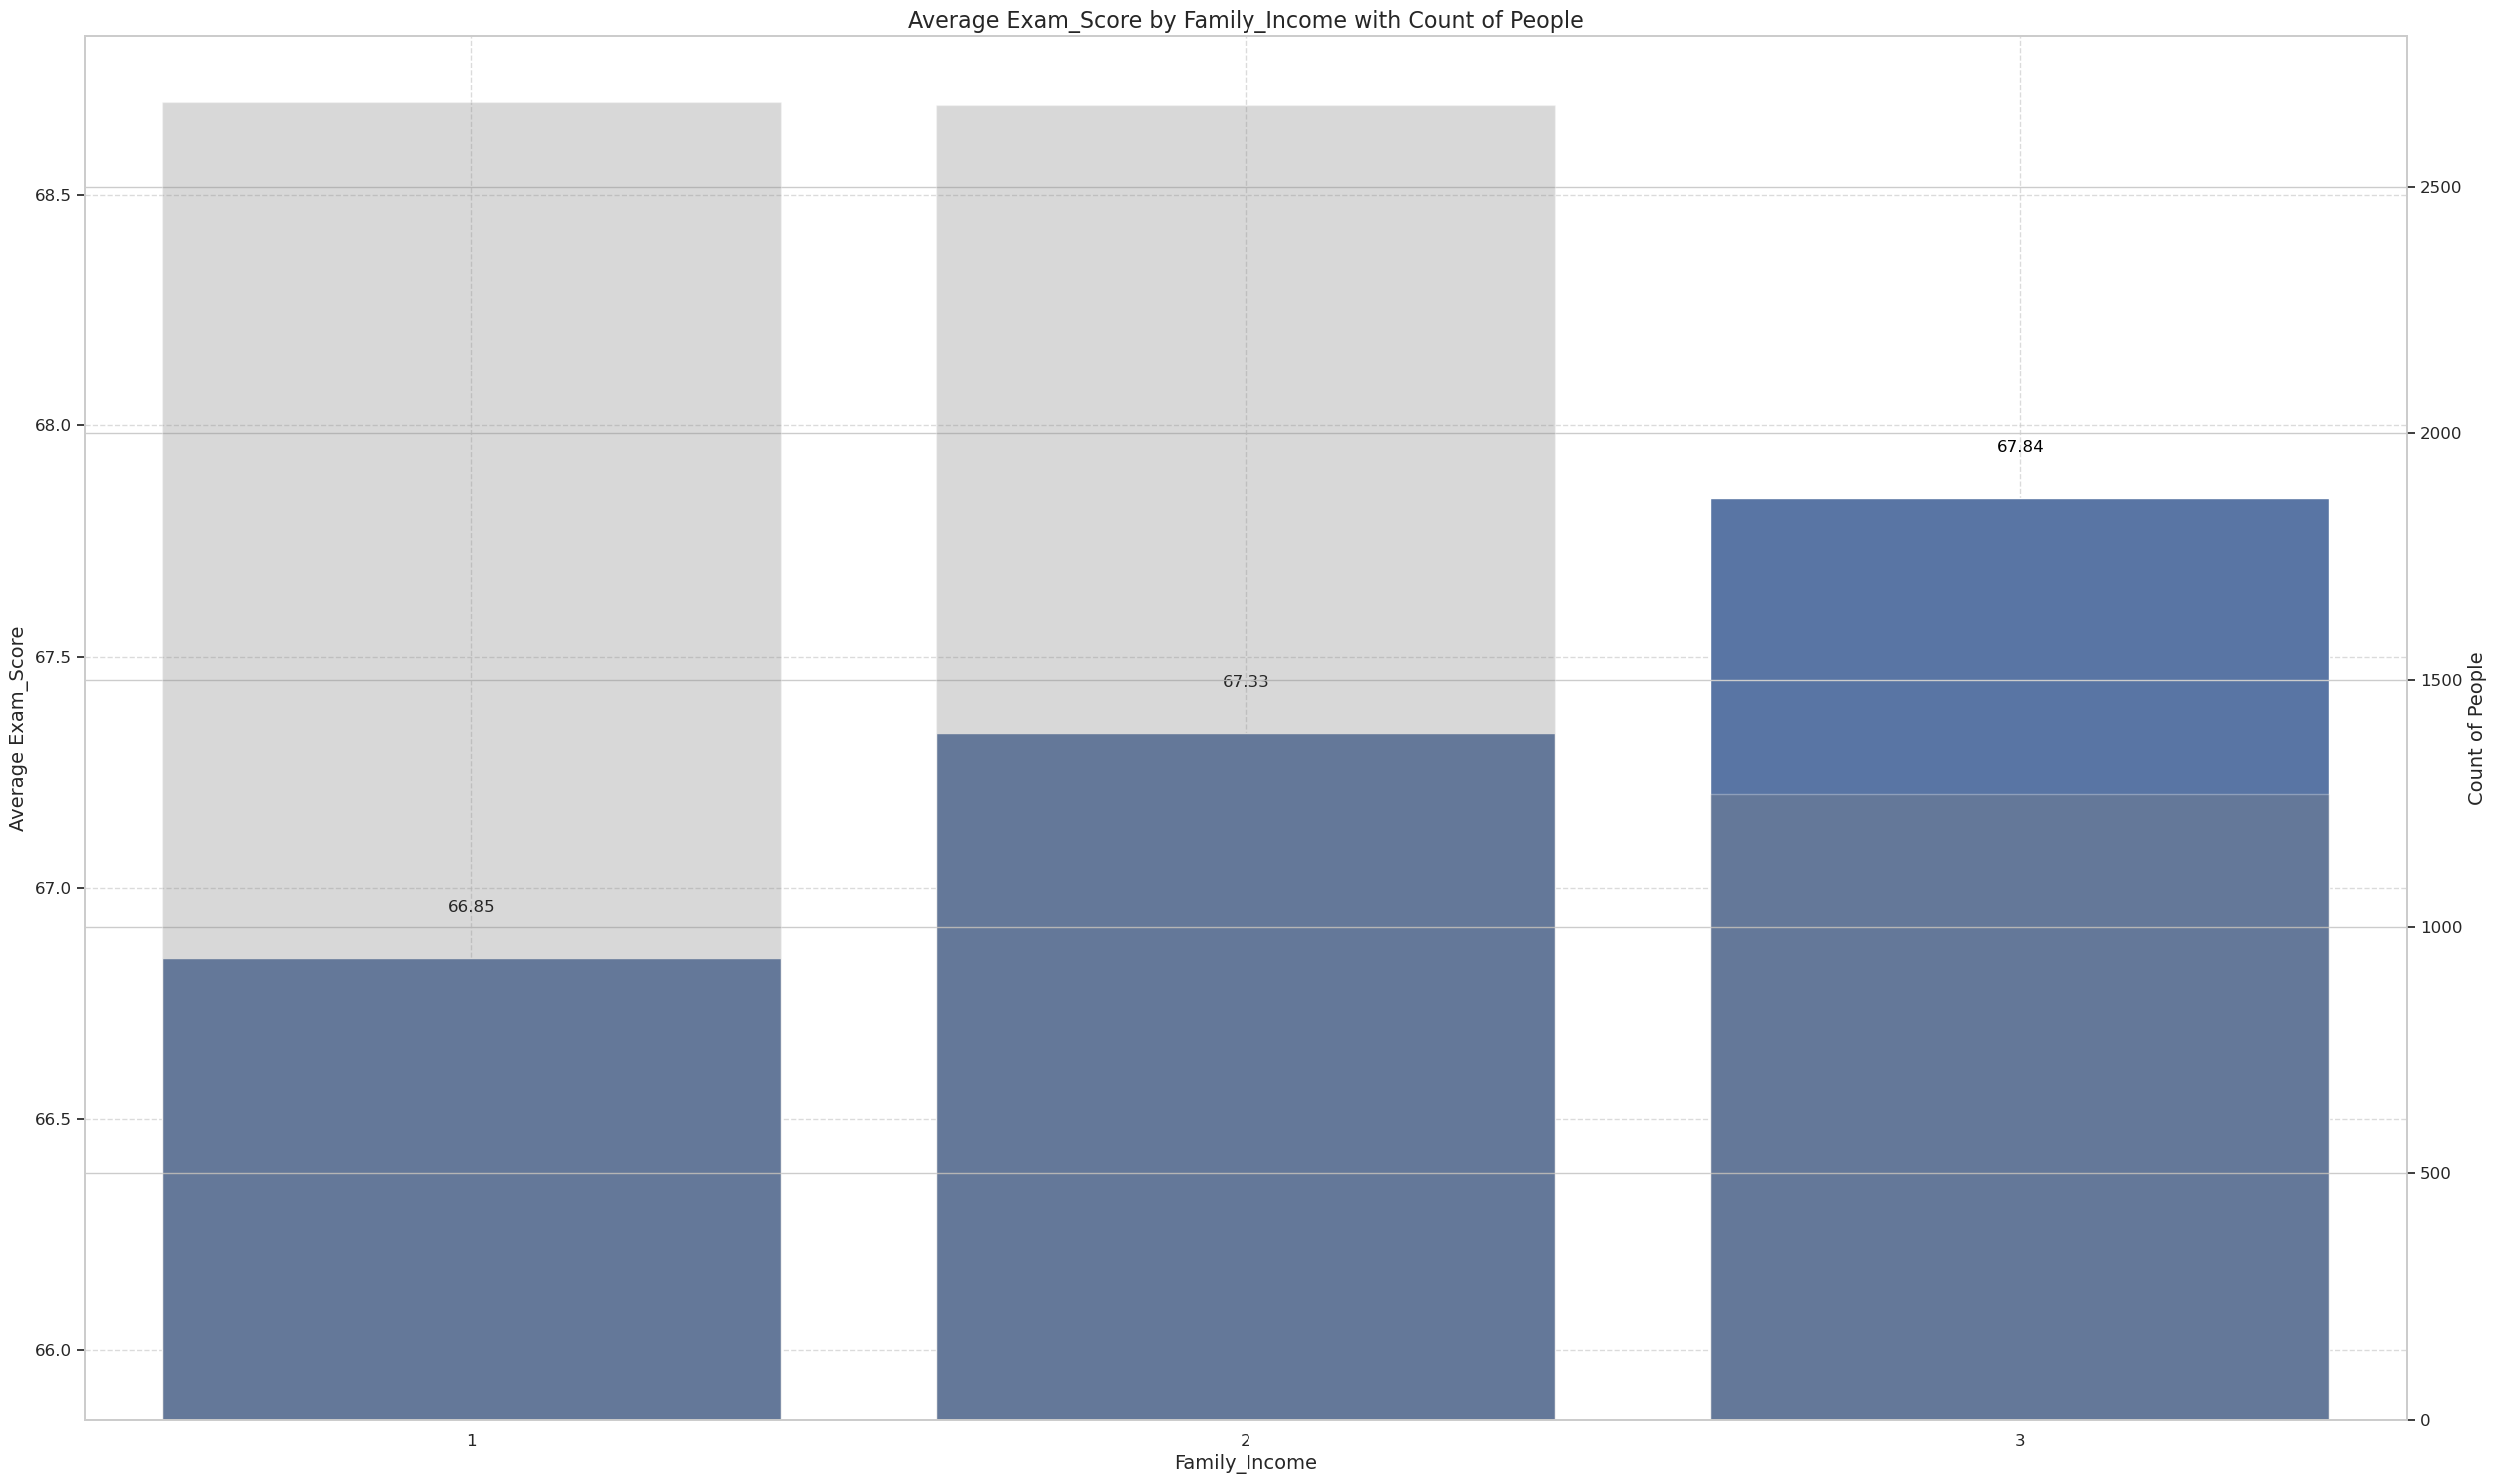

Average Exam_Score by Distance_from_Home:
   Distance_from_Home  Exam_Score
0                 1.0   66.457447
1                 2.0   66.981481
2                 3.0   67.512101
ANOVA test result for Exam_Score by Distance_from_Home: F-statistic = nan, p-value = nan


/tmp/ipykernel_233097/1312345991.py:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*category_groups)


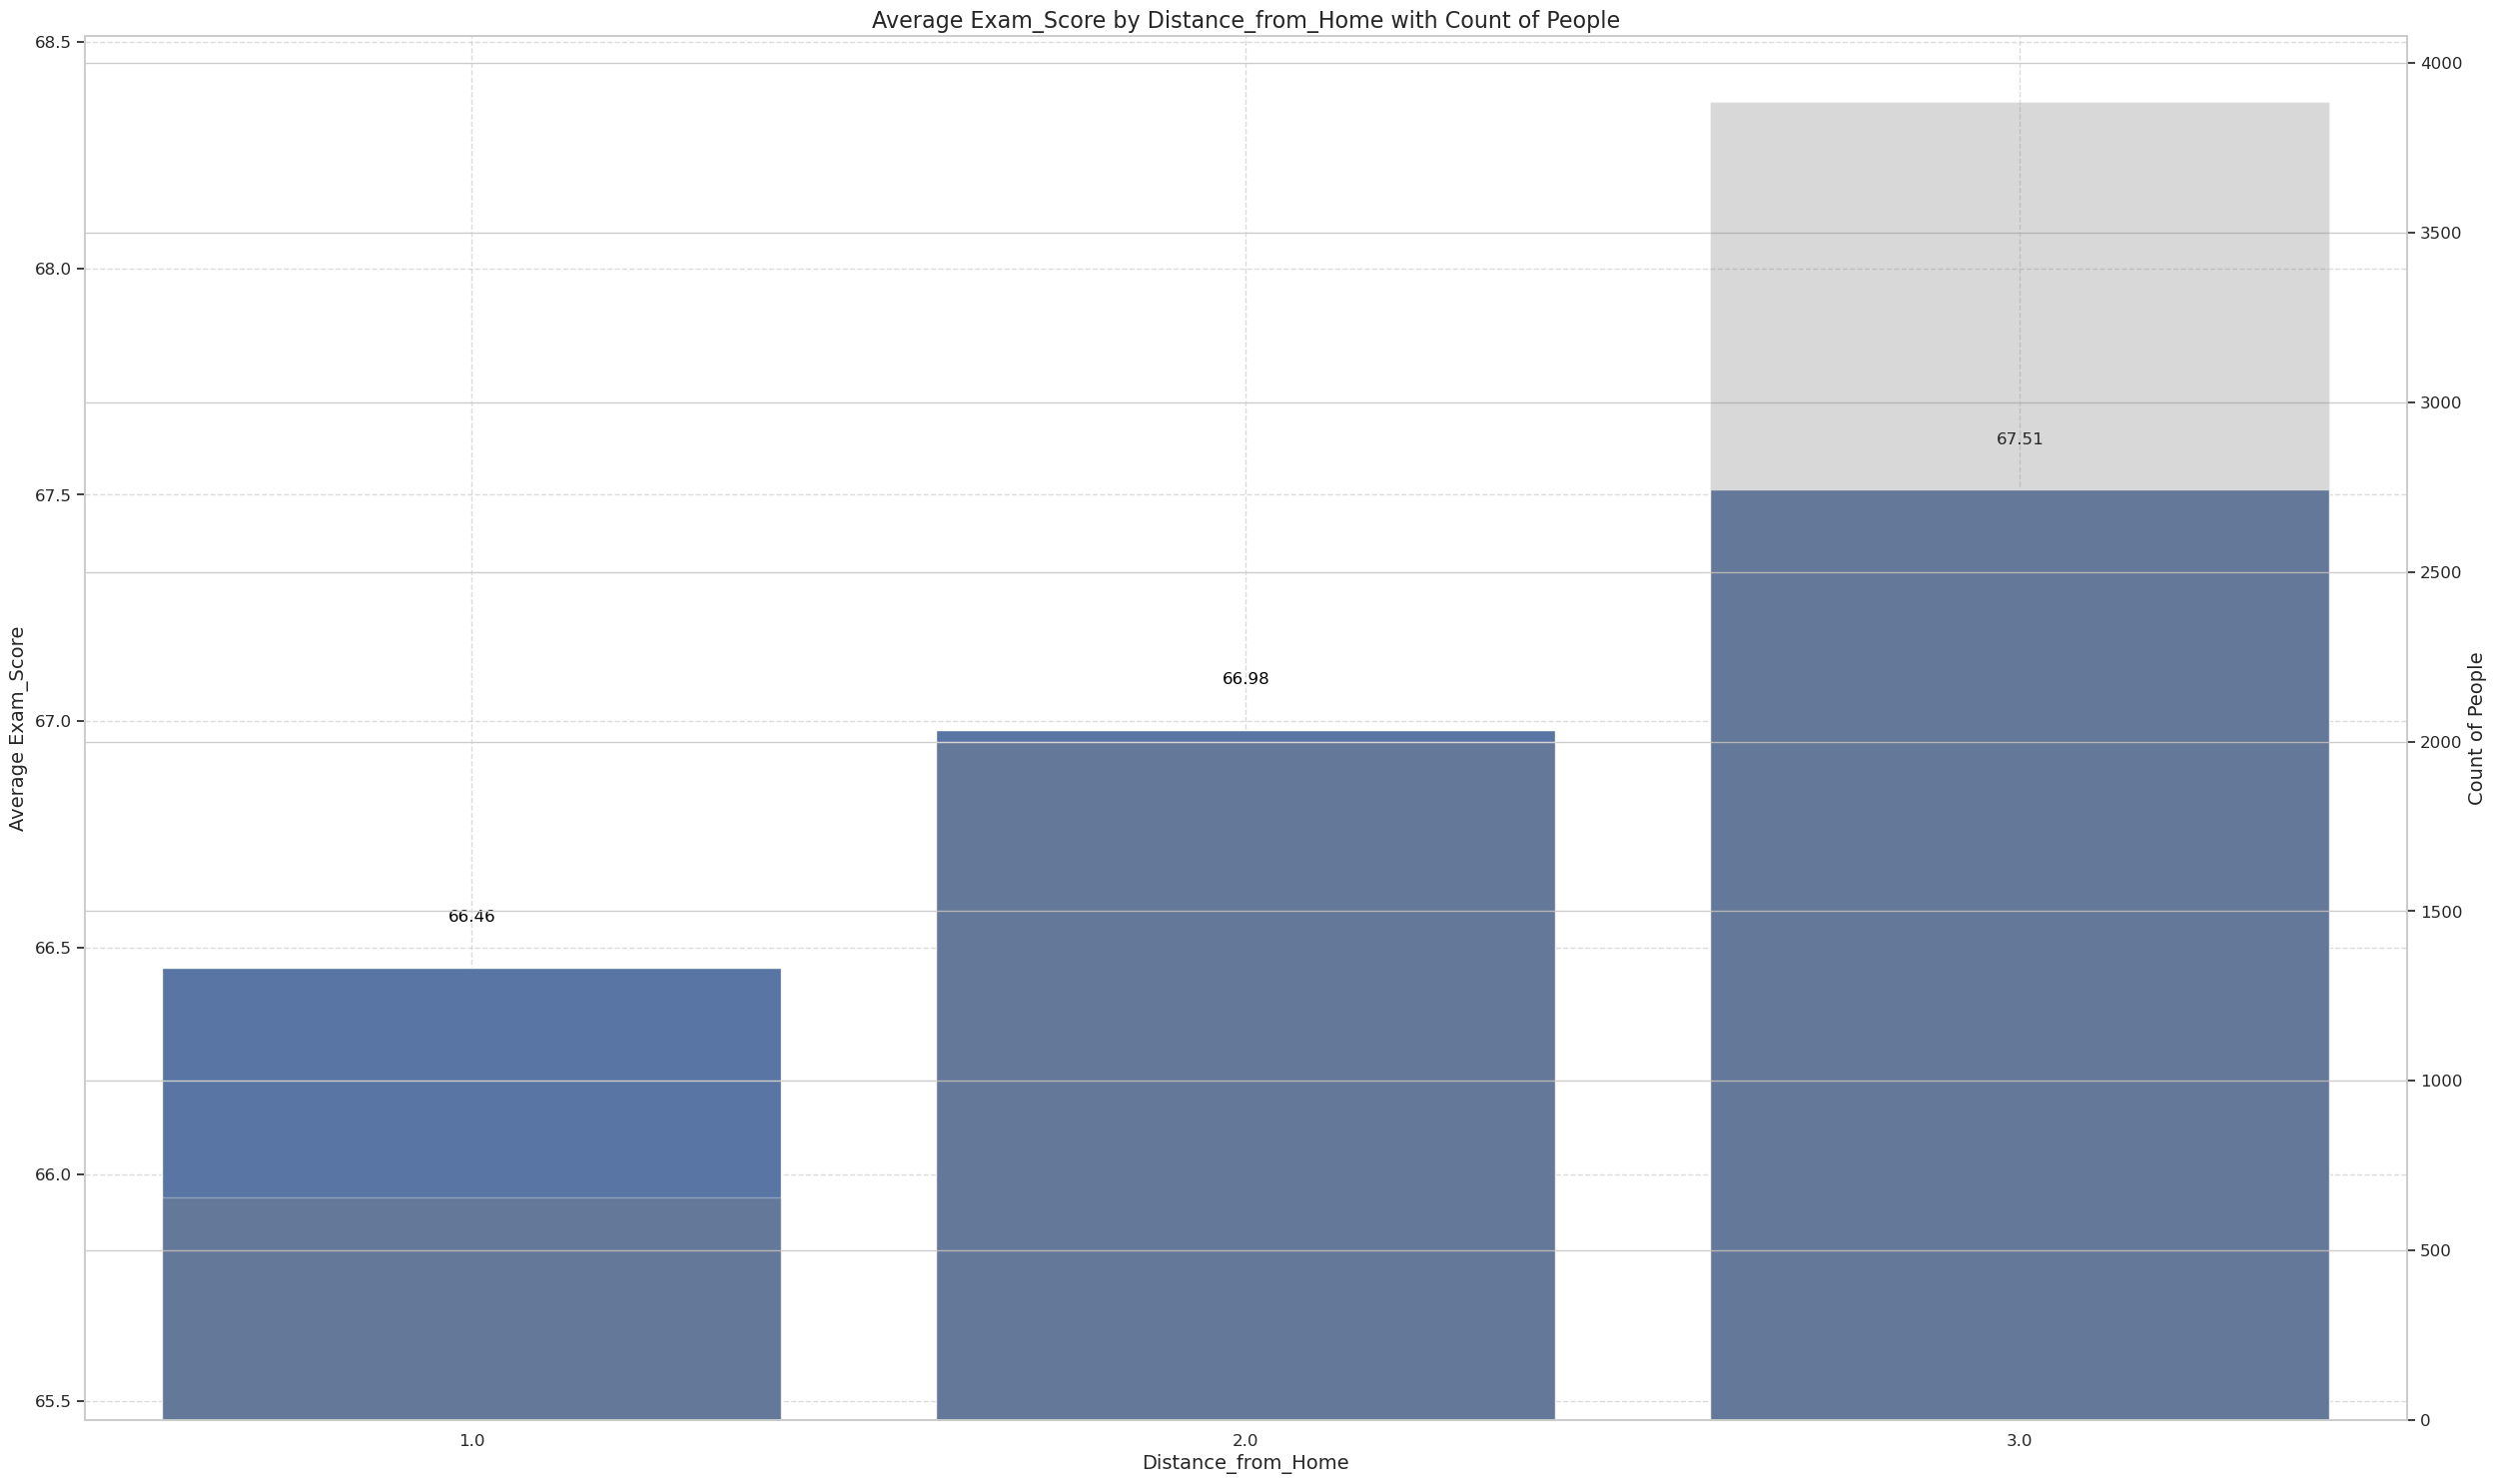

Average Exam_Score by Motivation_Level:
   Motivation_Level  Exam_Score
0                 1   66.752194
1                 2   67.330648
2                 3   67.704321
ANOVA test result for Exam_Score by Motivation_Level: F-statistic = 25.716769950376058, p-value = 7.492319380241663e-12


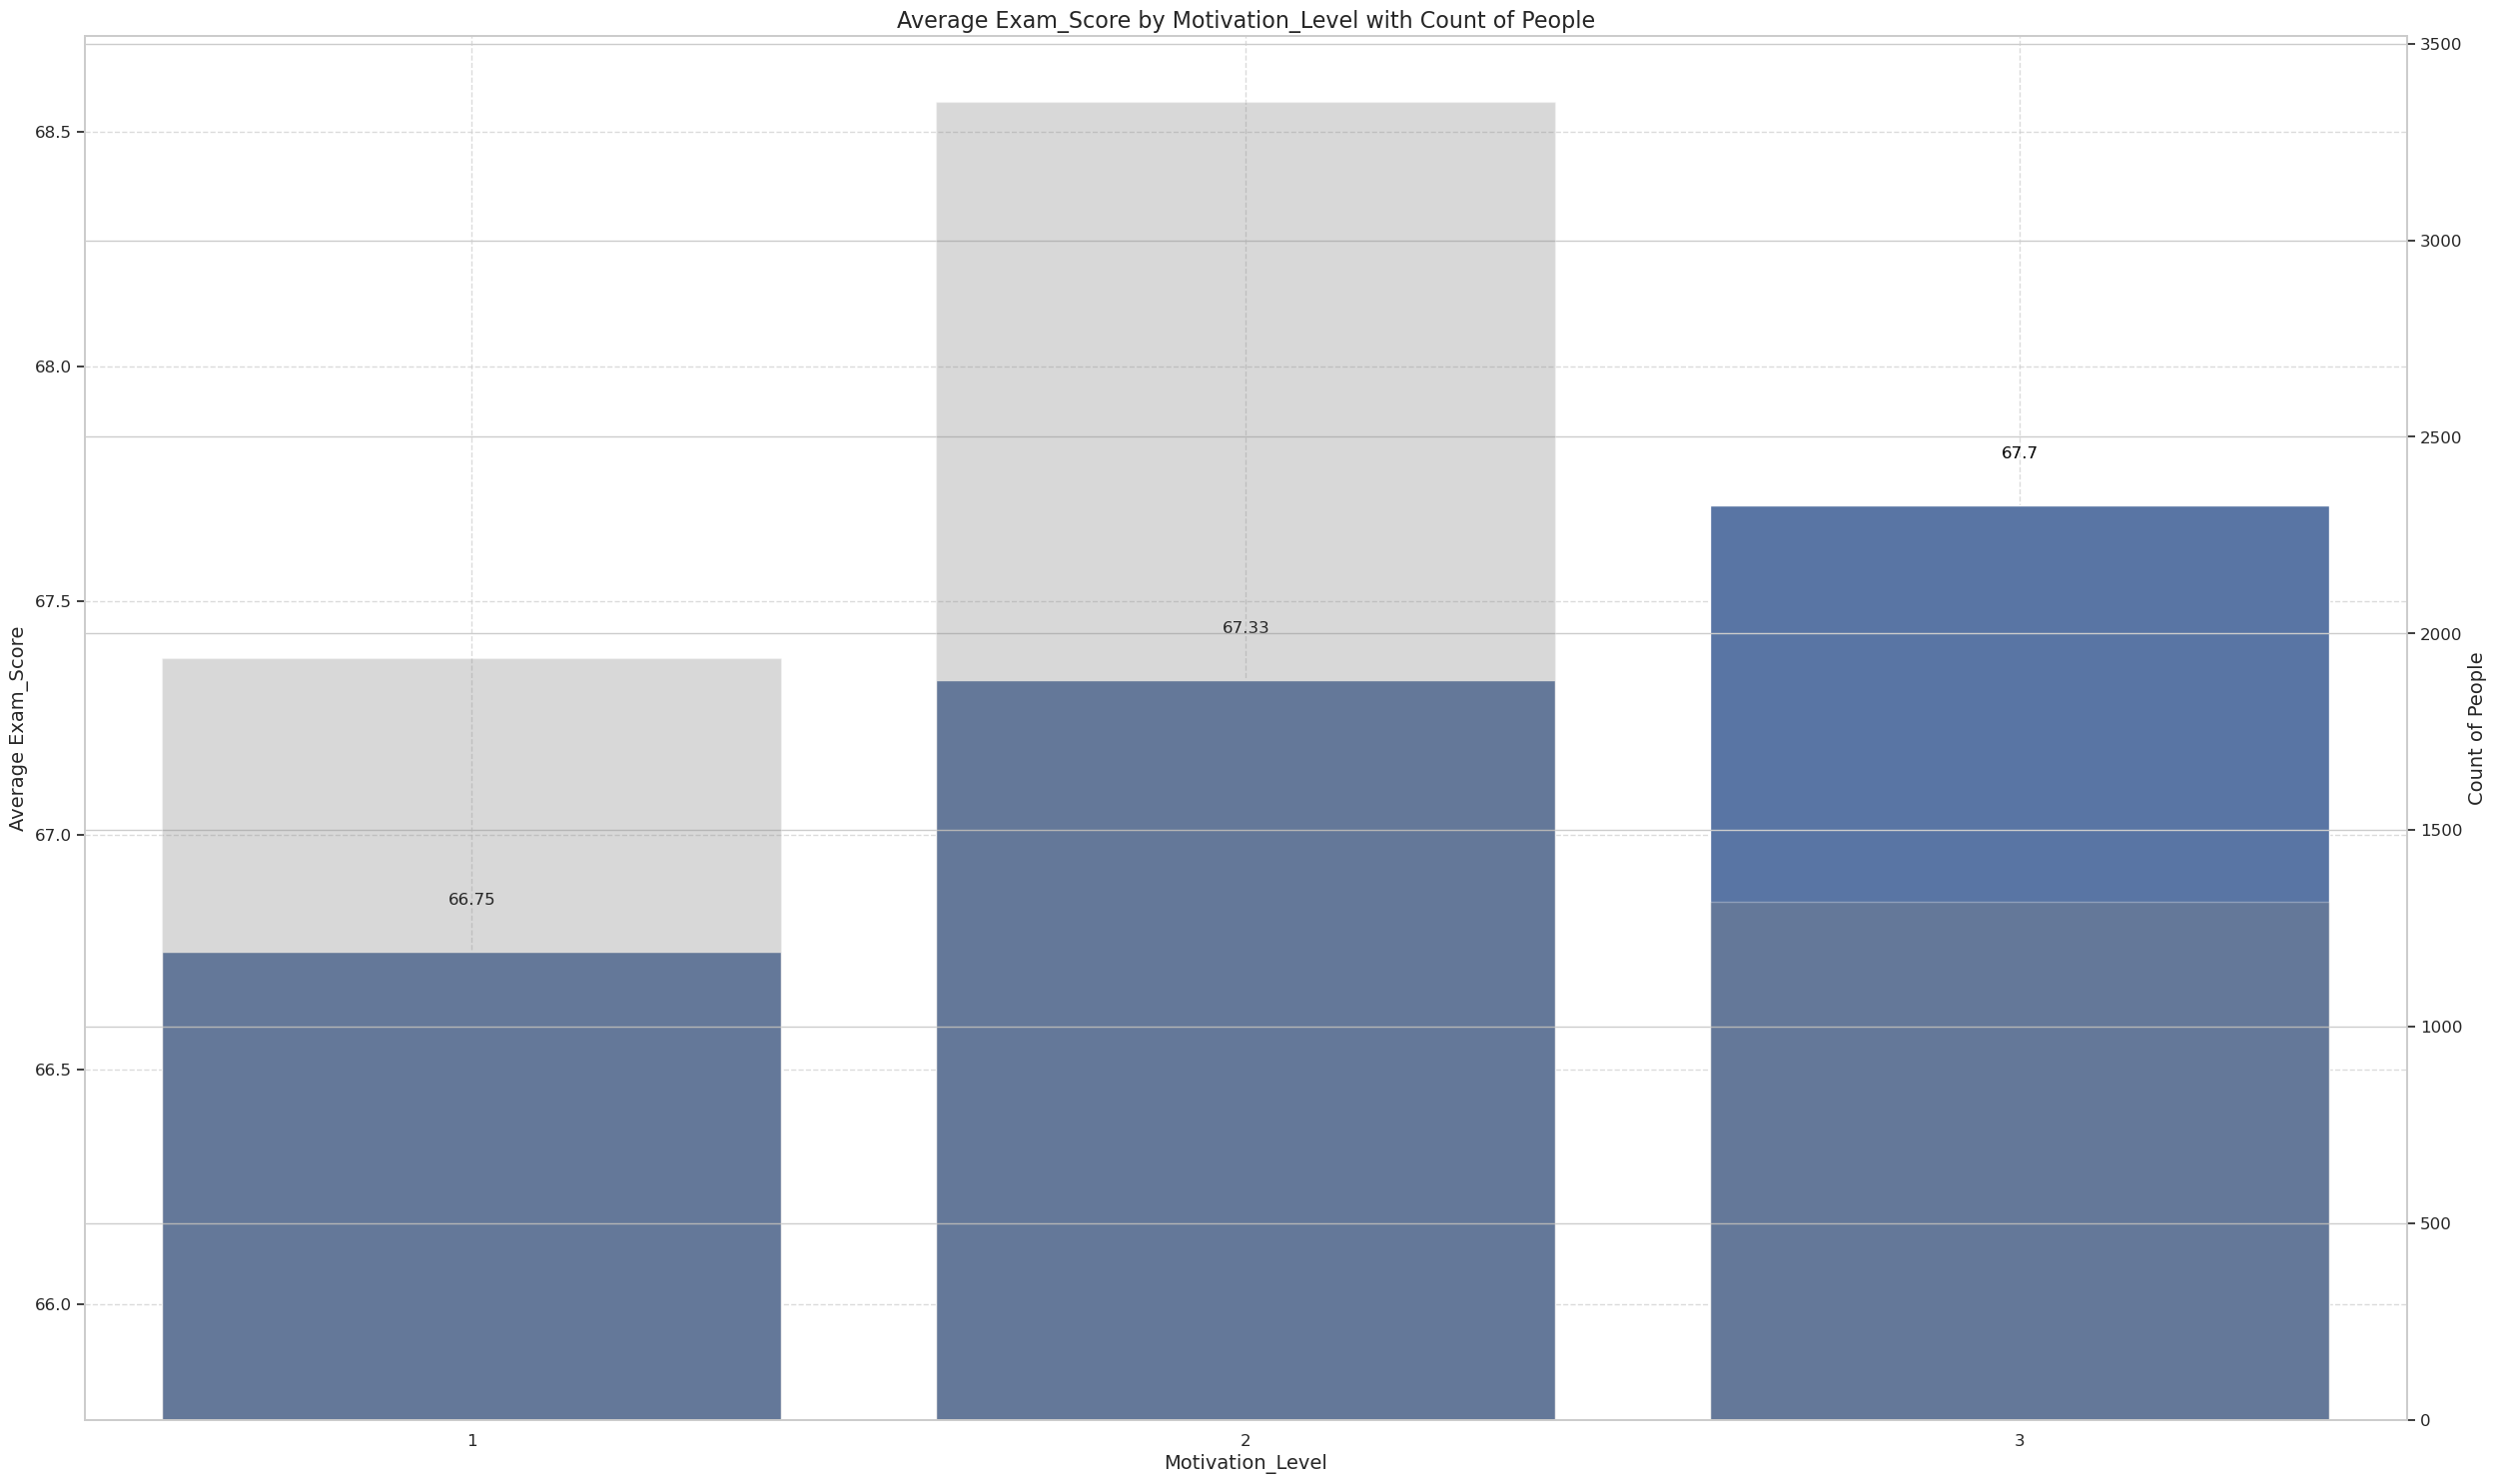

Average Exam_Score by Teacher_Quality:
   Teacher_Quality  Exam_Score
0              1.0   66.753425
1              2.0   67.109299
2              3.0   67.676939
ANOVA test result for Exam_Score by Teacher_Quality: F-statistic = nan, p-value = nan


/tmp/ipykernel_233097/1312345991.py:21: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = f_oneway(*category_groups)


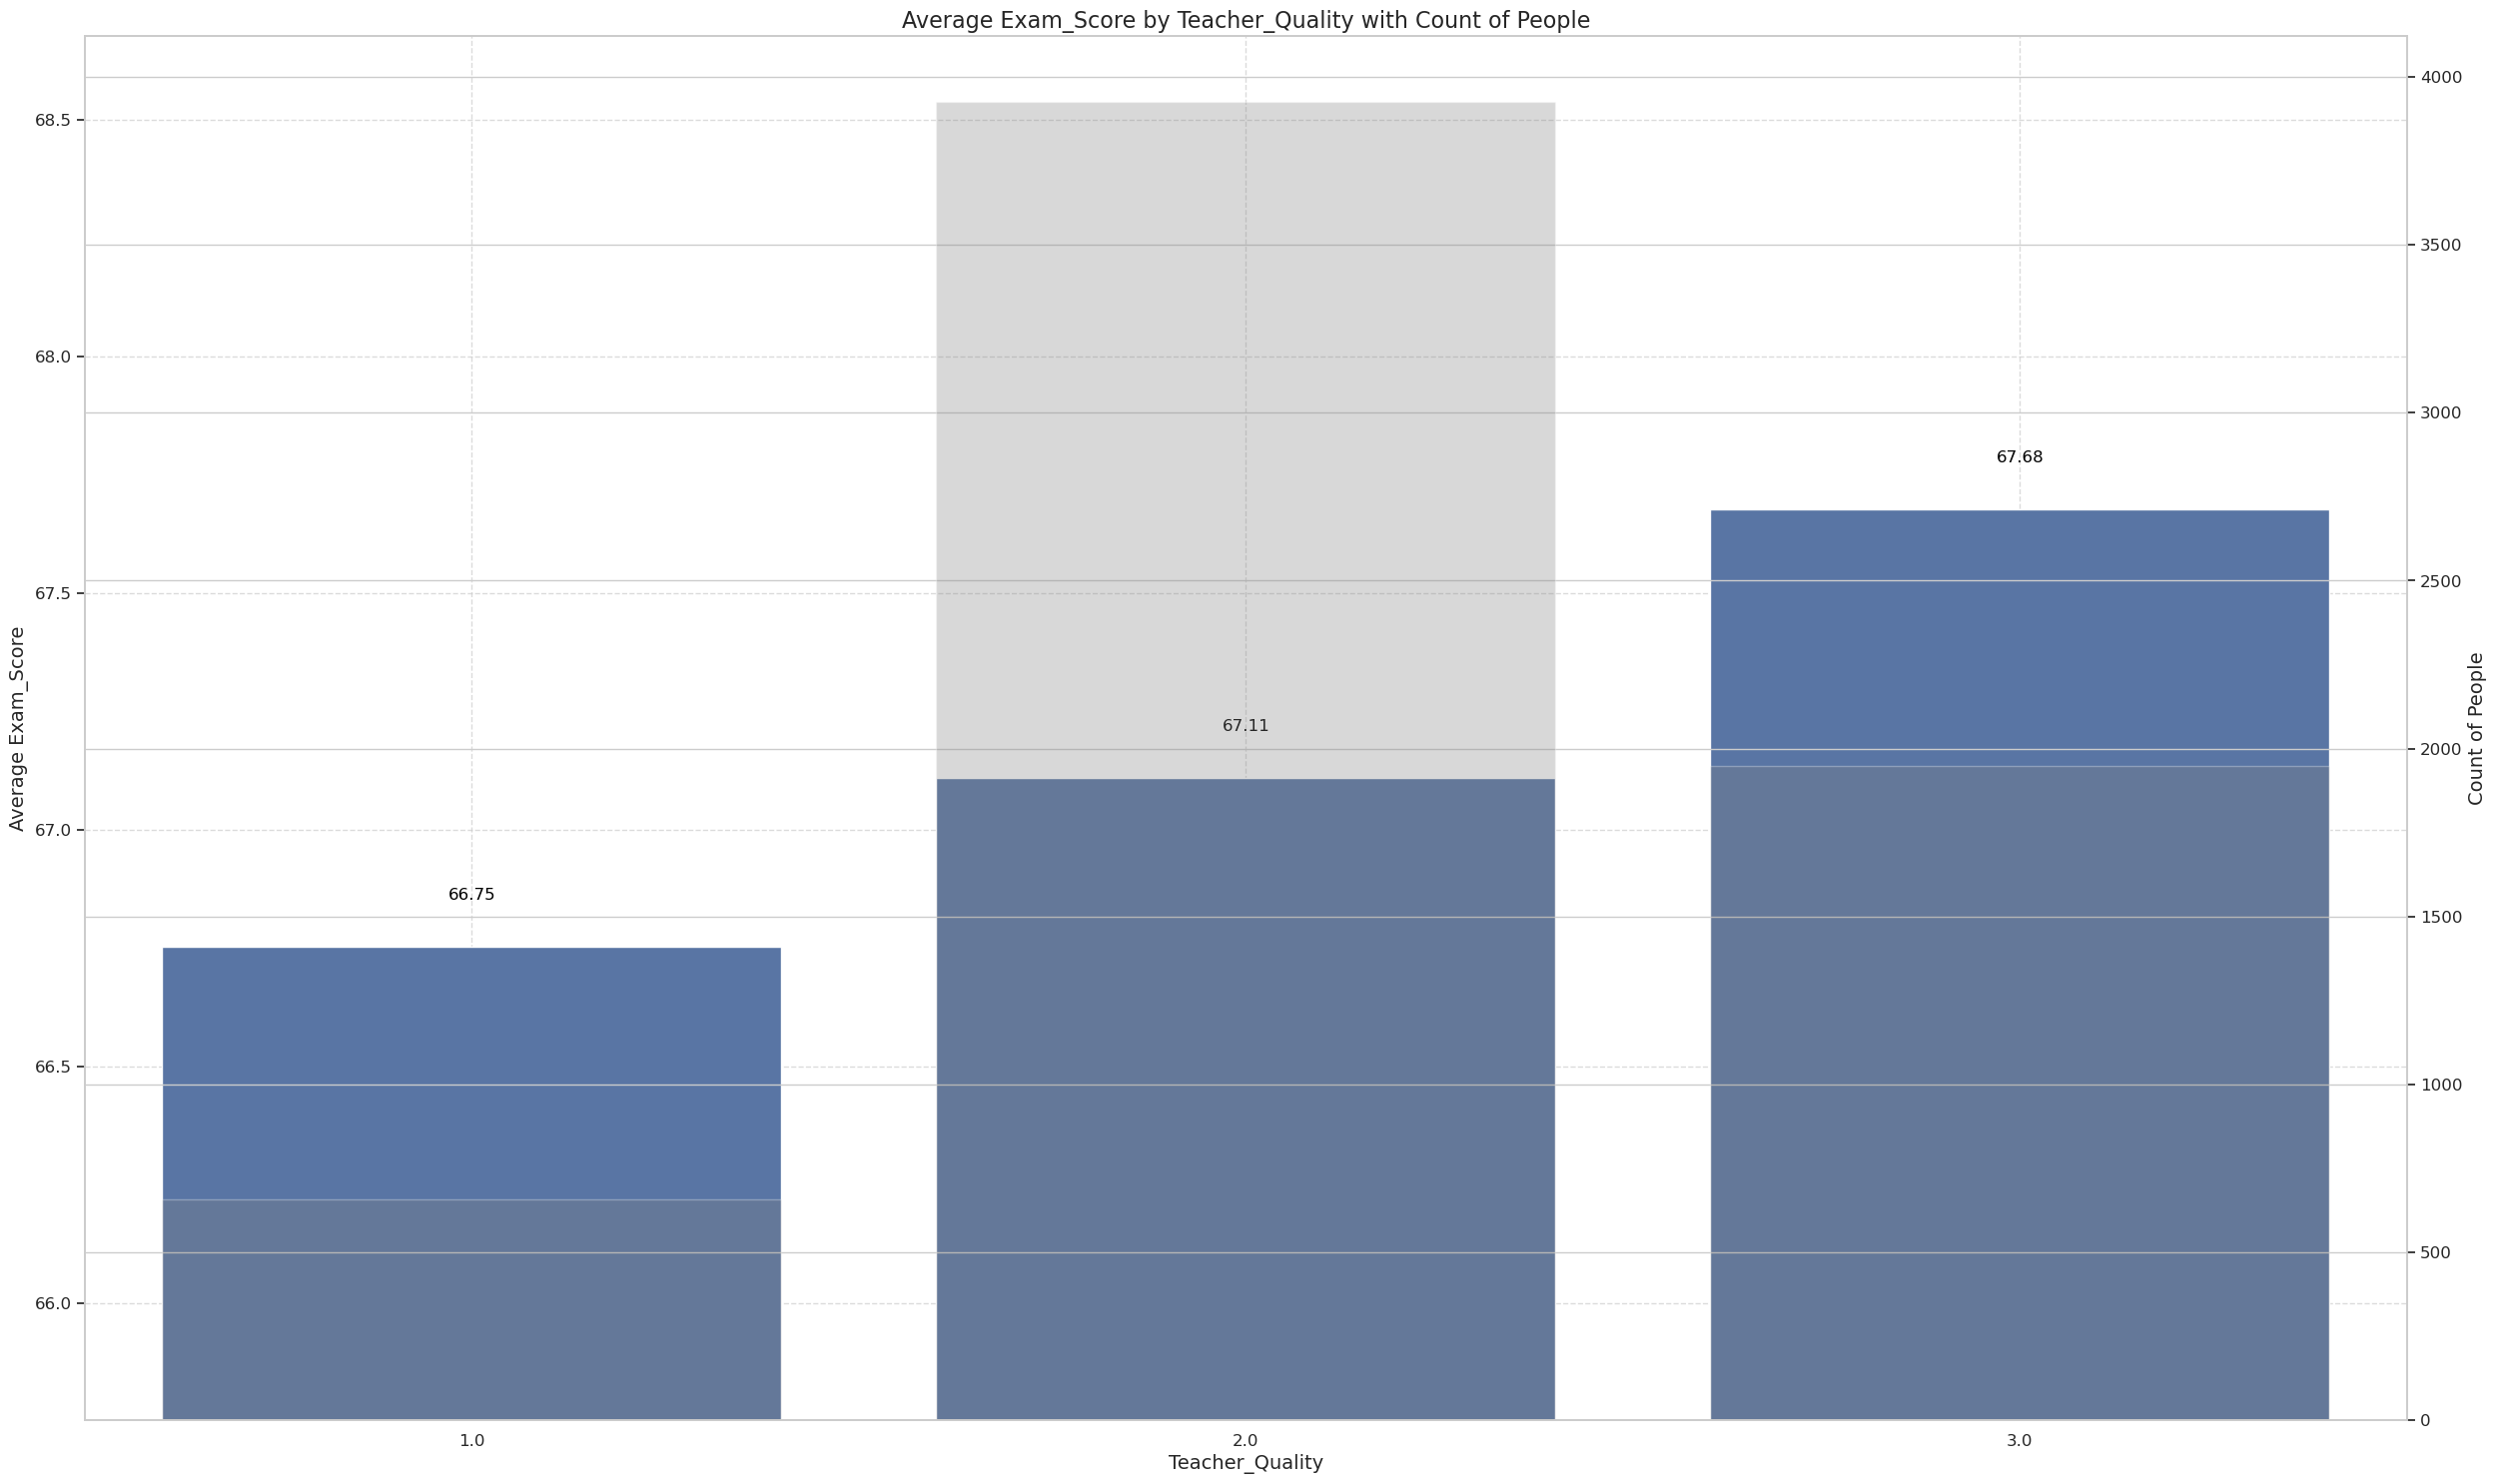

Average Exam_Score by Extracurricular_Activities:
   Extracurricular_Activities  Exam_Score
0                           0   66.931435
1                           1   67.441849
ANOVA test result for Exam_Score by Extracurricular_Activities: F-statistic = 27.491708806263357, p-value = 1.626677707731656e-07


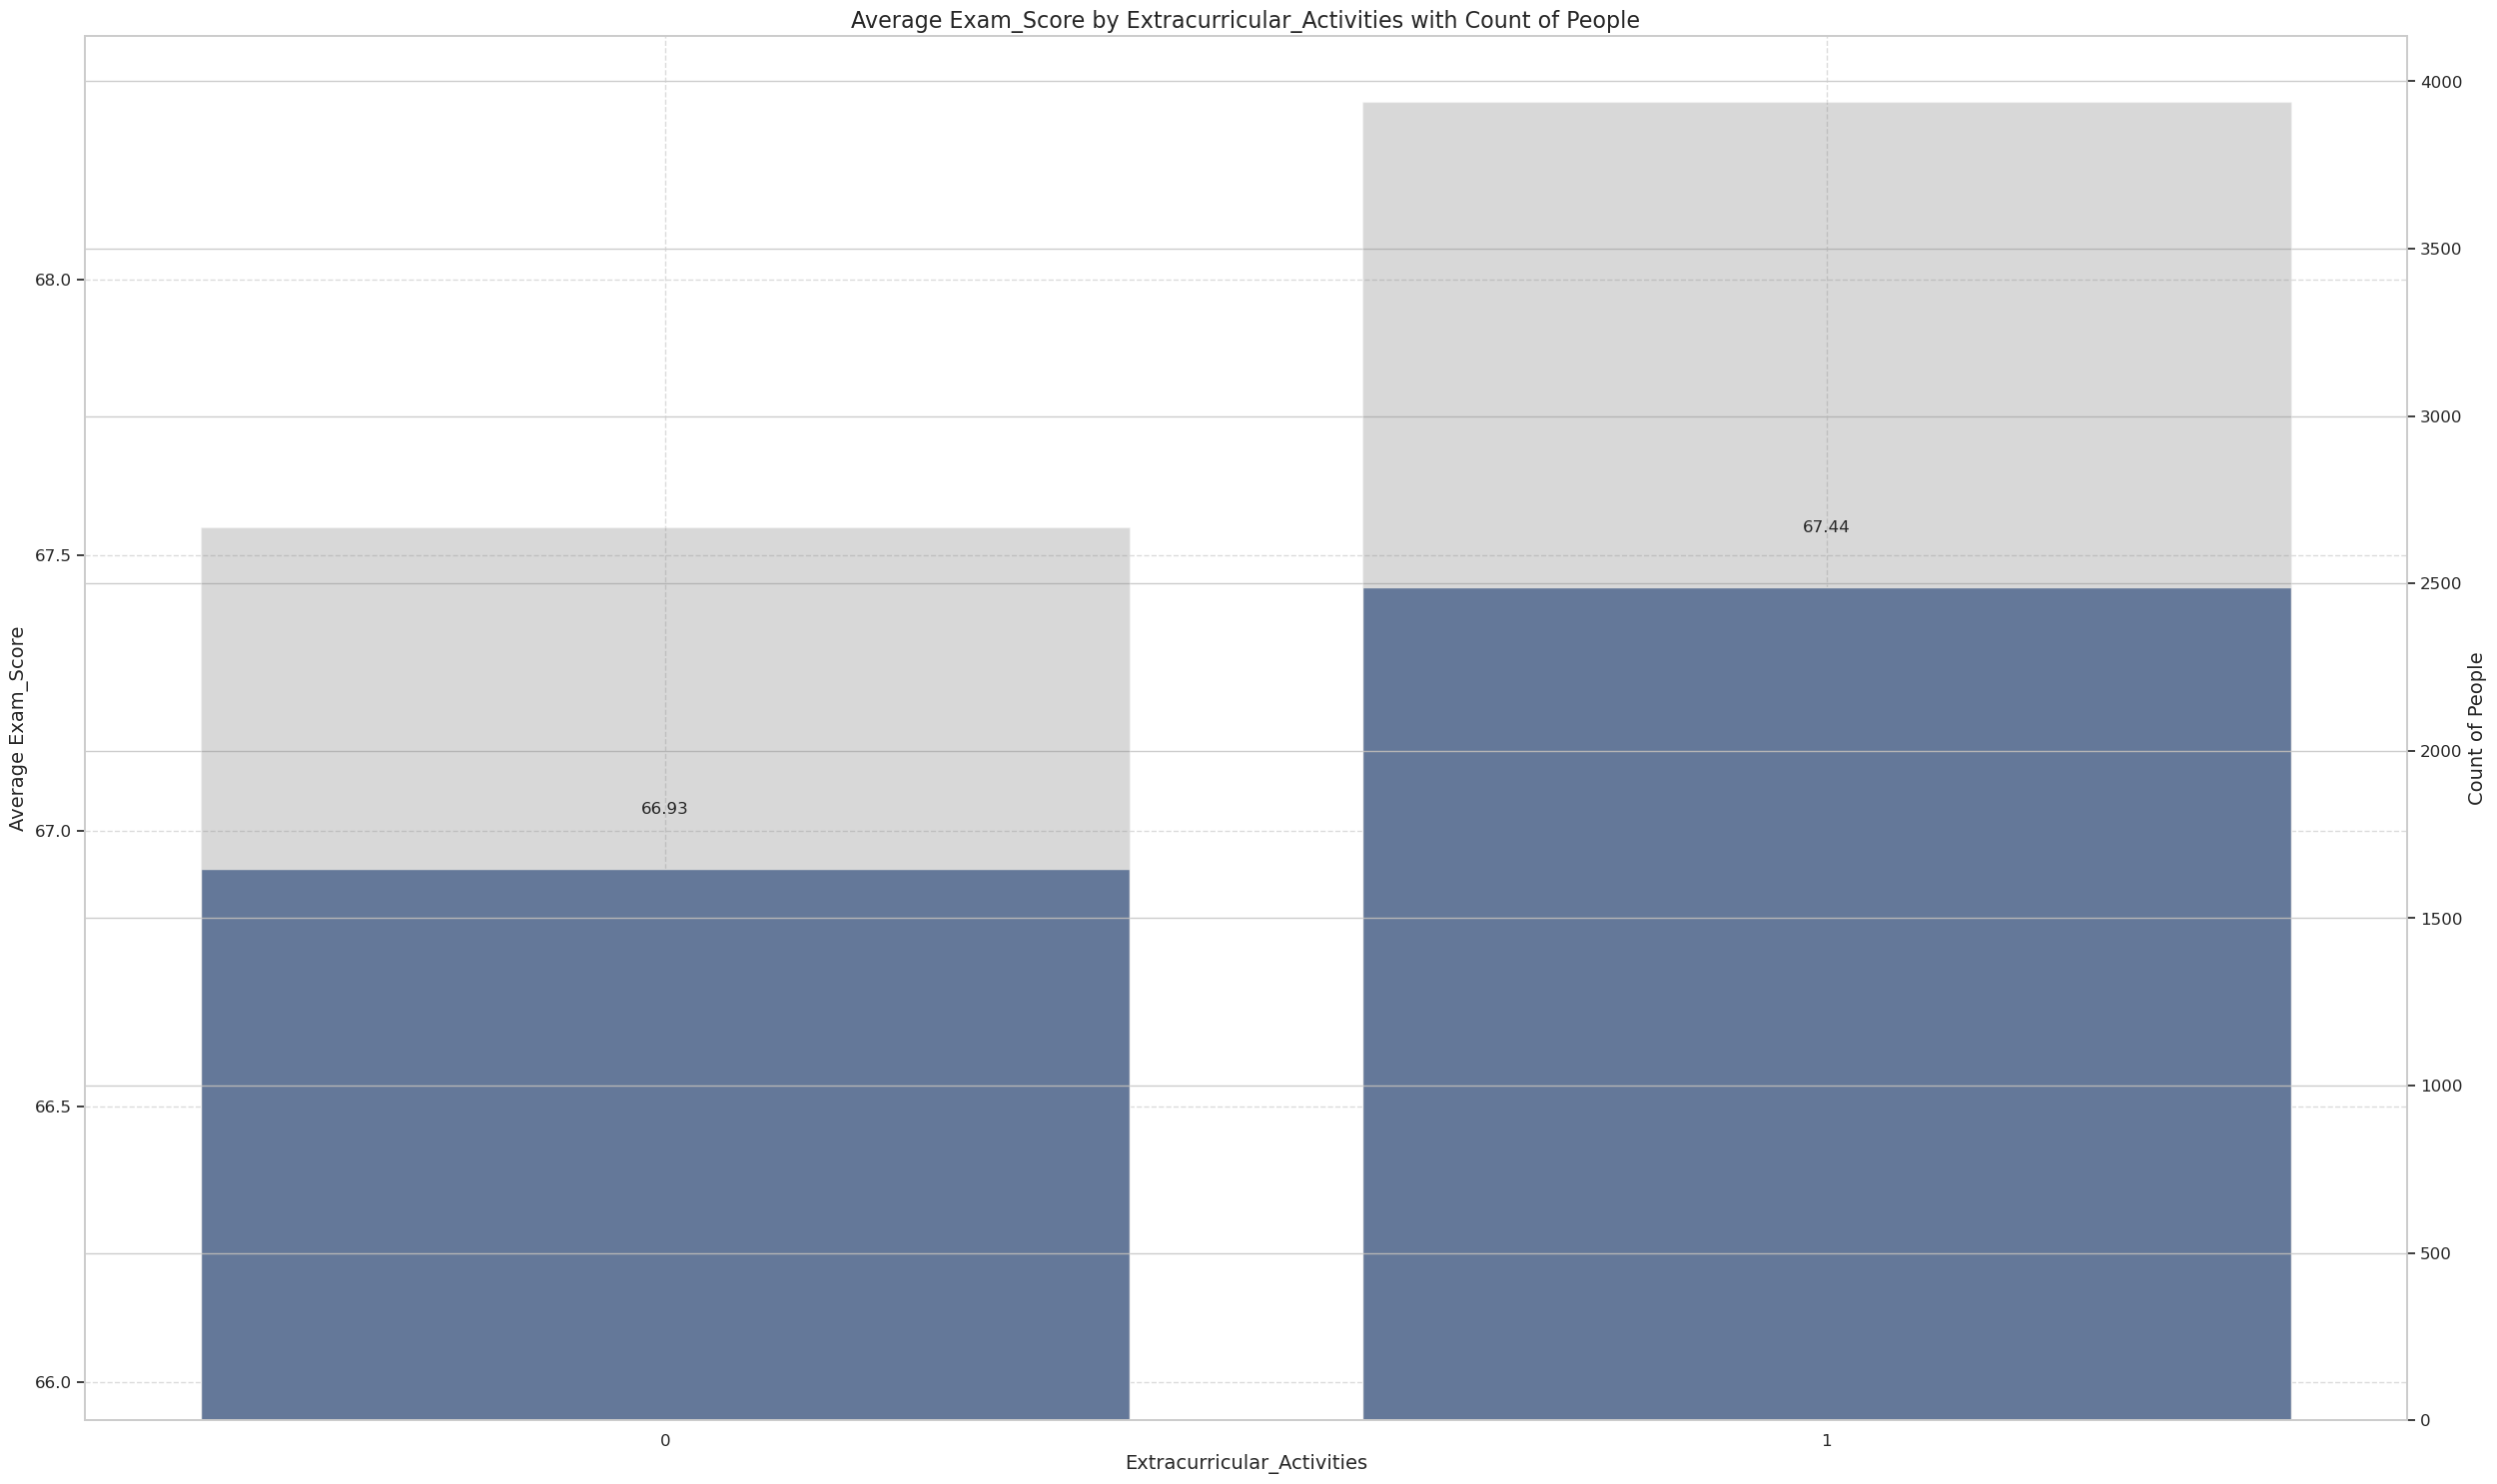

Average Exam_Score by Internet_Access:
   Internet_Access  Exam_Score
0                0   66.535070
1                1   67.292895
ANOVA test result for Exam_Score by Internet_Access: F-statistic = 17.547611736951104, p-value = 2.8385046310284837e-05


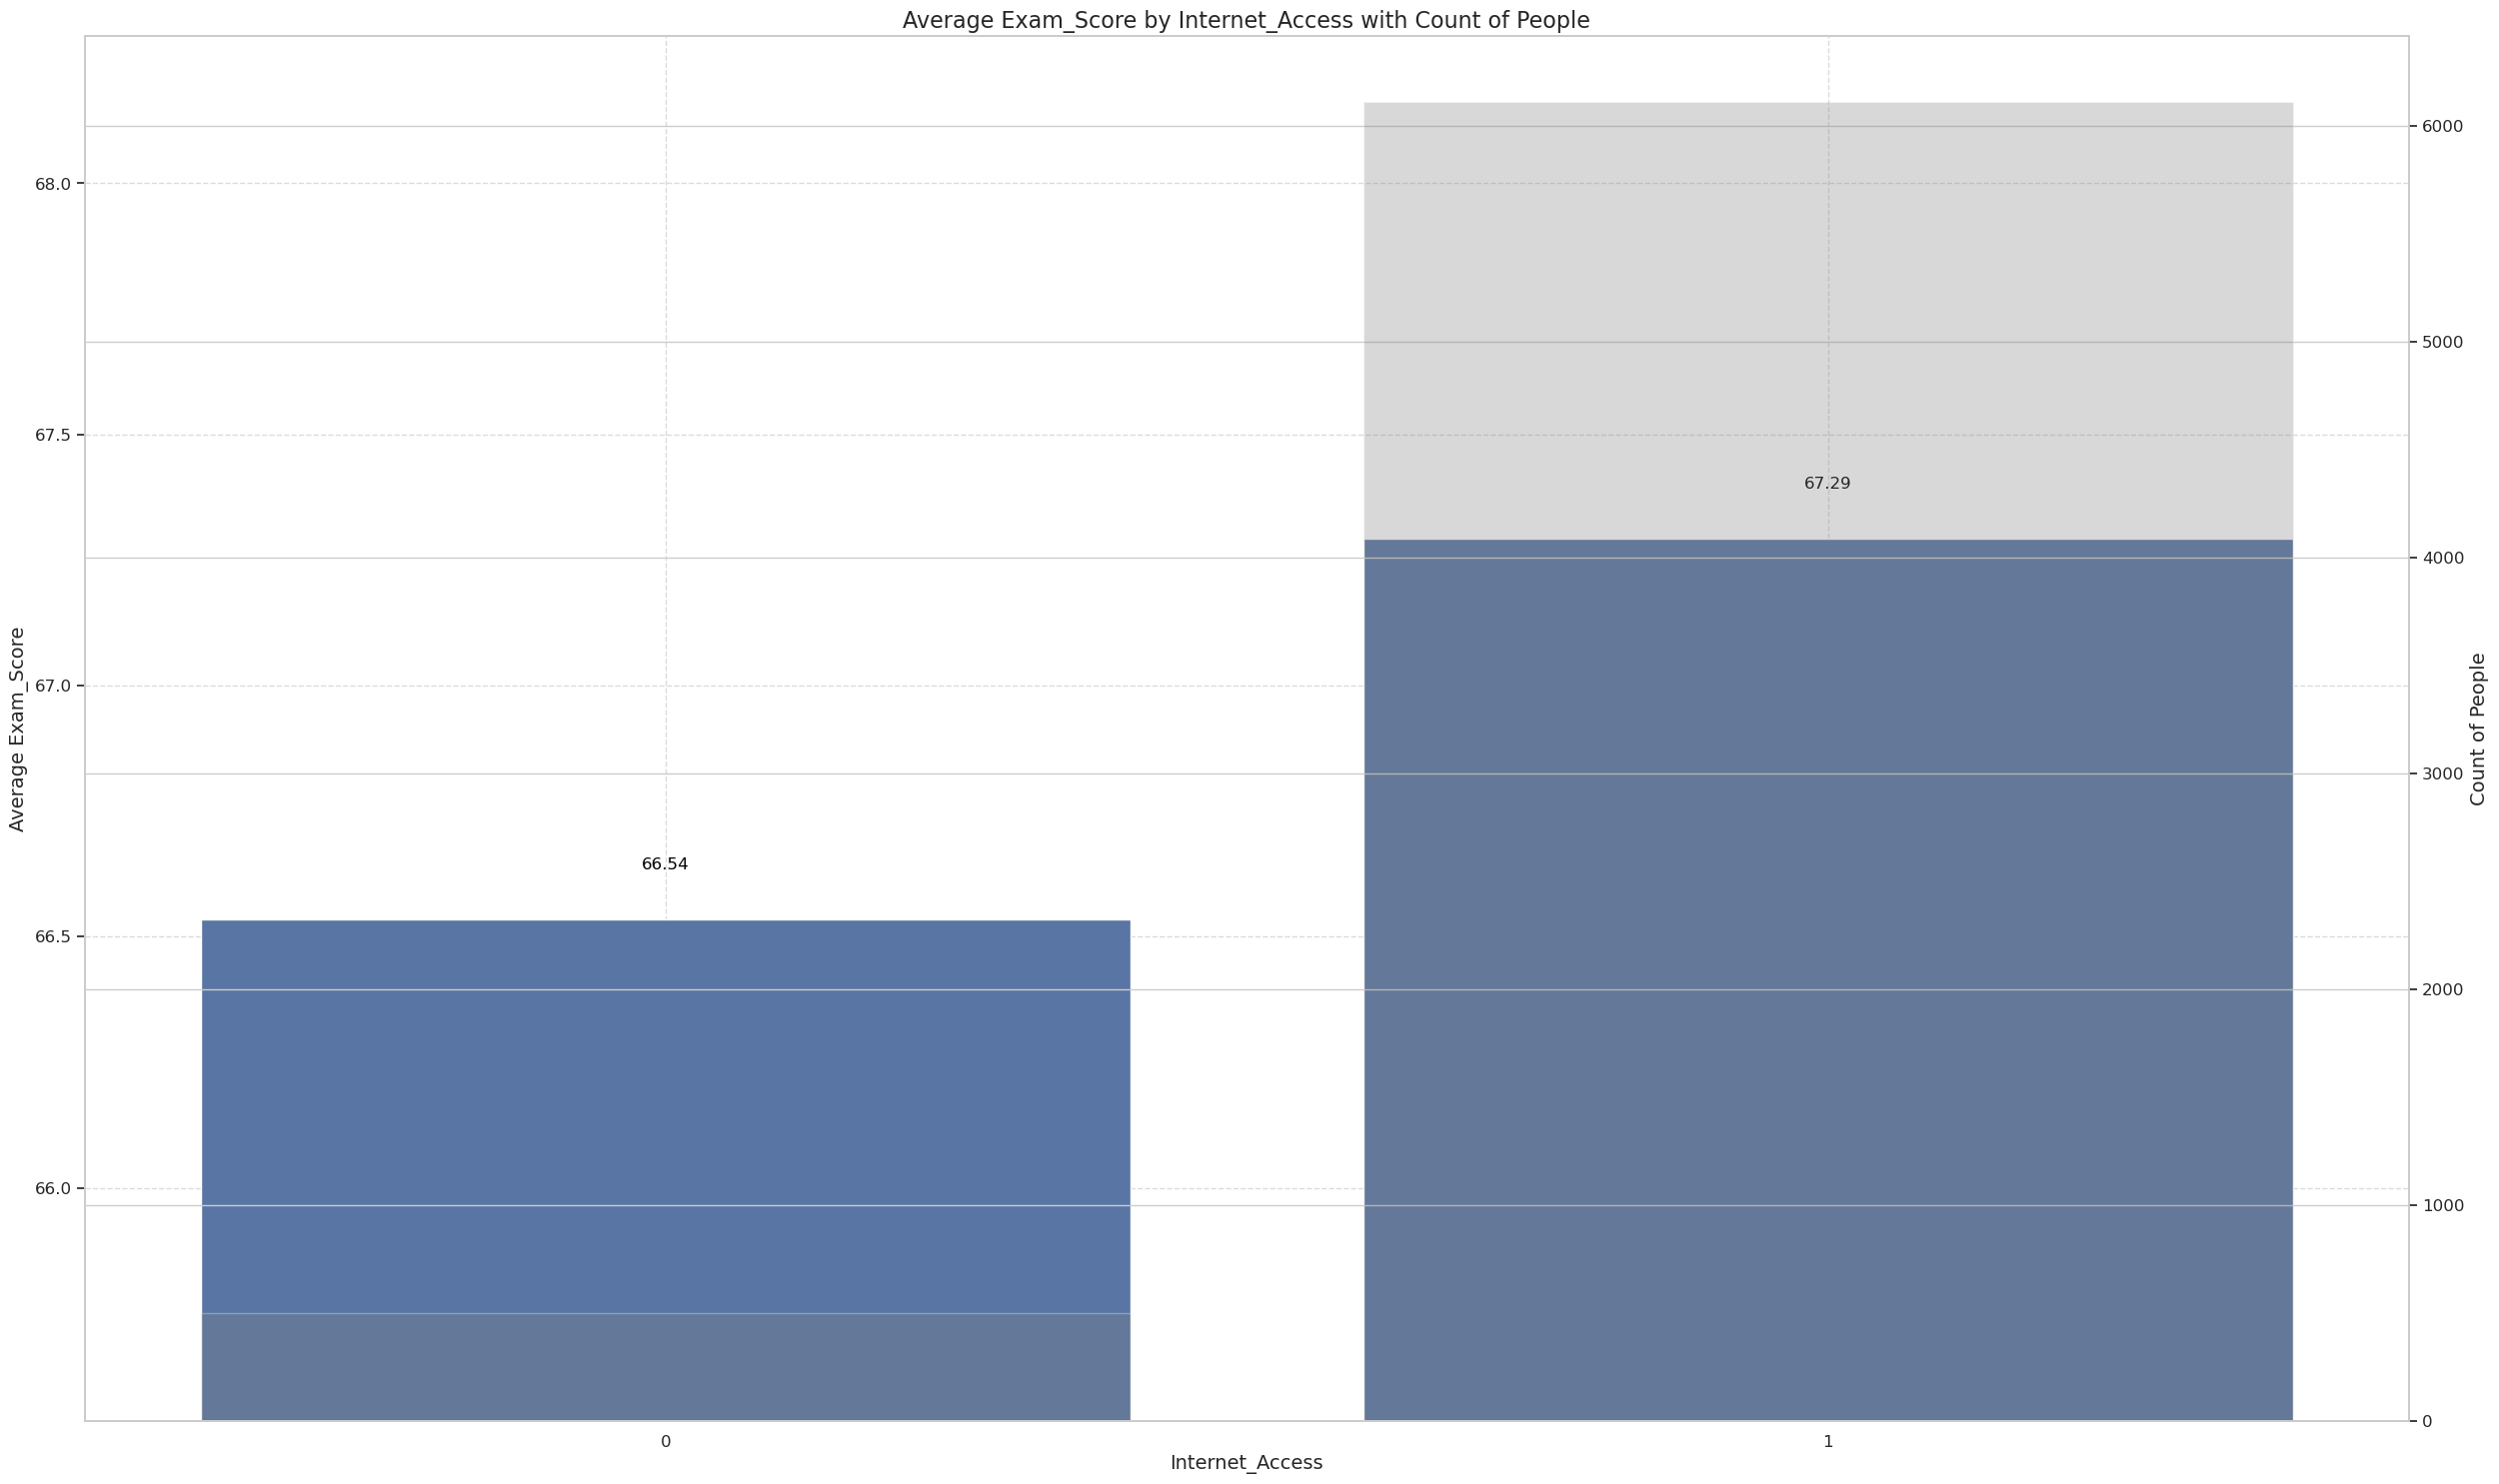

Average Exam_Score by Physical_Activity:
   Physical_Activity  Exam_Score
0                  0   67.521739
1                  1   66.969121
2                  2   67.185003
3                  3   67.196071
4                  4   67.313016
5                  5   67.603878
6                  6   68.093750
ANOVA test result for Exam_Score by Physical_Activity: F-statistic = 1.3633537308841124, p-value = 0.22538316355175445


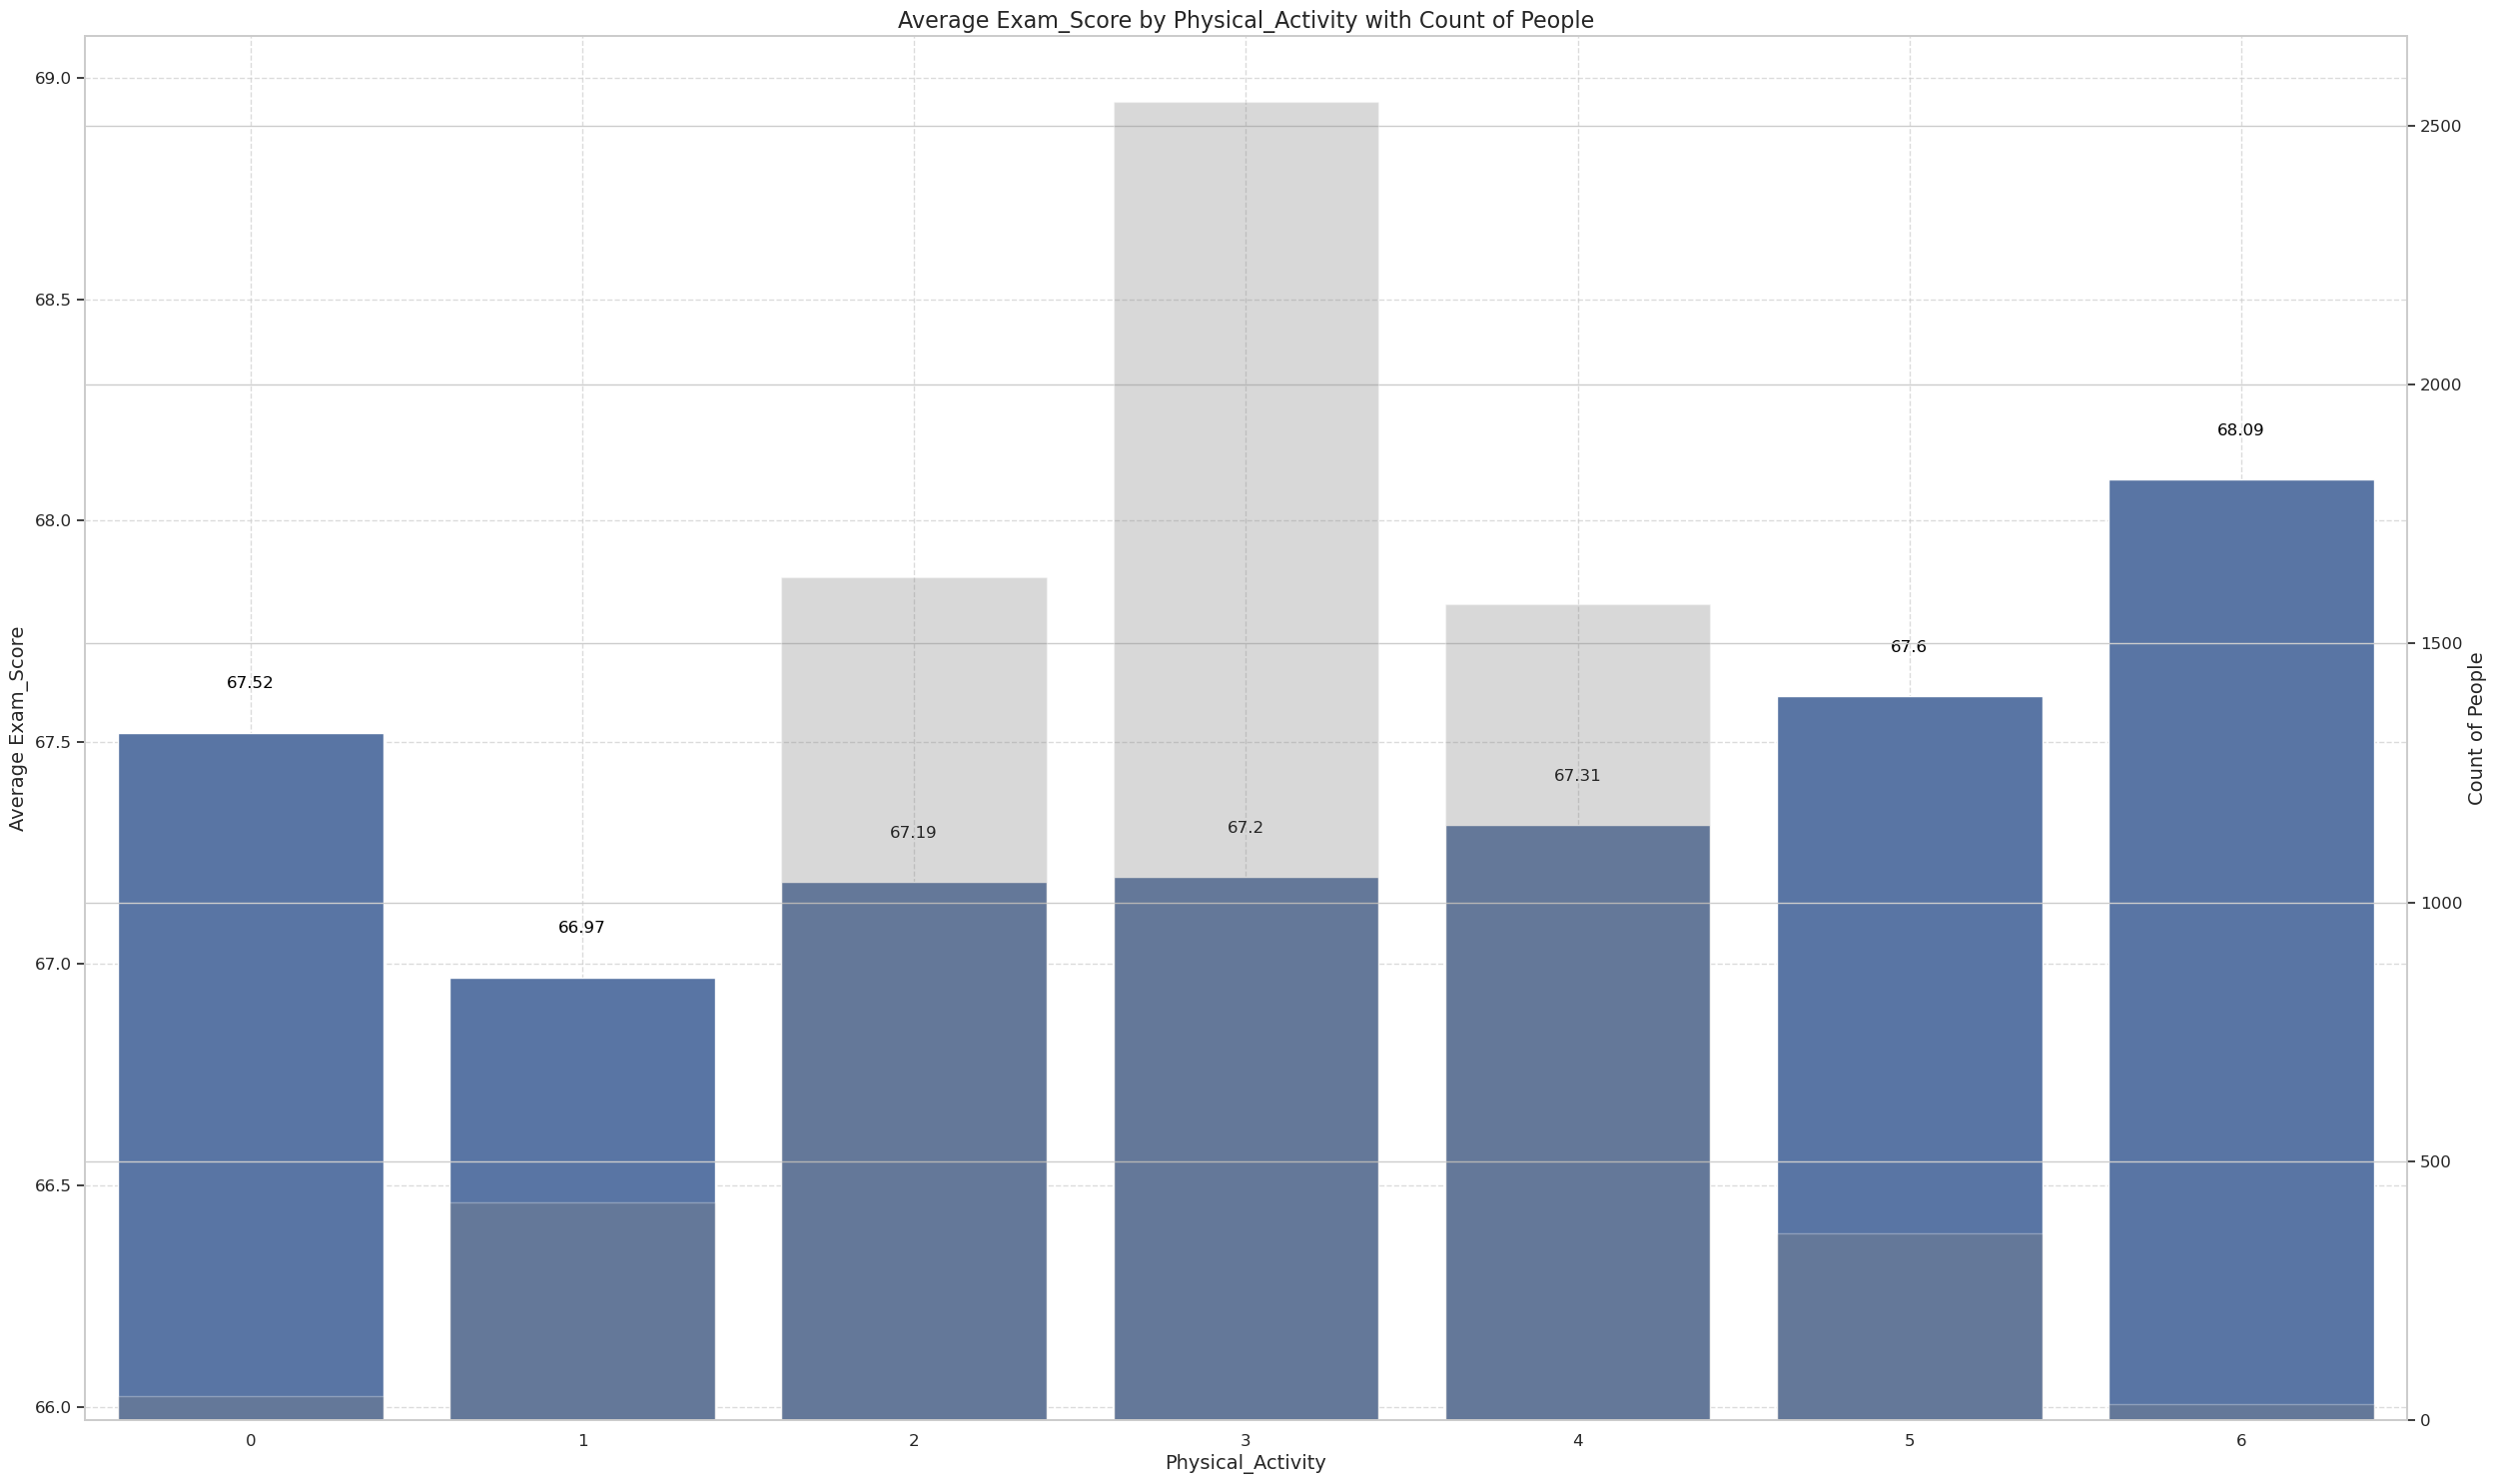

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Assuming data is your DataFrame

# Set Seaborn style
sns.set(style="whitegrid")

for category_col, value_col in top_pairs:
    category_col, value_col = value_col, category_col

    # Group by category_col and calculate the mean of value_col
    average_scores = data.groupby(category_col)[value_col].mean().reset_index()
    print(f"Average {value_col} by {category_col}:")
    print(average_scores)

    # Perform ANOVA test
    category_groups = [data[data[category_col] == category][value_col] for category in data[category_col].unique()]
    anova_result = f_oneway(*category_groups)
    print(f"ANOVA test result for {value_col} by {category_col}: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

    # Create a bar plot for average value_col by category_col
    fig, ax1 = plt.subplots(figsize=np.array((20, 12)) * 1.5)
    bar_plot = sns.barplot(data=average_scores, x=category_col, y=value_col, ax=ax1)

    # Add data labels for the average scores
    for index, row in average_scores.iterrows():
        bar_plot.text(row.name, row[value_col] + 0.1, round(row[value_col], 2), color='black', ha="center")

    # Create a secondary y-axis for the count of people in each category
    ax2 = ax1.twinx()
    count_data = data[category_col].value_counts().reset_index()
    count_data.columns = [category_col, 'count']
    count_plot = sns.barplot(data=count_data, x=category_col, y='count', ax=ax2, alpha=0.3, color='gray')

    # Add data labels for the counts
    # for index, row in count_data.iterrows():
    #     count_plot.text(row.name, row['count'] + 0.1, int(row['count']), color='black', ha="center")

    # Adjust y-axis limits to zoom in on the range of interest
    ax1.set_ylim(average_scores[value_col].min() - 1, average_scores[value_col].max() + 1)

    ax1.set_title(f'Average {value_col} by {category_col} with Count of People', fontsize=16)
    ax1.set_xlabel(category_col, fontsize=14)
    ax1.set_ylabel(f'Average {value_col}', fontsize=14)
    ax2.set_ylabel('Count of People', fontsize=14)
    ax1.tick_params(axis='x', labelsize=12)
    ax1.tick_params(axis='y', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    plt.show()